

> Librerías



In [48]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler
import seaborn as sns
import zipfile
import requests
import os
from google.colab import drive, files

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay, multilabel_confusion_matrix
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.neural_network import MLPClassifier



> Leer los datos



In [49]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
#datos UCI
df_datosini = pd.read_csv("/content/drive/MyDrive/Webinar/data.csv",sep=";")

In [51]:
#datos abiertos
df_datosabiertos = pd.read_csv("/content/drive/MyDrive/Webinar/Deserci_n_acad_mica_1-2019_20241110.csv")

#Fase 2: Entendimiento de los datos abiertos

In [52]:
df_datosabiertos.head()

DESCRIPCION NOMBRE_FACULTAD NOMBRE_PROGRAMA JORNADA  \
0  PRIMER  SEMESTRE DE 2019        CIENCIAS        BIOLOGIA  DIURNO   
1  PRIMER  SEMESTRE DE 2019        CIENCIAS        BIOLOGIA  DIURNO   
2  PRIMER  SEMESTRE DE 2019        CIENCIAS        BIOLOGIA  DIURNO   
3  PRIMER  SEMESTRE DE 2019        CIENCIAS        BIOLOGIA  DIURNO   
4  PRIMER  SEMESTRE DE 2019        CIENCIAS          FISICA  DIURNO   

    MODALIDAD NOMBRE_SEDE TIPO_IDEN_EST LUG_EXPEDICION LUGAR_NACIMIENTO  \
0  PRESENCIAL       TUNJA             C  VILLAVICENCIO    VILLAVICENCIO   
1  PRESENCIAL       TUNJA             C       SOGAMOSO         SOGAMOSO   
2  PRESENCIAL       TUNJA             C       SOGAMOSO         SOGAMOSO   
3  PRESENCIAL       TUNJA             C          TUNJA         PAMPLONA   
4  PRESENCIAL       TUNJA             T       SIMIJACA         SIMIJACA   

         FECHA_NACIMIENTO SEXO  ESTRATO                       NOMBRE_ESTADO  
0  04/17/1997 12:00:00 AM    M      3.0  PERDIO CUPO A130/98 ART. 80 LIT. B  
1  12/17/1994 12:00:00 AM    M      1.0  PERDIO CUPO A130/98 ART. 80 LIT. C  
2  05/30/2000 12:00:00 AM    M      3.0  PERDIO CUPO A130/98 ART. 80 LIT. C  
3  12/04/1994 12:00:00 AM    M      3.0   PERDIO CUPO A130/98 ART.80 LIT. E  
4  01/06/2000 12:00:00 AM    F      2.0  PERDIO CUPO A130/98 ART. 80 LIT. B

In [53]:
df_datosabiertos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DESCRIPCION       337 non-null    object 
 1   NOMBRE_FACULTAD   337 non-null    object 
 2   NOMBRE_PROGRAMA   337 non-null    object 
 3   JORNADA           317 non-null    object 
 4   MODALIDAD         337 non-null    object 
 5   NOMBRE_SEDE       337 non-null    object 
 6   TIPO_IDEN_EST     337 non-null    object 
 7   LUG_EXPEDICION    337 non-null    object 
 8   LUGAR_NACIMIENTO  337 non-null    object 
 9   FECHA_NACIMIENTO  337 non-null    object 
 10  SEXO              337 non-null    object 
 11  ESTRATO           201 non-null    float64
 12  NOMBRE_ESTADO     337 non-null    object 
dtypes: float64(1), object(12)
memory usage: 34.4+ KB


In [54]:
def missing_values_table(dataset):
    total_missing_values = dataset.isnull().sum()

    missing_values_percent = 100 * total_missing_values / len(dataset)

    missing_values_table = pd.concat([total_missing_values, missing_values_percent], axis=1)
    missing_values_table = missing_values_table.rename(columns={0: 'Missing Values', 1: '% of Total Values'})

    missing_values_table = missing_values_table[missing_values_table['Missing Values'] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

    print("Columns in dataset: " + str(dataset.shape[1]) + ".\n"
          "There are " + str(missing_values_table.shape[0]) + " columns that have missing values.")

    return missing_values_table

In [55]:
missing_values_table(df_datosabiertos)

Columns in dataset: 13.
There are 2 columns that have missing values.


Missing Values  % of Total Values
ESTRATO             136               40.4
JORNADA              20                5.9

In [56]:
def histograma(dataset):
    dataset.hist(bins=15, figsize=(15, 10), grid=False)
    plt.tight_layout()
    plt.show()

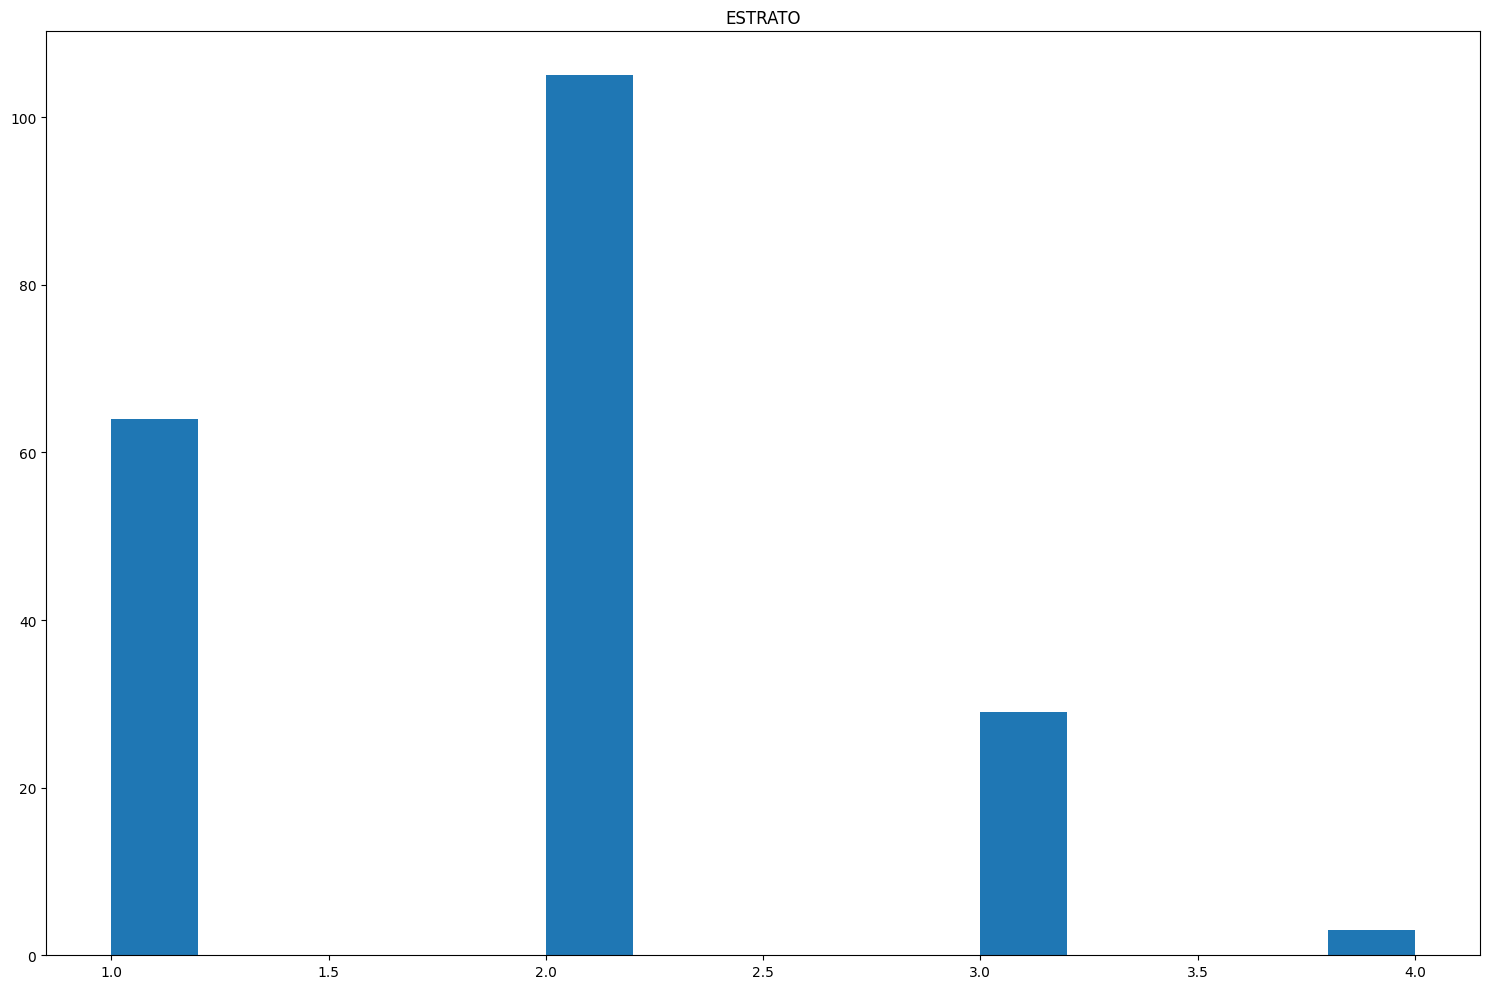

In [57]:
histograma(df_datosabiertos)

# Fase 2: Entendimiento de los datos UCI

In [58]:
df_datosini.head()

Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                           122.0            1                      37   
3                           122.0            1                      38   
4                           100.0            1                      37   

   Father's qualification  ...  Curricular units 2nd sem (credited)  \
0                      12  ...                                    0   
1                       3  ...                                    0   
2                      37  ...                                    0   
3                      37  ...                                    0   
4                      38  ...                                    0   

   Curricular units 2nd sem (enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 37 columns]

In [59]:
df_datosini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [60]:
missing_values_table(df_datosini)

Columns in dataset: 37.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []



> Identificar las columnas categóricas



In [61]:
df_datosini.nunique()

Marital status                                      6
Application mode                                   18
Application order                                   8
Course                                             17
Daytime/evening attendance\t                        2
Previous qualification                             17
Previous qualification (grade)                    101
Nacionality                                        21
Mother's qualification                             29
Father's qualification                             34
Mother's occupation                                32
Father's occupation                                46
Admission grade                                   620
Displaced                                           2
Educational special needs                           2
Debtor                                              2
Tuition fees up to date                             2
Gender                                              2
Scholarship holder                                  2
Age at enrollment                                  46
International                                       2
Curricular units 1st sem (credited)                21
Curricular units 1st sem (enrolled)                23
Curricular units 1st sem (evaluations)             35
Curricular units 1st sem (approved)                23
Curricular units 1st sem (grade)                  805
Curricular units 1st sem (without evaluations)     11
Curricular units 2nd sem (credited)                19
Curricular units 2nd sem (enrolled)                22
Curricular units 2nd sem (evaluations)             30
Curricular units 2nd sem (approved)                20
Curricular units 2nd sem (grade)                  786
Curricular units 2nd sem (without evaluations)     10
Unemployment rate                                  10
Inflation rate                                      9
GDP                                                10
Target                                              3
dtype: int64



> Separar los datos categóricos



In [62]:
df_nocategoricos = df_datosini[['Application order','Previous qualification (grade)','Admission grade','Age at enrollment','Curricular units 1st sem (credited)','Curricular units 1st sem (enrolled)','Curricular units 1st sem (evaluations)','Curricular units 1st sem (approved)','Curricular units 1st sem (grade)','Curricular units 1st sem (without evaluations)','Curricular units 2nd sem (credited)','Curricular units 2nd sem (enrolled)','Curricular units 2nd sem (evaluations)','Curricular units 2nd sem (approved)','Curricular units 2nd sem (grade)','Curricular units 2nd sem (without evaluations)','Unemployment rate','Inflation rate','GDP']]

In [63]:
df_categoricos = df_datosini.drop(columns=df_nocategoricos)



> Descripción de las estadísticas descriptivas de los datos no categóricos



In [64]:
def describir_datos(dataset):
    rows, cols = dataset.shape
    print(f'Rows: {rows} | Features: {cols}')
    print()
    print(dataset.describe())
    print()
    print('Data types:')
    print(dataset.dtypes)

In [65]:
describir_datos(df_nocategoricos)

Rows: 4424 | Features: 19

       Application order  Previous qualification (grade)  Admission grade  \
count        4424.000000                     4424.000000      4424.000000   
mean            1.727848                      132.613314       126.978119   
std             1.313793                       13.188332        14.482001   
min             0.000000                       95.000000        95.000000   
25%             1.000000                      125.000000       117.900000   
50%             1.000000                      133.100000       126.100000   
75%             2.000000                      140.000000       134.800000   
max             9.000000                      190.000000       190.000000   

       Age at enrollment  Curricular units 1st sem (credited)  \
count        4424.000000                          4424.000000   
mean           23.265145                             0.709991   
std             7.587816                             2.360507   
min            17.0



> Valores de los datos categóricos



In [66]:
def frecuencia_datos(dataset):
    frecuencias = {}
    for i in dataset.columns:
        frecuencias[i] = dataset[i].value_counts()
        print(f"Frecuencias en la columna '{i}':\n{frecuencias[i]}\n")

    return frecuencias

In [67]:
frecuencia_datos(df_categoricos)

Frecuencias en la columna 'Marital status':
Marital status
1    3919
2     379
4      91
5      25
6       6
3       4
Name: count, dtype: int64

Frecuencias en la columna 'Application mode':
Application mode
1     1708
17     872
39     785
43     312
44     213
7      139
18     124
42      77
51      59
16      38
53      35
15      30
5       16
10      10
2        3
57       1
26       1
27       1
Name: count, dtype: int64

Frecuencias en la columna 'Course':
Course
9500    766
9147    380
9238    355
9085    337
9773    331
9670    268
9991    268
9254    252
9070    226
171     215
8014    215
9003    210
9853    192
9119    170
9130    141
9556     86
33       12
Name: count, dtype: int64

Frecuencias en la columna 'Daytime/evening attendance	':
Daytime/evening attendance\t
1    3941
0     483
Name: count, dtype: int64

Frecuencias en la columna 'Previous qualification':
Previous qualification
1     3717
39     219
19     162
3      126
12      45
40      40
42      36
2      

{'Marital status': Marital status
 1    3919
 2     379
 4      91
 5      25
 6       6
 3       4
 Name: count, dtype: int64,
 'Application mode': Application mode
 1     1708
 17     872
 39     785
 43     312
 44     213
 7      139
 18     124
 42      77
 51      59
 16      38
 53      35
 15      30
 5       16
 10      10
 2        3
 57       1
 26       1
 27       1
 Name: count, dtype: int64,
 'Course': Course
 9500    766
 9147    380
 9238    355
 9085    337
 9773    331
 9670    268
 9991    268
 9254    252
 9070    226
 171     215
 8014    215
 9003    210
 9853    192
 9119    170
 9130    141
 9556     86
 33       12
 Name: count, dtype: int64,
 'Daytime/evening attendance\t': Daytime/evening attendance\t
 1    3941
 0     483
 Name: count, dtype: int64,
 'Previous qualification': Previous qualification
 1     3717
 39     219
 19     162
 3      126
 12      45
 40      40
 42      36
 2       23
 6       16
 9       11
 4        8
 38       7
 43       6
 10  



> Exploración de los datos



In [68]:
def histograma(dataset):
    dataset.hist(bins=15, figsize=(15, 10), grid=False)
    plt.tight_layout()
    plt.show()

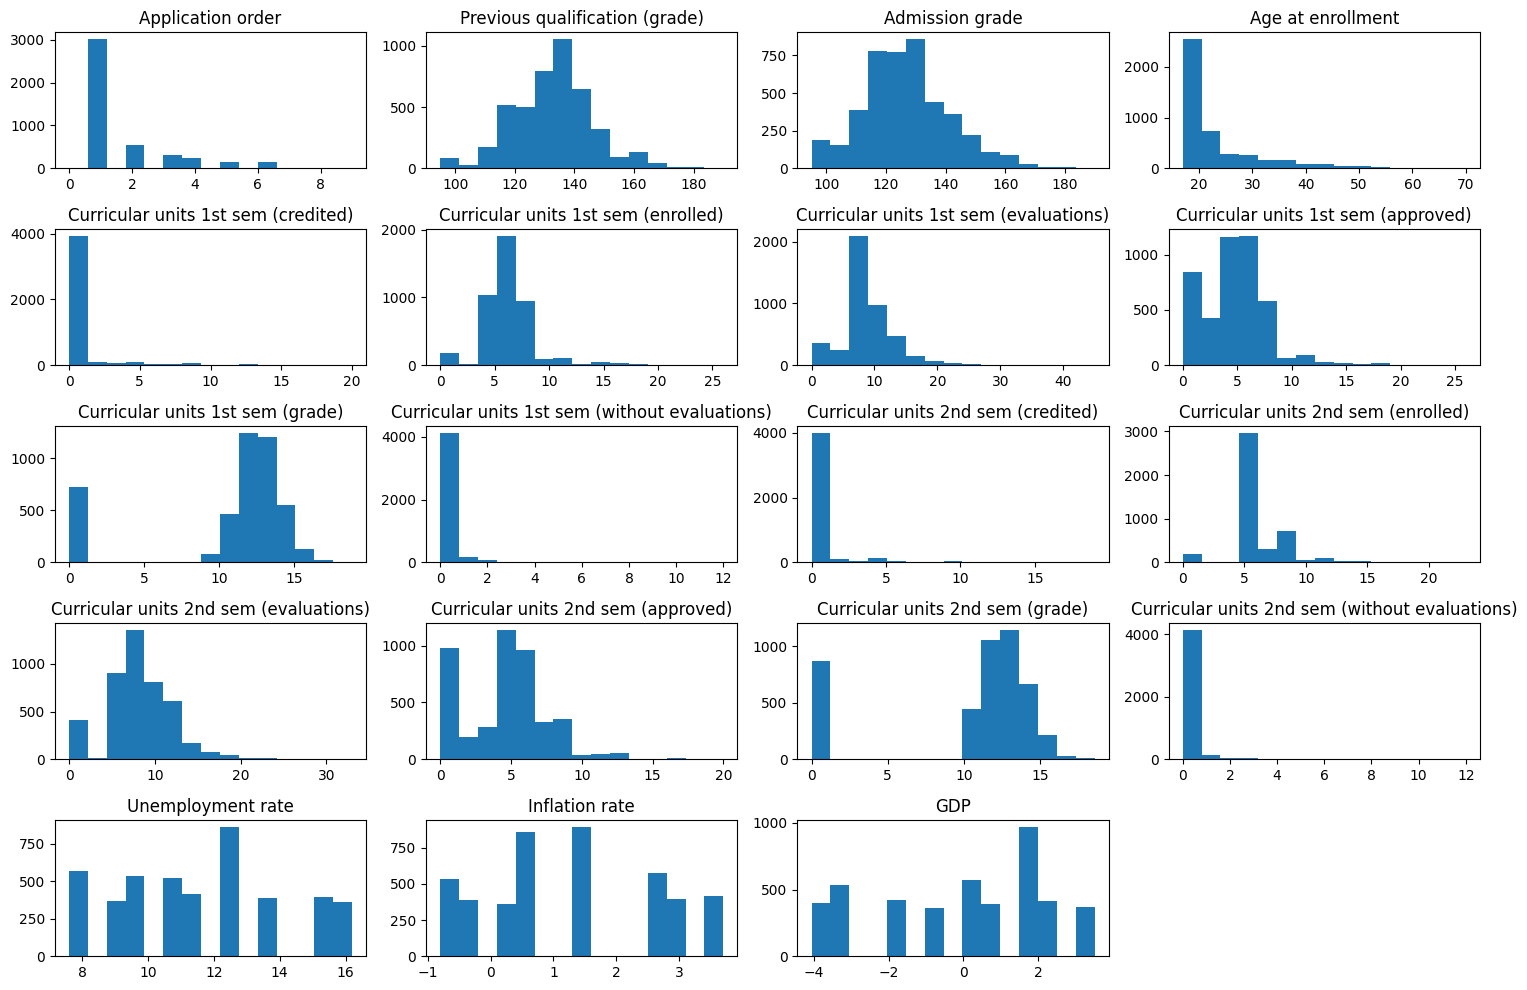

In [69]:
histograma(df_nocategoricos)

<ipython-input-68-4a196a329769>:3: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


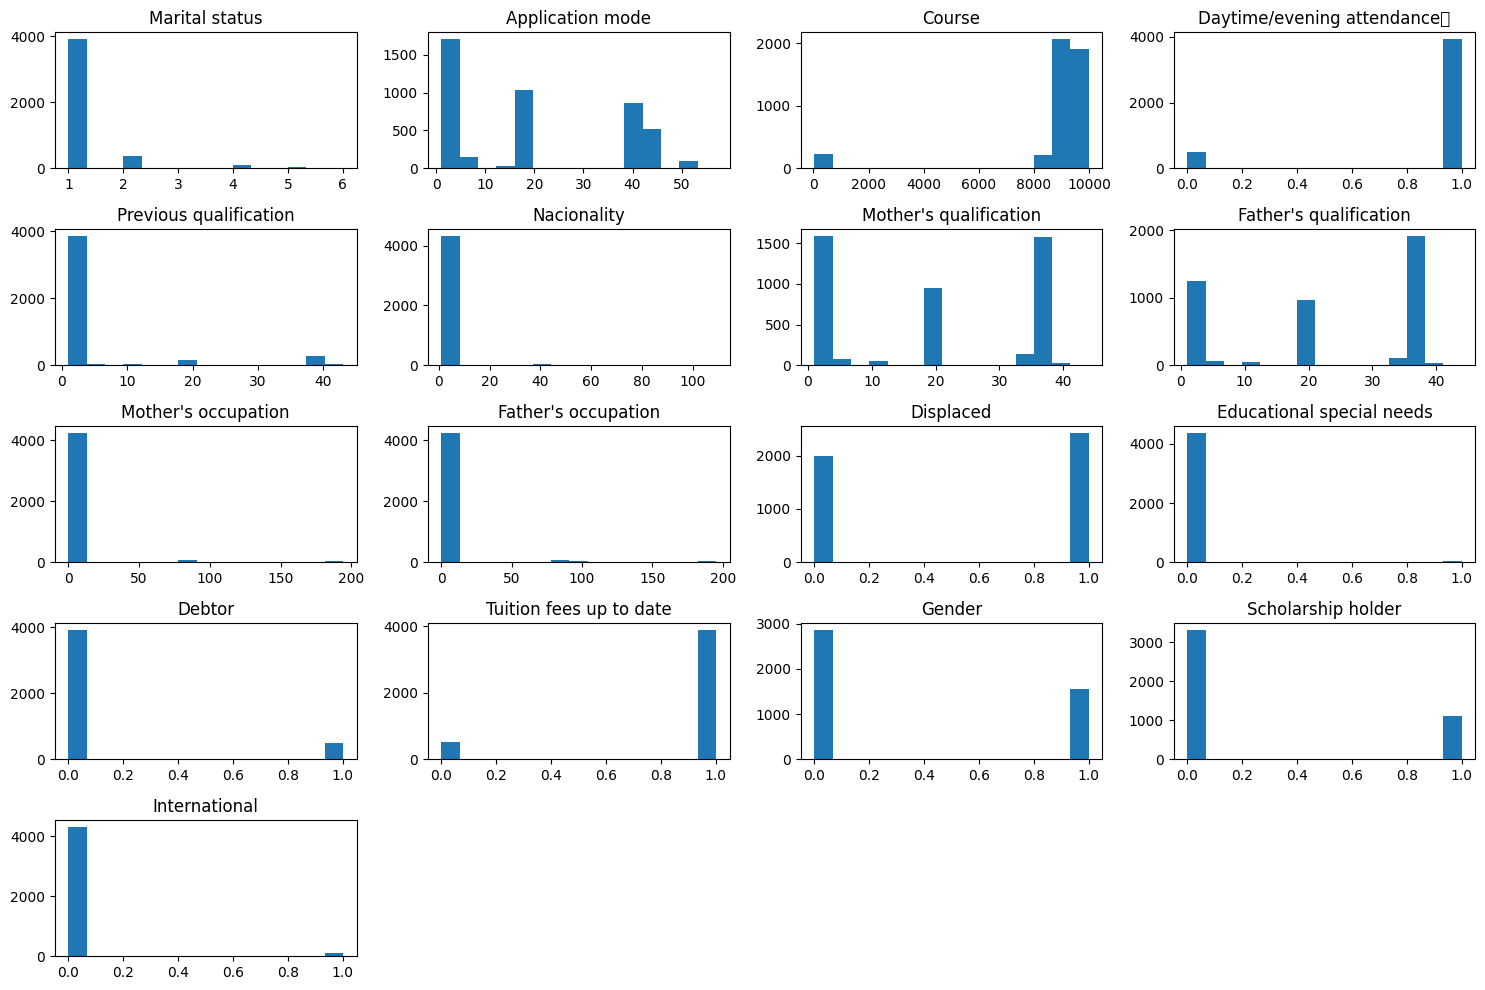

In [70]:
histograma(df_categoricos)

Matriz de correlación



> Codificar la columna Target con one hot encoder


In [71]:
cod_target = df_datosini[['Target']]
codificador = OneHotEncoder(sparse_output=False , handle_unknown='ignore' ,dtype=int);
resultados = codificador.fit_transform(cod_target)
df_codificado = pd.DataFrame(resultados, columns=codificador.get_feature_names_out(['Target']))

df_datosInicodificado = pd.concat([df_datosini.drop(['Target'], axis=1), df_codificado], axis=1)
df_datosInicodificado.head()

Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                           122.0            1                      37   
3                           122.0            1                      38   
4                           100.0            1                      37   

   Father's qualification  ...  Curricular units 2nd sem (evaluations)  \
0                      12  ...                                       0   
1                       3  ...                                       6   
2                      37  ...                                       0   
3                      37  ...                                      10   
4                      38  ...                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP  Target_Dropout  Target_Enrolled  Target_Graduate  
0             1.4  1.74               1                0                0  
1            -0.3  0.79               0                0                1  
2             1.4  1.74               1                0                0  
3            -0.8 -3.12               0                0                1  
4            -0.3  0.79               0                0                1  

[5 rows x 39 columns]

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()


<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


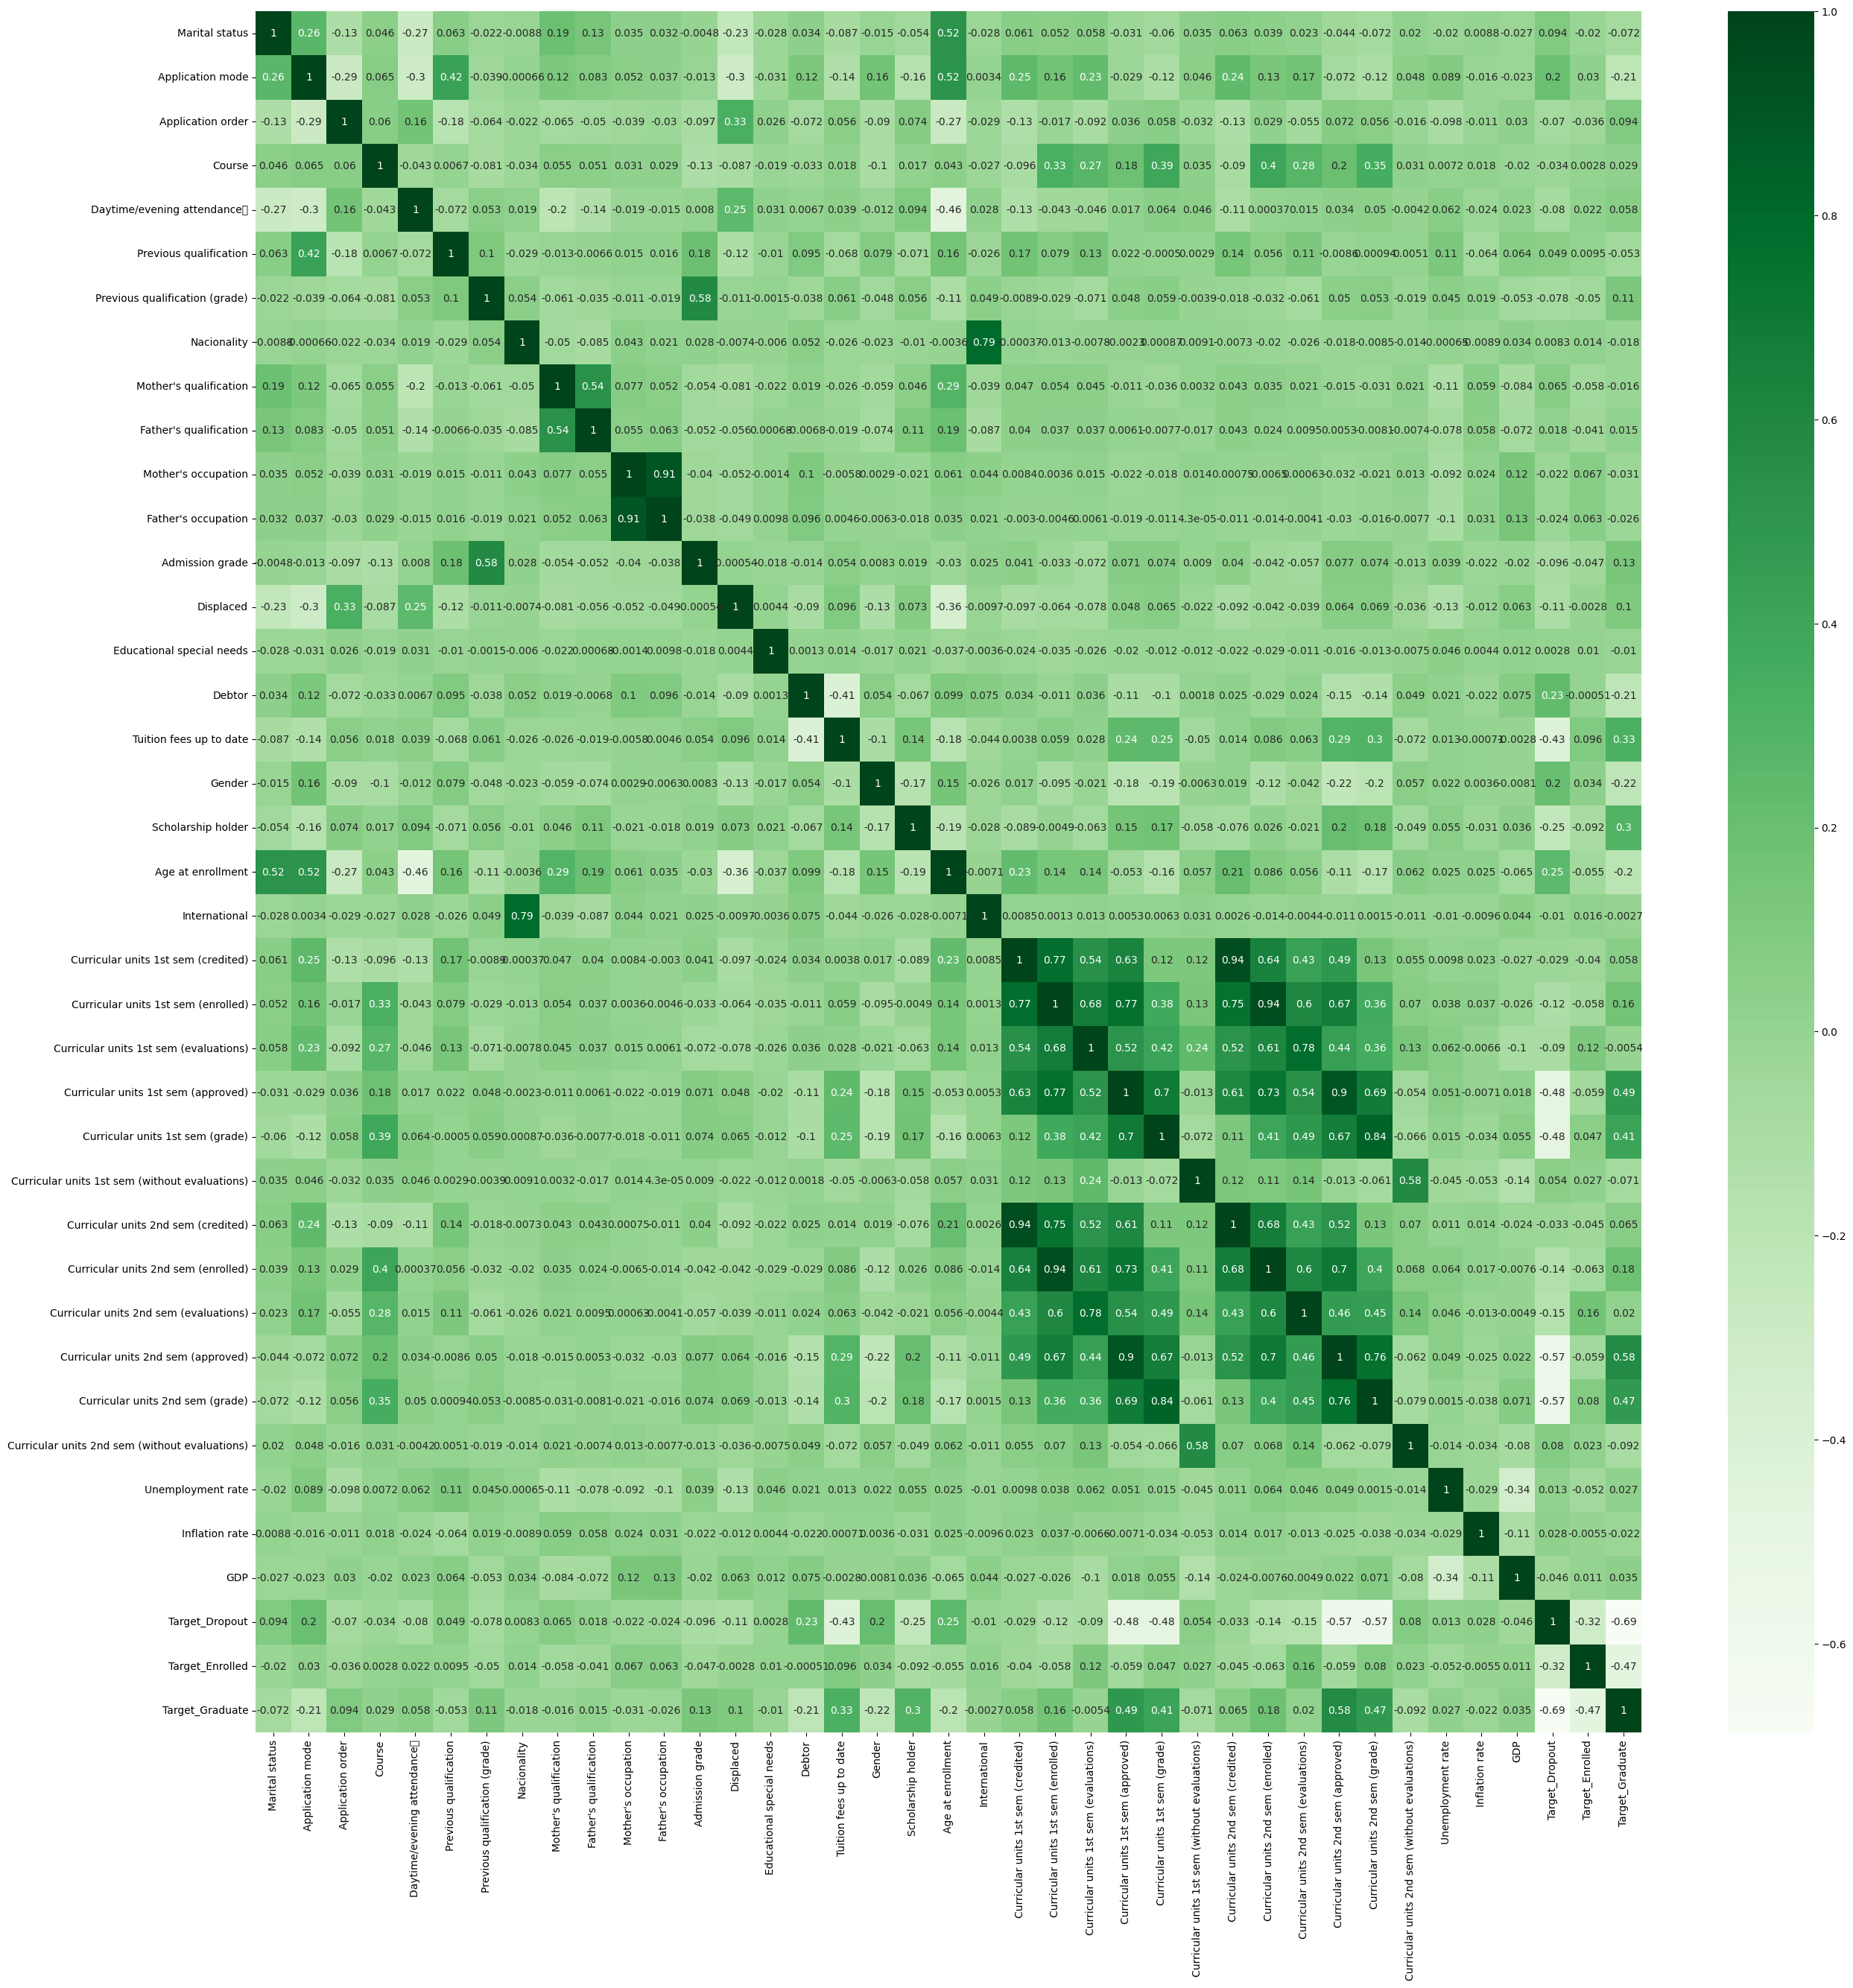

In [72]:
plt.rcParams["figure.figsize"]=(30,30)
df_corr=df_datosInicodificado.corr()
sns.heatmap(df_corr, cmap="Greens", annot = True)

In [73]:
import pandas as pd

def analisis_colum(dataset, target_column='Target_Dropout'):
    for column in dataset.columns:
        if column != target_column:
            print(f"\nAnálisis de la columna: {column}")
            grouped_counts = dataset.groupby([column, target_column]).size().unstack()
            print(grouped_counts)

In [74]:
analisis_colum(df_datosInicodificado)


Análisis de la columna: Marital status
Target_Dropout     0     1
Marital status            
1               2735  1184
2                200   179
3                  3     1
4                 49    42
5                 14    11
6                  2     4

Análisis de la columna: Application mode
Target_Dropout         0      1
Application mode               
1                 1363.0  345.0
2                    1.0    2.0
5                   14.0    2.0
7                   54.0   85.0
10                   7.0    3.0
15                  25.0    5.0
16                  33.0    5.0
17                 616.0  256.0
18                  79.0   45.0
26                   NaN    1.0
27                   NaN    1.0
39                 350.0  435.0
42                  43.0   34.0
43                 197.0  115.0
44                 150.0   63.0
51                  39.0   20.0
53                  31.0    4.0
57                   1.0    NaN

Análisis de la columna: Application order
Target_Dropout     

#Fase 2:Entendimiento de los datos Abiertos

In [75]:
df_datosabiertos.head()

DESCRIPCION NOMBRE_FACULTAD NOMBRE_PROGRAMA JORNADA  \
0  PRIMER  SEMESTRE DE 2019        CIENCIAS        BIOLOGIA  DIURNO   
1  PRIMER  SEMESTRE DE 2019        CIENCIAS        BIOLOGIA  DIURNO   
2  PRIMER  SEMESTRE DE 2019        CIENCIAS        BIOLOGIA  DIURNO   
3  PRIMER  SEMESTRE DE 2019        CIENCIAS        BIOLOGIA  DIURNO   
4  PRIMER  SEMESTRE DE 2019        CIENCIAS          FISICA  DIURNO   

    MODALIDAD NOMBRE_SEDE TIPO_IDEN_EST LUG_EXPEDICION LUGAR_NACIMIENTO  \
0  PRESENCIAL       TUNJA             C  VILLAVICENCIO    VILLAVICENCIO   
1  PRESENCIAL       TUNJA             C       SOGAMOSO         SOGAMOSO   
2  PRESENCIAL       TUNJA             C       SOGAMOSO         SOGAMOSO   
3  PRESENCIAL       TUNJA             C          TUNJA         PAMPLONA   
4  PRESENCIAL       TUNJA             T       SIMIJACA         SIMIJACA   

         FECHA_NACIMIENTO SEXO  ESTRATO                       NOMBRE_ESTADO  
0  04/17/1997 12:00:00 AM    M      3.0  PERDIO CUPO A130/98 ART. 80 LIT. B  
1  12/17/1994 12:00:00 AM    M      1.0  PERDIO CUPO A130/98 ART. 80 LIT. C  
2  05/30/2000 12:00:00 AM    M      3.0  PERDIO CUPO A130/98 ART. 80 LIT. C  
3  12/04/1994 12:00:00 AM    M      3.0   PERDIO CUPO A130/98 ART.80 LIT. E  
4  01/06/2000 12:00:00 AM    F      2.0  PERDIO CUPO A130/98 ART. 80 LIT. B

In [76]:
df_datosabiertos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DESCRIPCION       337 non-null    object 
 1   NOMBRE_FACULTAD   337 non-null    object 
 2   NOMBRE_PROGRAMA   337 non-null    object 
 3   JORNADA           317 non-null    object 
 4   MODALIDAD         337 non-null    object 
 5   NOMBRE_SEDE       337 non-null    object 
 6   TIPO_IDEN_EST     337 non-null    object 
 7   LUG_EXPEDICION    337 non-null    object 
 8   LUGAR_NACIMIENTO  337 non-null    object 
 9   FECHA_NACIMIENTO  337 non-null    object 
 10  SEXO              337 non-null    object 
 11  ESTRATO           201 non-null    float64
 12  NOMBRE_ESTADO     337 non-null    object 
dtypes: float64(1), object(12)
memory usage: 34.4+ KB


In [77]:
def missing_values_table(dataset):
    total_missing_values = dataset.isnull().sum()

    missing_values_percent = 100 * total_missing_values / len(dataset)

    missing_values_table = pd.concat([total_missing_values, missing_values_percent], axis=1)
    missing_values_table = missing_values_table.rename(columns={0: 'Missing Values', 1: '% of Total Values'})

    missing_values_table = missing_values_table[missing_values_table['Missing Values'] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

    print("Columns in dataset: " + str(dataset.shape[1]) + ".\n"
          "There are " + str(missing_values_table.shape[0]) + " columns that have missing values.")

    return missing_values_table

In [78]:
missing_values_table(df_datosabiertos)

Columns in dataset: 13.
There are 2 columns that have missing values.


Missing Values  % of Total Values
ESTRATO             136               40.4
JORNADA              20                5.9

In [79]:
def histograma(dataset):
    dataset.hist(bins=15, figsize=(15, 10), grid=False)
    plt.tight_layout()
    plt.show()

In [80]:
df_datosabiertoscod = df_datosabiertos.copy()

label_encoder = LabelEncoder()

columnas_a_codificar = ['DESCRIPCION', 'NOMBRE_FACULTAD', 'NOMBRE_PROGRAMA', 'JORNADA','MODALIDAD','NOMBRE_SEDE','TIPO_IDEN_EST','LUG_EXPEDICION','LUGAR_NACIMIENTO','FECHA_NACIMIENTO','SEXO','NOMBRE_ESTADO']

for columna in columnas_a_codificar:
    df_datosabiertoscod[columna] = label_encoder.fit_transform(df_datosabiertoscod[columna])

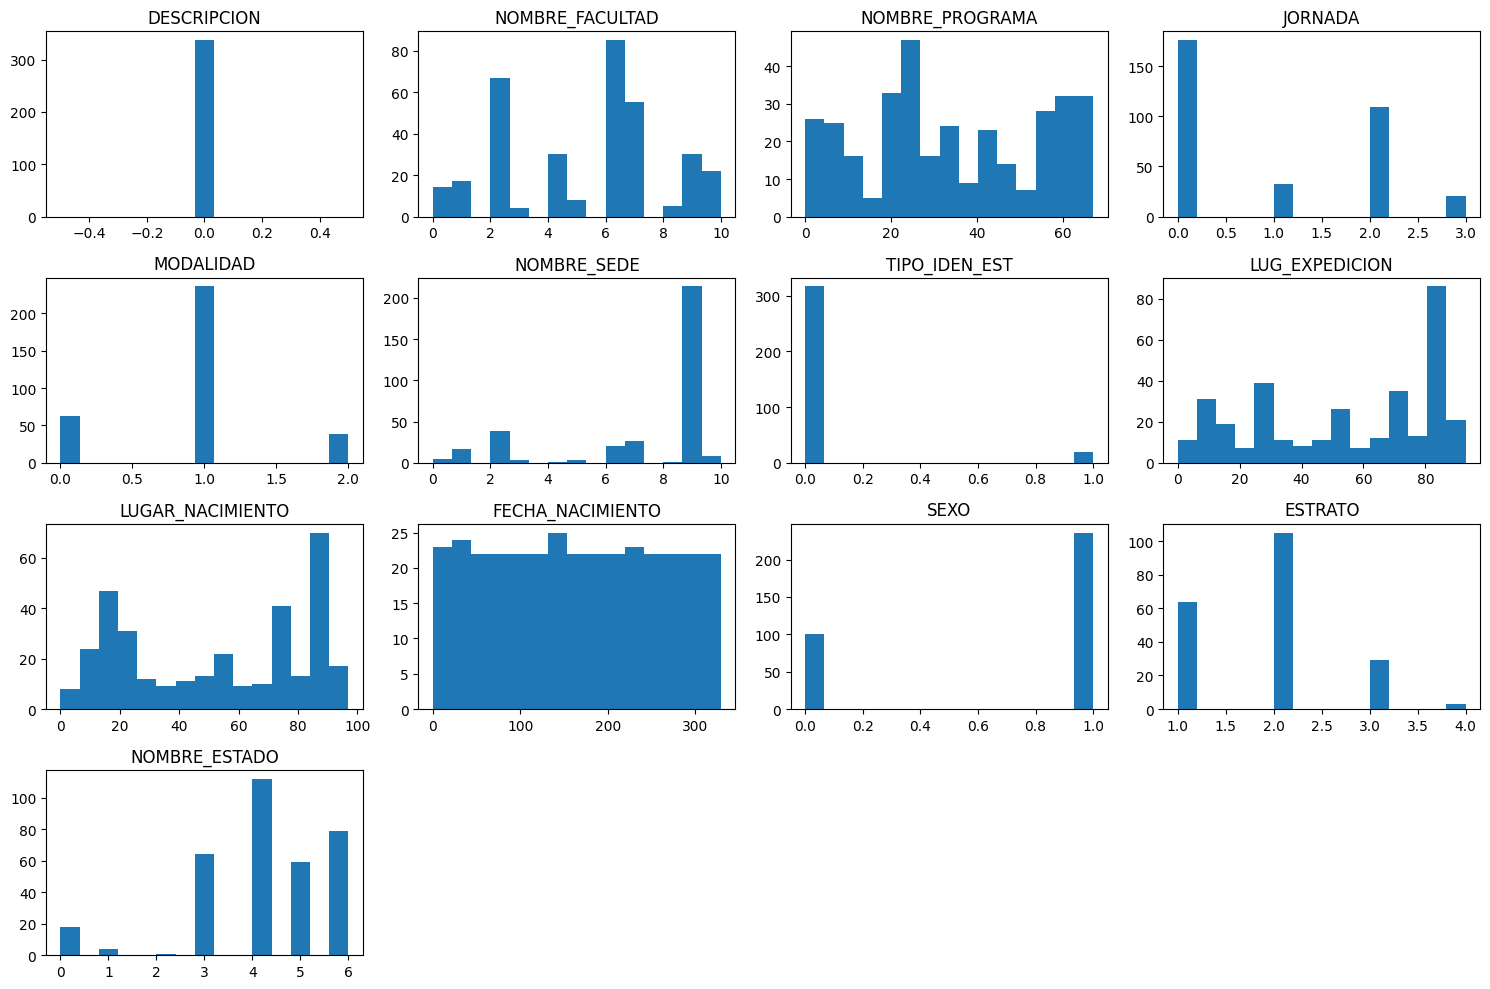

In [81]:
histograma(df_datosabiertoscod)

<Axes: >

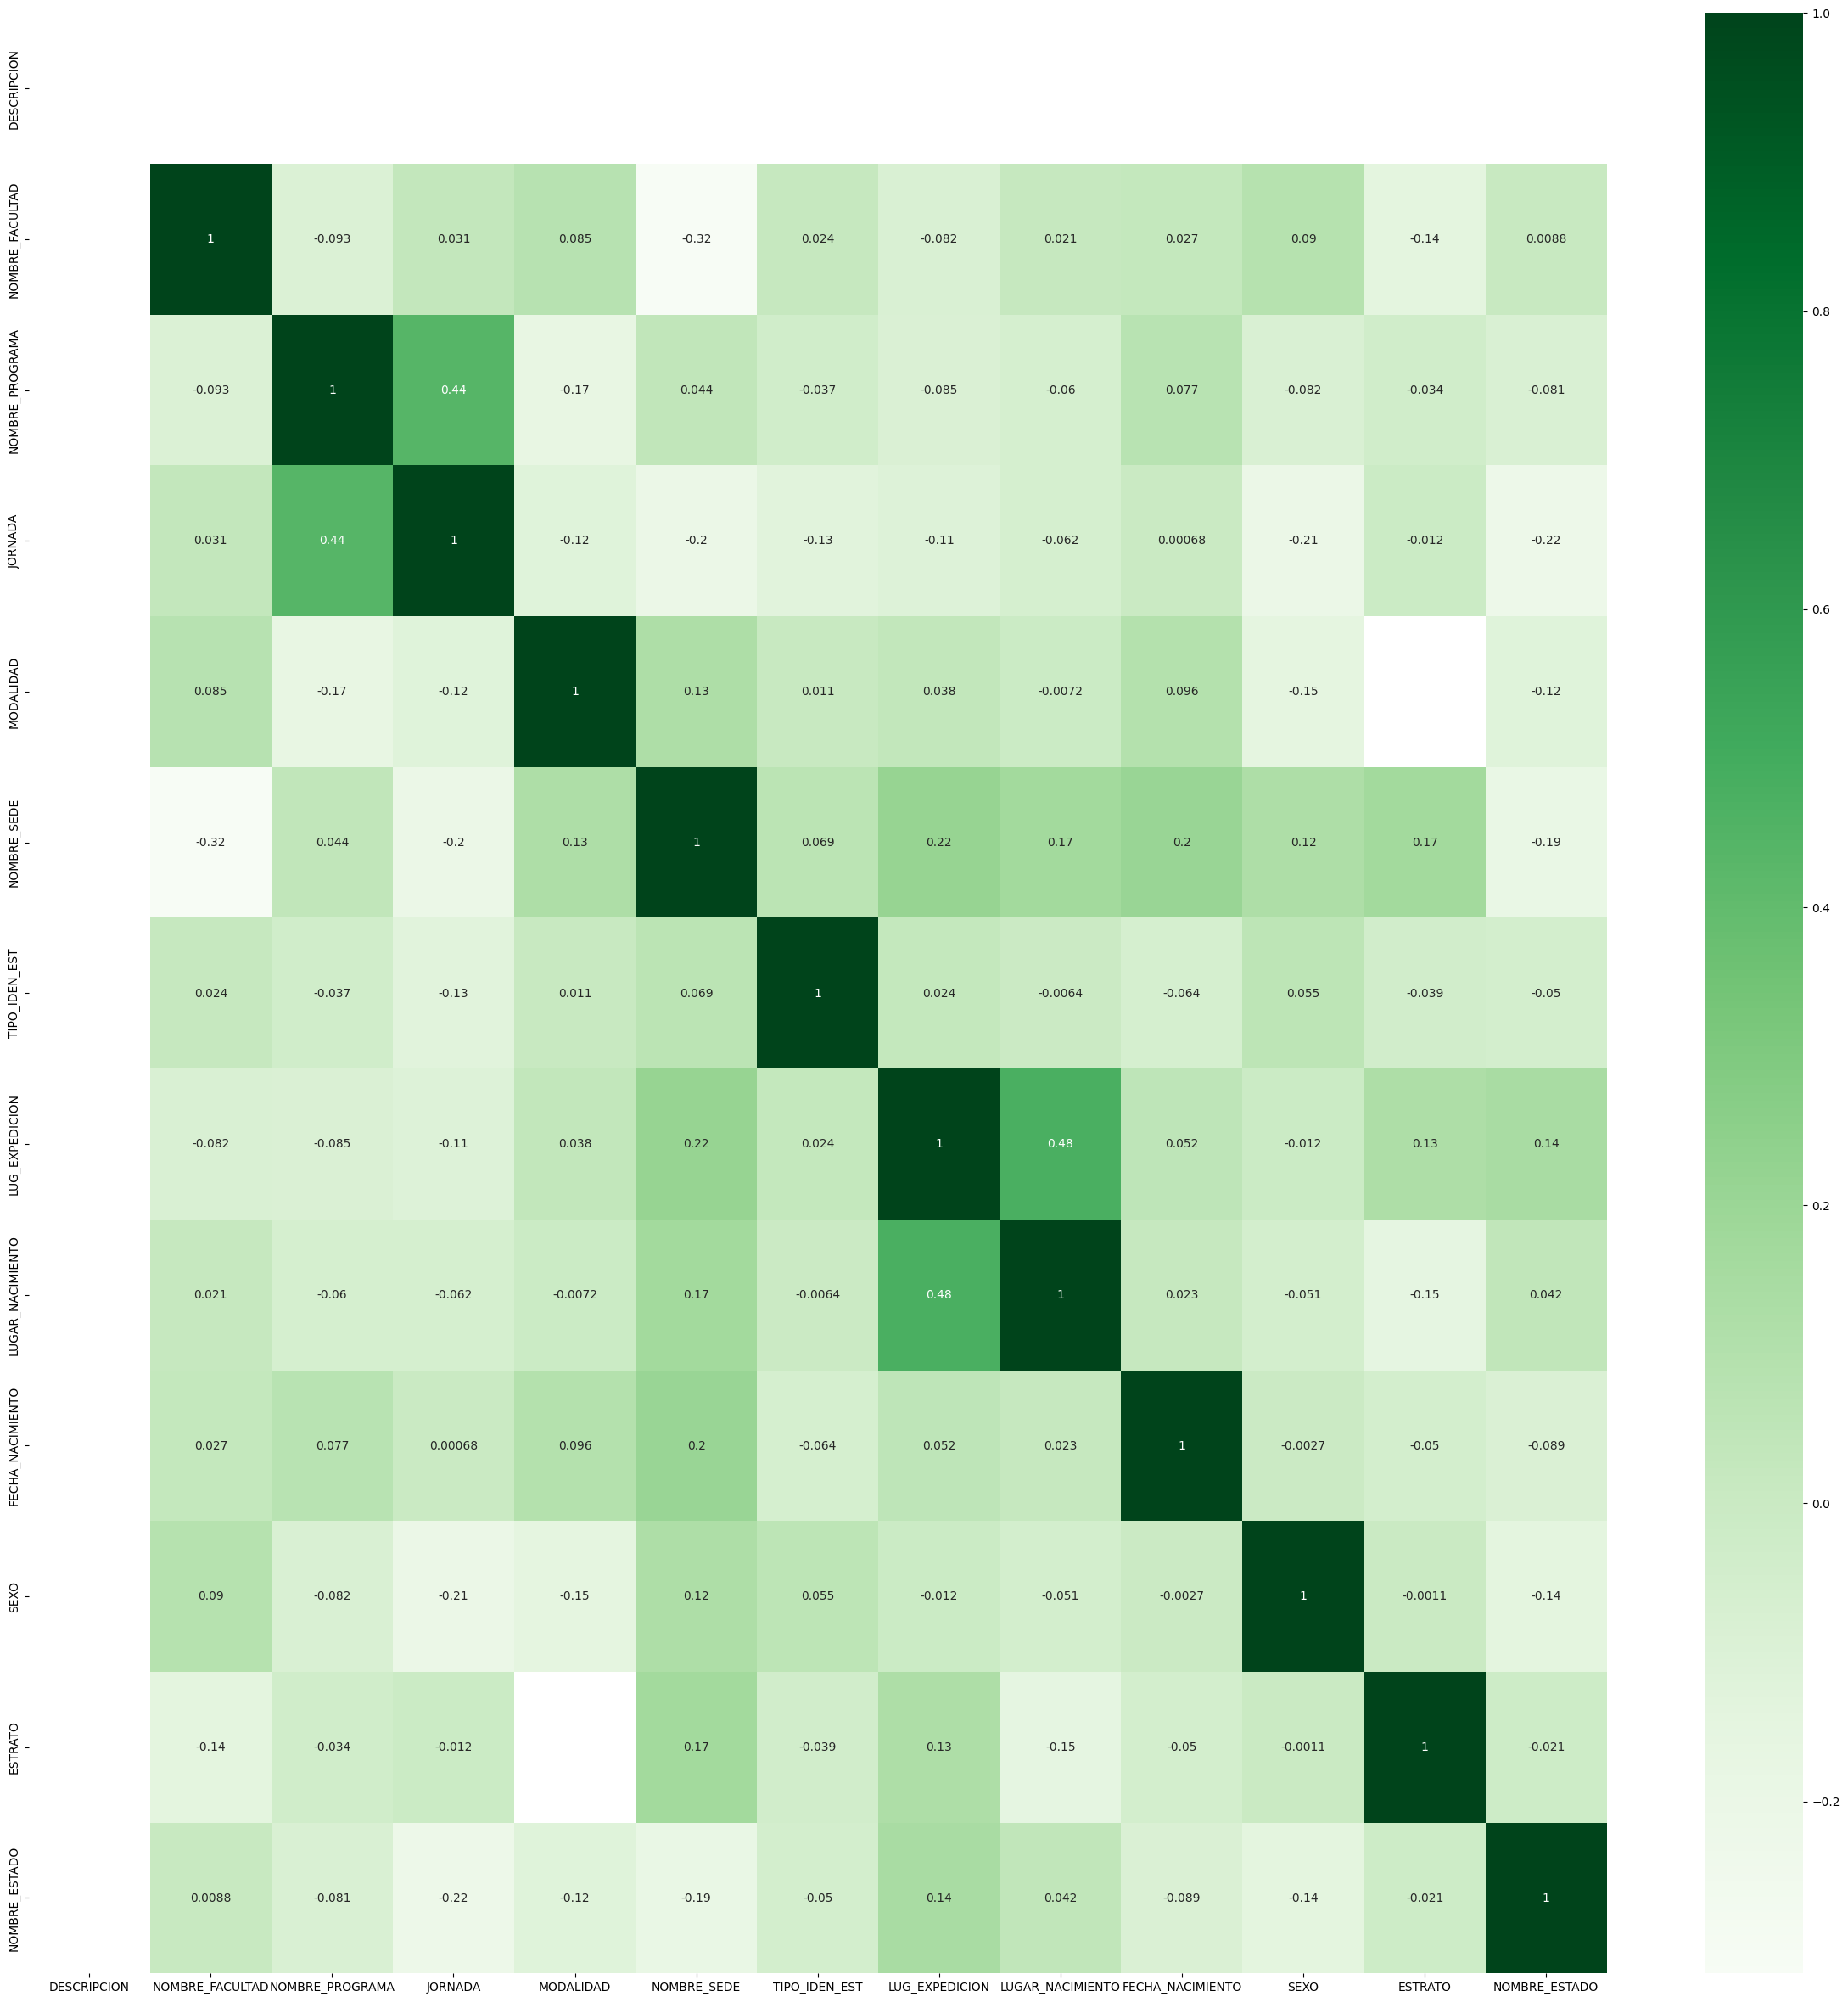

In [82]:
plt.rcParams["figure.figsize"]=(30,30)
df_corr=df_datosabiertoscod.corr()
sns.heatmap(df_corr, cmap="Greens", annot = True)

# Fase 3: Preparación de los datos UCI



> Dataframe compuesto de variables significativas



In [83]:
df_preparadoSignificativo = df_datosini[['Application mode','Course','Daytime/evening attendance\t','Previous qualification','Previous qualification (grade)','Admission grade','Debtor','Tuition fees up to date','Gender','Scholarship holder','Age at enrollment','Curricular units 1st sem (credited)','Curricular units 1st sem (enrolled)','Curricular units 1st sem (evaluations)','Curricular units 1st sem (approved)','Curricular units 1st sem (grade)','Curricular units 1st sem (without evaluations)','Curricular units 2nd sem (credited)','Curricular units 2nd sem (enrolled)','Curricular units 2nd sem (evaluations)','Curricular units 2nd sem (approved)','Curricular units 2nd sem (grade)','Curricular units 2nd sem (without evaluations)','Unemployment rate','Inflation rate','GDP','Target']]

In [84]:
df_preparadoSignificativo.head()

Application mode  Course  Daytime/evening attendance\t  \
0                17     171                             1   
1                15    9254                             1   
2                 1    9070                             1   
3                17    9773                             1   
4                39    8014                             0   

   Previous qualification  Previous qualification (grade)  Admission grade  \
0                       1                           122.0            127.3   
1                       1                           160.0            142.5   
2                       1                           122.0            124.8   
3                       1                           122.0            119.6   
4                       1                           100.0            141.5   

   Debtor  Tuition fees up to date  Gender  Scholarship holder  ...  \
0       0                        1       1                   0  ...   
1       0                        0       1                   0  ...   
2       0                        0       1                   0  ...   
3       0                        1       0                   0  ...   
4       0                        1       0                   0  ...   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    0   
1                                    0                                    6   
2                                    0                                    6   
3                                    0                                    6   
4                                    0                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 27 columns]

In [85]:
duplicates = df_preparadoSignificativo.duplicated()
print(duplicates.sum())
num_duplicates = duplicates.sum()
print(f"Se encontraron {num_duplicates} filas duplicadas.")
duplicated_rows = df_preparadoSignificativo[duplicates]
duplicated_rows

1
Se encontraron 1 filas duplicadas.


Application mode  Course  Daytime/evening attendance\t  \
2304                17    9147                             1   

      Previous qualification  Previous qualification (grade)  Admission grade  \
2304                       1                           133.1             95.0   

      Debtor  Tuition fees up to date  Gender  Scholarship holder  ...  \
2304       0                        1       1                   0  ...   

      Curricular units 2nd sem (credited)  \
2304                                    0   

      Curricular units 2nd sem (enrolled)  \
2304                                    5   

      Curricular units 2nd sem (evaluations)  \
2304                                       5   

      Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
2304                                    0                               0.0   

      Curricular units 2nd sem (without evaluations)  Unemployment rate  \
2304                                               0               11.1   

      Inflation rate   GDP   Target  
2304             0.6  2.02  Dropout  

[1 rows x 27 columns]

In [86]:
df_preparadoSignificativo.isnull().sum()

Application mode                                  0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Admission grade                                   0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
Curricular units 1st sem (credited)               0
Curricular units 1st sem (enrolled)               0
Curricular units 1st sem (evaluations)            0
Curricular units 1st sem (approved)               0
Curricular units 1st sem (grade)                  0
Curricular units 1st sem (without evaluations)    0
Curricular units 2nd sem (credited)               0
Curricular units 2nd sem (enrolled)               0
Curricular units 2nd sem (evaluations)            0
Curricular units 2nd sem (approved)               0
Curricular units 2nd sem (grade)                  0
Curricular units 2nd sem (without evaluations)    0
Unemployment rate                                 0
Inflation rate                                    0
GDP                                               0
Target                                            0
dtype: int64

In [87]:
df_preparadoSignificativo = df_preparadoSignificativo.drop_duplicates()

In [88]:
duplicates = df_preparadoSignificativo.duplicated()
print(duplicates.sum())
num_duplicates = duplicates.sum()
print(f"Se encontraron {num_duplicates} filas duplicadas.")
duplicated_rows = df_preparadoSignificativo[duplicates]
duplicated_rows

0
Se encontraron 0 filas duplicadas.


Empty DataFrame
Columns: [Application mode, Course, Daytime/evening attendance	, Previous qualification, Previous qualification (grade), Admission grade, Debtor, Tuition fees up to date, Gender, Scholarship holder, Age at enrollment, Curricular units 1st sem (credited), Curricular units 1st sem (enrolled), Curricular units 1st sem (evaluations), Curricular units 1st sem (approved), Curricular units 1st sem (grade), Curricular units 1st sem (without evaluations), Curricular units 2nd sem (credited), Curricular units 2nd sem (enrolled), Curricular units 2nd sem (evaluations), Curricular units 2nd sem (approved), Curricular units 2nd sem (grade), Curricular units 2nd sem (without evaluations), Unemployment rate, Inflation rate, GDP, Target]
Index: []

[0 rows x 27 columns]

## Codificación con Label

In [89]:
label_encoder = LabelEncoder()
df_preparado = df_preparadoSignificativo.copy()
df_preparado['Target'] = label_encoder.fit_transform(df_preparadoSignificativo['Target'])



0.   Dropout (Decersión)
1.   Enrrolled (Siguen estudiando)
2.   Graduate (Graduados)



In [90]:
df_preparado.head()

Application mode  Course  Daytime/evening attendance\t  \
0                17     171                             1   
1                15    9254                             1   
2                 1    9070                             1   
3                17    9773                             1   
4                39    8014                             0   

   Previous qualification  Previous qualification (grade)  Admission grade  \
0                       1                           122.0            127.3   
1                       1                           160.0            142.5   
2                       1                           122.0            124.8   
3                       1                           122.0            119.6   
4                       1                           100.0            141.5   

   Debtor  Tuition fees up to date  Gender  Scholarship holder  ...  \
0       0                        1       1                   0  ...   
1       0                        0       1                   0  ...   
2       0                        0       1                   0  ...   
3       0                        1       0                   0  ...   
4       0                        1       0                   0  ...   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    0   
1                                    0                                    6   
2                                    0                                    6   
3                                    0                                    6   
4                                    0                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP  Target  
0             1.4  1.74       0  
1            -0.3  0.79       2  
2             1.4  1.74       0  
3            -0.8 -3.12       2  
4            -0.3  0.79       2  

[5 rows x 27 columns]




> Dividir los datos en entrenamiento y prueba









In [91]:
X = df_preparado.drop(['Target'], axis=1).copy()
y = df_preparado['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



> Guardar los mismos datos en csv en el drive



In [92]:
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)
y_train_df = pd.DataFrame(y_train)
y_test_df = pd.DataFrame(y_test)

In [93]:
X_train_df.to_csv('/content/drive/MyDrive/Webinar/DatosLabel/X_train.csv', index=False)
X_test_df.to_csv('/content/drive/MyDrive/Webinar/DatosLabel/X_test.csv', index=False)
y_train_df.to_csv('/content/drive/MyDrive/Webinar/DatosLabel/y_train.csv', index=False)
y_test_df.to_csv('/content/drive/MyDrive/Webinar/DatosLabel/y_test.csv', index=False)

In [94]:
X_train = pd.read_csv('/content/drive/MyDrive/Webinar/DatosLabel/X_train.csv')
X_test = pd.read_csv('/content/drive/MyDrive/Webinar/DatosLabel/X_test.csv')
y_train = pd.read_csv('/content/drive/MyDrive/Webinar/DatosLabel/y_train.csv')
y_test = pd.read_csv('/content/drive/MyDrive/Webinar/DatosLabel/y_test.csv')



> Normalizar los datos



In [95]:
def scale_data(X_train, X_test=None, feature_range=(0, 1)):
    scaler = MinMaxScaler(feature_range=feature_range)

    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)

    if X_test is not None:
        X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)
        return X_train_scaled, X_test_scaled, scaler

    return X_train_scaled, scaler



> * Aplicar los datos normalizados al conjunto de prueba



In [96]:
X_train_scaled, X_test_scaled, scaler = scale_data(X_train, X_test)

In [97]:
X_train_scaled_df = pd.DataFrame(X_train_scaled)
X_test_scaled_df = pd.DataFrame(X_test_scaled)

In [100]:
X_train_scaled_df.to_csv('/content/drive/MyDrive/Webinar/DatosNormalizados/X_train_scaled.csv', index=False)
X_test_scaled_df.to_csv('/content/drive/MyDrive/Webinar/DatosNormalizados/X_test_scaled.csv', index=False)

In [101]:
X_train_scaled = pd.read_csv('/content/drive/MyDrive/Webinar/DatosNormalizados/X_train_scaled.csv')
X_test_scaled = pd.read_csv('/content/drive/MyDrive/Webinar/DatosNormalizados/X_test_scaled.csv')



> Balanceo de datos con Smote



In [102]:
smote = SMOTE(random_state=42)
X_train_balancedSmote, y_train_balancedSmote = smote.fit_resample(X_train_scaled, y_train)



> * Verificar la nueva distribución de las clases



In [103]:
print("Distribución de las clases antes de SMOTE:", y_train.value_counts())
print("Distribución de las clases después de SMOTE:", y_train_balancedSmote.value_counts())

Distribución de las clases antes de SMOTE: Target
2         1789
0         1118
1          631
Name: count, dtype: int64
Distribución de las clases después de SMOTE: Target
0         1789
1         1789
2         1789
Name: count, dtype: int64




> Guardar los mismos datos en csv en el drive



In [104]:
X_train_balancedSmote_df = pd.DataFrame(X_train_balancedSmote)
y_train_balancedSmote_df = pd.DataFrame(y_train_balancedSmote)

In [105]:
X_train_balancedSmote_df.to_csv('/content/drive/MyDrive/Webinar/DatosLabelSmoote/X_train_balancedSmote.csv', index=False)
y_train_balancedSmote_df.to_csv('/content/drive/MyDrive/Webinar/DatosLabelSmoote/y_train_balancedSmote.csv', index=False)

In [107]:
X_train_balancedSmote = pd.read_csv('/content/drive/MyDrive/Webinar/DatosLabelSmoote/X_train_balancedSmote.csv')
y_train_balancedSmote = pd.read_csv(/content/drive/MyDrive/Webinar/DatosLabelSmoote/y_train_balancedSmote.csv')

SyntaxError: unterminated string literal (detected at line 2) (<ipython-input-107-4dbb320a83af>, line 2)

In [108]:
X_train_balancedSmote.describe()

Application mode       Course  Daytime/evening attendance\t  \
count       5367.000000  5367.000000                   5367.000000   
mean           0.322479     0.880647                      0.887335   
std            0.308283     0.216083                      0.315716   
min            0.000000     0.000000                      0.000000   
25%            0.000000     0.909018                      1.000000   
50%            0.285714     0.924382                      1.000000   
75%            0.678571     0.955159                      1.000000   
max            1.000000     1.000000                      1.000000   

       Previous qualification  Previous qualification (grade)  \
count             5367.000000                     5367.000000   
mean                 0.082133                        0.388191   
std                  0.236082                        0.131496   
min                  0.000000                        0.000000   
25%                  0.000000                        0.305263   
50%                  0.000000                        0.389474   
75%                  0.000000                        0.463158   
max                  1.000000                        1.000000   

       Admission grade       Debtor  Tuition fees up to date       Gender  \
count      5367.000000  5367.000000              5367.000000  5367.000000   
mean          0.329239     0.127026                 0.877082     0.377218   
std           0.143422     0.331093                 0.327732     0.484181   
min           0.000000     0.000000                 0.000000     0.000000   
25%           0.238947     0.000000                 1.000000     0.000000   
50%           0.318947     0.000000                 1.000000     0.000000   
75%           0.405266     0.000000                 1.000000     1.000000   
max           1.000000     1.000000                 1.000000     1.000000   

       Scholarship holder  ...  \
count         5367.000000  ...   
mean             0.208280  ...   
std              0.405029  ...   
min              0.000000  ...   
25%              0.000000  ...   
50%              0.000000  ...   
75%              0.000000  ...   
max              1.000000  ...   

       Curricular units 1st sem (without evaluations)  \
count                                     5367.000000   
mean                                         0.011268   
std                                          0.052900   
min                                          0.000000   
25%                                          0.000000   
50%                                          0.000000   
75%                                          0.000000   
max                                          1.000000   

       Curricular units 2nd sem (credited)  \
count                          5367.000000   
mean                              0.025617   
std                               0.092645   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               0.000000   
max                               1.000000   

       Curricular units 2nd sem (enrolled)  \
count                          5367.000000   
mean                              0.264286   
std                               0.092201   
min                               0.000000   
25%                               0.217391   
50%                               0.260870   
75%                               0.289362   
max                               1.000000   

       Curricular units 2nd sem (evaluations)  \
count                             5367.000000   
mean                                 0.249146   
std                                  0.121050   
min                                  0.000000   
25%                                  0.181818   
50%                                  0.242424   
75%                                  0.303030   
max                                  1.000000   

   

In [109]:
X_train_balancedSmote, scaler = scale_data(X_train_balancedSmote)

In [110]:
X_train_balancedSmote.describe()

Application mode       Course  Daytime/evening attendance\t  \
count       5367.000000  5367.000000                   5367.000000   
mean           0.322479     0.880647                      0.887335   
std            0.308283     0.216083                      0.315716   
min            0.000000     0.000000                      0.000000   
25%            0.000000     0.909018                      1.000000   
50%            0.285714     0.924382                      1.000000   
75%            0.678571     0.955159                      1.000000   
max            1.000000     1.000000                      1.000000   

       Previous qualification  Previous qualification (grade)  \
count             5367.000000                     5367.000000   
mean                 0.082133                        0.388191   
std                  0.236082                        0.131496   
min                  0.000000                        0.000000   
25%                  0.000000                        0.305263   
50%                  0.000000                        0.389474   
75%                  0.000000                        0.463158   
max                  1.000000                        1.000000   

       Admission grade       Debtor  Tuition fees up to date       Gender  \
count      5367.000000  5367.000000              5367.000000  5367.000000   
mean          0.329239     0.127026                 0.877082     0.377218   
std           0.143422     0.331093                 0.327732     0.484181   
min           0.000000     0.000000                 0.000000     0.000000   
25%           0.238947     0.000000                 1.000000     0.000000   
50%           0.318947     0.000000                 1.000000     0.000000   
75%           0.405266     0.000000                 1.000000     1.000000   
max           1.000000     1.000000                 1.000000     1.000000   

       Scholarship holder  ...  \
count         5367.000000  ...   
mean             0.208280  ...   
std              0.405029  ...   
min              0.000000  ...   
25%              0.000000  ...   
50%              0.000000  ...   
75%              0.000000  ...   
max              1.000000  ...   

       Curricular units 1st sem (without evaluations)  \
count                                     5367.000000   
mean                                         0.011268   
std                                          0.052900   
min                                          0.000000   
25%                                          0.000000   
50%                                          0.000000   
75%                                          0.000000   
max                                          1.000000   

       Curricular units 2nd sem (credited)  \
count                          5367.000000   
mean                              0.025617   
std                               0.092645   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               0.000000   
max                               1.000000   

       Curricular units 2nd sem (enrolled)  \
count                          5367.000000   
mean                              0.264286   
std                               0.092201   
min                               0.000000   
25%                               0.217391   
50%                               0.260870   
75%                               0.289362   
max                               1.000000   

       Curricular units 2nd sem (evaluations)  \
count                             5367.000000   
mean                                 0.249146   
std                                  0.121050   
min                                  0.000000   
25%                                  0.181818   
50%                                  0.242424   
75%                                  0.303030   
max                                  1.000000   

   



> Gráfica de dispersión



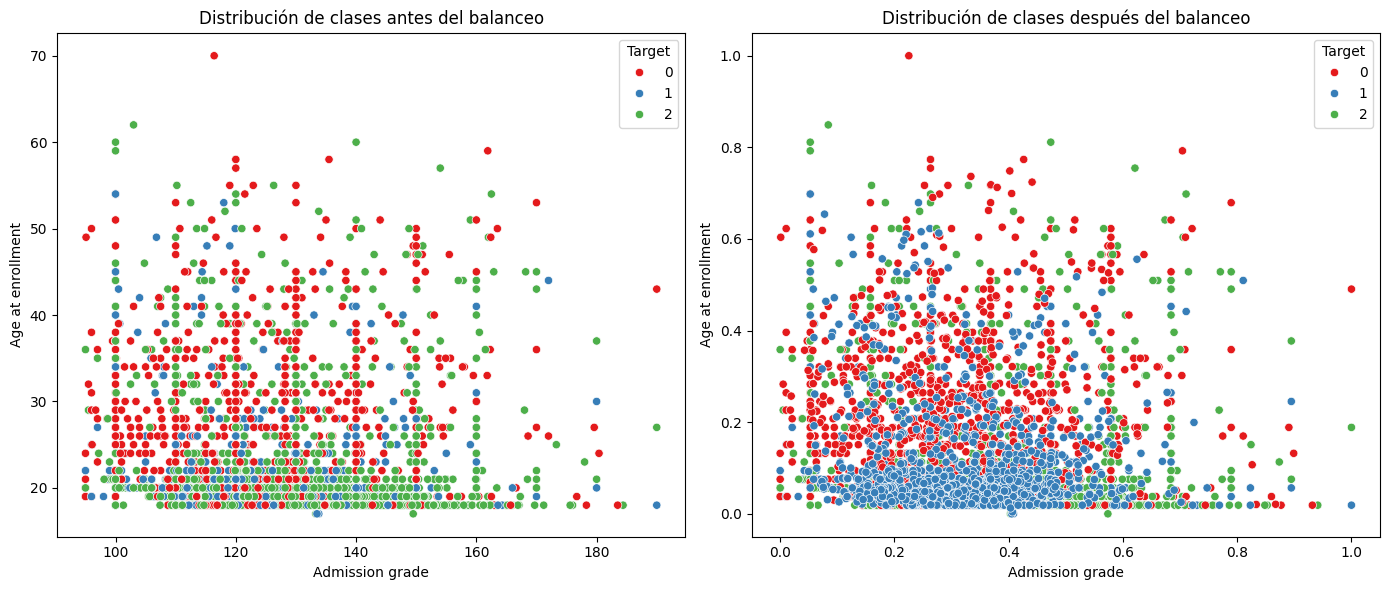

In [111]:
y_train = pd.Series(y_train.squeeze(), index=X_train.index)

feature_x = 'Admission grade'
feature_y = 'Age at enrollment'

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=X_train, x=feature_x, y=feature_y, hue=y_train, palette='Set1')
plt.title('Distribución de clases antes del balanceo')
plt.xlabel(feature_x)
plt.ylabel(feature_y)

X_train_balanced_df = pd.DataFrame(X_train_balancedSmote, columns=X_train.columns)
y_train_balancedSmote = pd.Series(y_train_balancedSmote.squeeze())
plt.subplot(1, 2, 2)
sns.scatterplot(data=X_train_balanced_df, x=feature_x, y=feature_y, hue=y_train_balancedSmote, palette='Set1')
plt.title('Distribución de clases después del balanceo')
plt.xlabel(feature_x)
plt.ylabel(feature_y)

plt.tight_layout()
plt.show()



> Balanceo de datos con Tomek Links



In [112]:
smote_tomek = SMOTETomek(random_state=42)
X_train_balancedTomek, y_train_balancedTomek = smote_tomek.fit_resample(X_train_scaled, y_train)

In [113]:
print("Distribución de las clases antes de SMOTE+Tomek Links:", y_train.value_counts())
print("Distribución de las clases después de SMOTE+Tomek Links:", y_train_balancedTomek.value_counts())

Distribución de las clases antes de SMOTE+Tomek Links: Target
2    1789
0    1118
1     631
Name: count, dtype: int64
Distribución de las clases después de SMOTE+Tomek Links: Target
0    1734
1    1728
2    1703
Name: count, dtype: int64




> Guardar los datos en csv en el drive



In [114]:
X_train_balancedTomek_df = pd.DataFrame(X_train_balancedTomek)
y_train_balancedTomek_df = pd.DataFrame(y_train_balancedTomek)

In [115]:
X_train_balancedTomek_df.to_csv('/content/drive/MyDrive/Webinar/DatosLabelTomek/X_train_balancedTomek.csv', index=False)
y_train_balancedTomek_df.to_csv('/content/drive/MyDrive/Webinar/DatosLabelTomek/y_train_balancedTomek.csv', index=False)

In [117]:
X_train_balancedTomek = pd.read_csv('/content/drive/MyDrive/Webinar/DatosLabelTomek/X_train_balancedTomek.csv')
y_train_balancedTomek = pd.read_csv('/content/drive/MyDrive/Webinar/DatosLabelTomek/y_train_balancedTomek.csv')

In [118]:
X_train_balancedTomek.describe()

Application mode       Course  Daytime/evening attendance\t  \
count       5165.000000  5165.000000                   5165.000000   
mean           0.322958     0.883618                      0.887963   
std            0.308542     0.210428                      0.314926   
min            0.000000     0.000000                      0.000000   
25%            0.000000     0.909090                      1.000000   
50%            0.285714     0.924382                      1.000000   
75%            0.678571     0.955218                      1.000000   
max            1.000000     1.000000                      1.000000   

       Previous qualification  Previous qualification (grade)  \
count             5165.000000                     5165.000000   
mean                 0.081097                        0.388113   
std                  0.234025                        0.130651   
min                  0.000000                        0.000000   
25%                  0.000000                        0.305263   
50%                  0.000000                        0.389474   
75%                  0.000000                        0.463158   
max                  1.000000                        1.000000   

       Admission grade       Debtor  Tuition fees up to date       Gender  \
count      5165.000000  5165.000000              5165.000000  5165.000000   
mean          0.328488     0.128121                 0.874211     0.374546   
std           0.143120     0.332249                 0.330984     0.483476   
min           0.000000     0.000000                 0.000000     0.000000   
25%           0.237895     0.000000                 1.000000     0.000000   
50%           0.318165     0.000000                 1.000000     0.000000   
75%           0.405263     0.000000                 1.000000     1.000000   
max           1.000000     1.000000                 1.000000     1.000000   

       Scholarship holder  ...  \
count         5165.000000  ...   
mean             0.207132  ...   
std              0.404158  ...   
min              0.000000  ...   
25%              0.000000  ...   
50%              0.000000  ...   
75%              0.000000  ...   
max              1.000000  ...   

       Curricular units 1st sem (without evaluations)  \
count                                     5165.000000   
mean                                         0.011331   
std                                          0.053164   
min                                          0.000000   
25%                                          0.000000   
50%                                          0.000000   
75%                                          0.000000   
max                                          1.000000   

       Curricular units 2nd sem (credited)  \
count                          5165.000000   
mean                              0.025294   
std                               0.092438   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               0.000000   
max                               1.000000   

       Curricular units 2nd sem (enrolled)  \
count                          5165.000000   
mean                              0.264812   
std                               0.090959   
min                               0.000000   
25%                               0.217391   
50%                               0.260870   
75%                               0.289398   
max                               1.000000   

       Curricular units 2nd sem (evaluations)  \
count                             5165.000000   
mean                                 0.249397   
std                                  0.120828   
min                                  0.000000   
25%                                  0.181818   
50%                                  0.242424   
75%                                  0.303030   
max                                  1.000000   

   

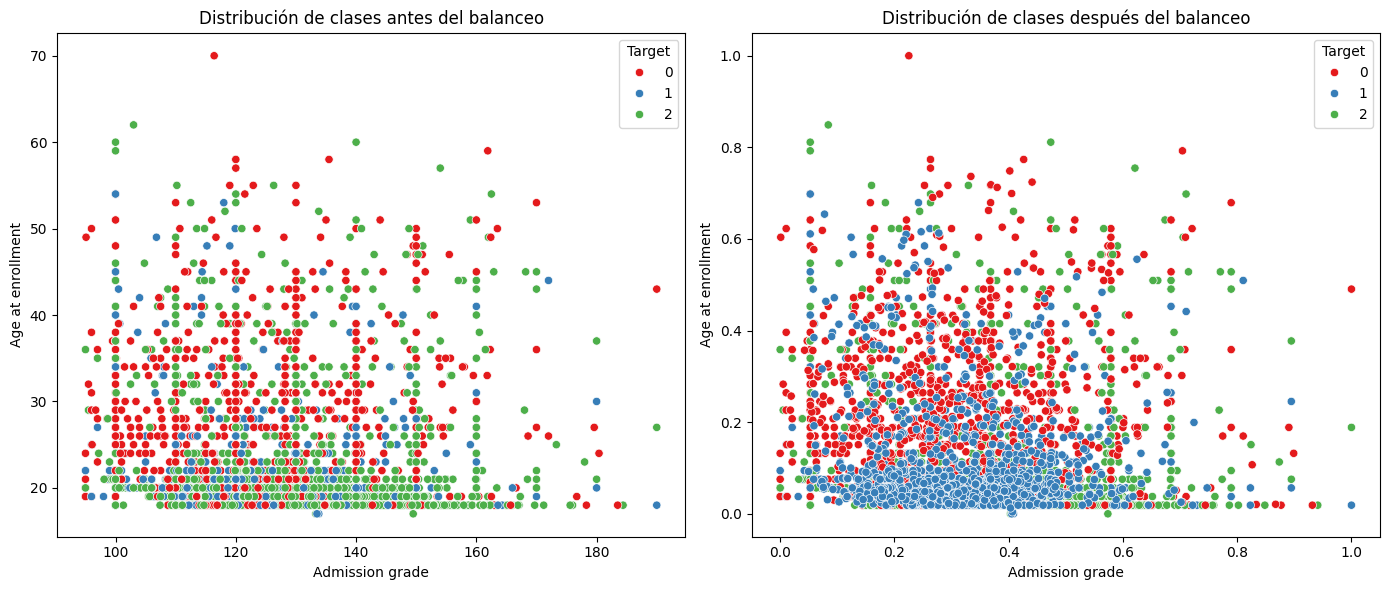

In [119]:
y_train_balancedTomek = pd.Series(y_train_balancedTomek.squeeze())

feature_x = 'Admission grade'
feature_y = 'Age at enrollment'

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=X_train, x=feature_x, y=feature_y, hue=y_train, palette='Set1')
plt.title('Distribución de clases antes del balanceo')
plt.xlabel(feature_x)
plt.ylabel(feature_y)

X_train_balanced_df = pd.DataFrame(X_train_balancedTomek, columns=X_train.columns)
plt.subplot(1, 2, 2)
sns.scatterplot(data=X_train_balanced_df, x=feature_x, y=feature_y, hue=y_train_balancedTomek, palette='Set1')
plt.title('Distribución de clases después del balanceo')
plt.xlabel(feature_x)
plt.ylabel(feature_y)

plt.tight_layout()
plt.show()



> Balanceo de datos con Random Under Sampler



In [120]:
undersampler = RandomUnderSampler(random_state=42)
X_train_balance_Random, y_train_balance_Random = undersampler.fit_resample(X_train_scaled, y_train)

In [121]:
print("Distribución de las clases antes del undersampling:", y_train.value_counts())
print("Distribución de clases después del undersampling:", y_train_balance_Random.value_counts())

Distribución de las clases antes del undersampling: Target
2    1789
0    1118
1     631
Name: count, dtype: int64
Distribución de clases después del undersampling: Target
0    631
1    631
2    631
Name: count, dtype: int64




> Guardar los datos en csv en el drive



In [122]:
X_train_balance_Random_df = pd.DataFrame(X_train_balance_Random)
y_train_balance_Random_df = pd.DataFrame(y_train_balance_Random)

In [123]:
X_train_balance_Random_df.to_csv('/content/drive/MyDrive/Webinar/DatosLabelRandom/X_train_balance_Random.csv', index=False)
y_train_balance_Random_df.to_csv('/content/drive/MyDrive/Webinar/DatosLabelRandom/y_train_balance_Random.csv', index=False)

In [125]:
X_train_balance_Random = pd.read_csv('/content/drive/MyDrive/Webinar/DatosLabelRandom/X_train_balance_Random.csv')
y_train_balance_Random = pd.read_csv('/content/drive/MyDrive/Webinar/DatosLabelRandom/y_train_balance_Random.csv')

In [126]:
X_train_balance_Random.describe()

Application mode       Course  Daytime/evening attendance\t  \
count       1893.000000  1893.000000                   1893.000000   
mean           0.325523     0.884684                      0.888008   
std            0.311092     0.207937                      0.315439   
min            0.000000     0.000000                      0.000000   
25%            0.000000     0.909018                      1.000000   
50%            0.285714     0.924382                      1.000000   
75%            0.678571     0.956317                      1.000000   
max            1.000000     1.000000                      1.000000   

       Previous qualification  Previous qualification (grade)  \
count             1893.000000                     1893.000000   
mean                 0.079667                        0.388291   
std                  0.233250                        0.138853   
min                  0.000000                        0.000000   
25%                  0.000000                        0.294737   
50%                  0.000000                        0.400000   
75%                  0.000000                        0.473684   
max                  1.000000                        1.000000   

       Admission grade       Debtor  Tuition fees up to date      Gender  \
count      1893.000000  1893.000000              1893.000000  1893.00000   
mean          0.326921     0.126255                 0.869519     0.37982   
std           0.152652     0.332224                 0.336921     0.48547   
min           0.000000     0.000000                 0.000000     0.00000   
25%           0.228421     0.000000                 1.000000     0.00000   
50%           0.316842     0.000000                 1.000000     0.00000   
75%           0.410526     0.000000                 1.000000     1.00000   
max           1.000000     1.000000                 1.000000     1.00000   

       Scholarship holder  ...  \
count         1893.000000  ...   
mean             0.205494  ...   
std              0.404169  ...   
min              0.000000  ...   
25%              0.000000  ...   
50%              0.000000  ...   
75%              0.000000  ...   
max              1.000000  ...   

       Curricular units 1st sem (without evaluations)  \
count                                     1893.000000   
mean                                         0.012282   
std                                          0.056635   
min                                          0.000000   
25%                                          0.000000   
50%                                          0.000000   
75%                                          0.000000   
max                                          0.666667   

       Curricular units 2nd sem (credited)  \
count                          1893.000000   
mean                              0.021965   
std                               0.081442   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               0.000000   
max                               0.736842   

       Curricular units 2nd sem (enrolled)  \
count                          1893.000000   
mean                              0.263465   
std                               0.086832   
min                               0.000000   
25%                               0.217391   
50%                               0.260870   
75%                               0.260870   
max                               0.739130   

       Curricular units 2nd sem (evaluations)  \
count                             1893.000000   
mean                                 0.248235   
std                                  0.120673   
min                                  0.000000   
25%                                  0.181818   
50%                                  0.242424   
75%                                  0.303030   
max                                  0.848485   

       Curri

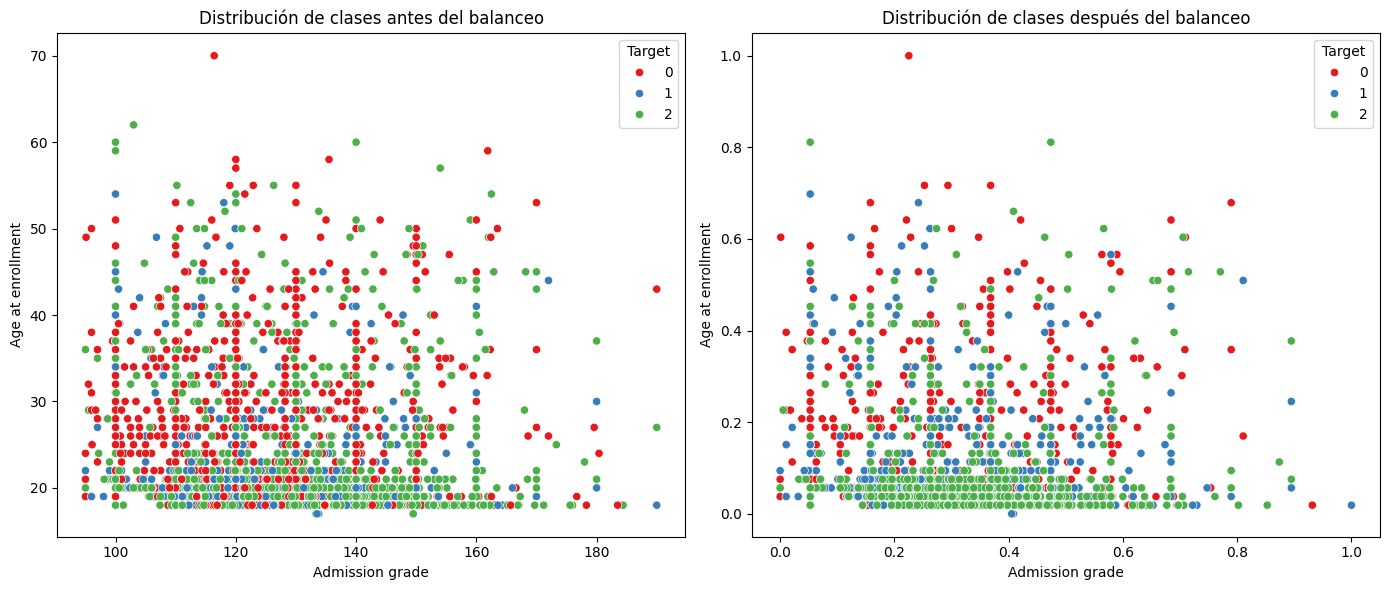

In [127]:
y_train_balance_Random = pd.Series(y_train_balance_Random.squeeze())

feature_x = 'Admission grade'
feature_y = 'Age at enrollment'

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=X_train, x=feature_x, y=feature_y, hue=y_train, palette='Set1')
plt.title('Distribución de clases antes del balanceo')
plt.xlabel(feature_x)
plt.ylabel(feature_y)

plt.subplot(1, 2, 2)
X_train_balanced_df = pd.DataFrame(X_train_balance_Random, columns=X_train.columns)
sns.scatterplot(data=X_train_balanced_df, x=feature_x, y=feature_y, hue=y_train_balance_Random, palette='Set1')
plt.title('Distribución de clases después del balanceo')
plt.xlabel(feature_x)
plt.ylabel(feature_y)

plt.tight_layout()
plt.show()

#Fase 3: Preparacion datos abiertos

In [128]:
df_datosabiertos['ESTRATO'].fillna(int(df_datosabiertos['ESTRATO'].mean()), inplace=True)

<ipython-input-128-50d1f0f7a1d3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_datosabiertos['ESTRATO'].fillna(int(df_datosabiertos['ESTRATO'].mean()), inplace=True)


In [129]:
df_datosabiertos['JORNADA'].fillna(df_datosabiertos['JORNADA'].mode()[0], inplace=True)

<ipython-input-129-1fb9fcdfa82e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_datosabiertos['JORNADA'].fillna(df_datosabiertos['JORNADA'].mode()[0], inplace=True)


In [130]:
missing_values_table(df_datosabiertos)

Columns in dataset: 13.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

In [131]:
df_datosabiertos.nunique()

DESCRIPCION           1
NOMBRE_FACULTAD      11
NOMBRE_PROGRAMA      68
JORNADA               3
MODALIDAD             3
NOMBRE_SEDE          11
TIPO_IDEN_EST         2
LUG_EXPEDICION       94
LUGAR_NACIMIENTO     98
FECHA_NACIMIENTO    330
SEXO                  2
ESTRATO               4
NOMBRE_ESTADO         7
dtype: int64

In [132]:
df_datosabiertos['SEXO'].unique()

array(['M', 'F'], dtype=object)

In [133]:
df_datosabiertos['JORNADA'].unique()

array(['DIURNO', 'OTRO', 'NOCTURNO'], dtype=object)



> Codificación con label



In [134]:
df_datosabiertoscod = df_datosabiertos.copy()

label_encoder = LabelEncoder()

columnas_a_codificar = ['DESCRIPCION', 'NOMBRE_FACULTAD', 'NOMBRE_PROGRAMA', 'JORNADA','MODALIDAD','NOMBRE_SEDE','TIPO_IDEN_EST','LUG_EXPEDICION','LUGAR_NACIMIENTO','FECHA_NACIMIENTO','SEXO','NOMBRE_ESTADO']

for columna in columnas_a_codificar:
    df_datosabiertoscod[columna] = label_encoder.fit_transform(df_datosabiertoscod[columna])

In [135]:
def describir_datos(dataset):
    rows, cols = dataset.shape
    print(f'Rows: {rows} | Features: {cols}')
    print()
    print(dataset.describe())
    print()
    print('Data types:')
    print(dataset.dtypes)

In [136]:
describir_datos(df_datosabiertoscod)

Rows: 337 | Features: 13

       DESCRIPCION  NOMBRE_FACULTAD  NOMBRE_PROGRAMA     JORNADA   MODALIDAD  \
count        337.0       337.000000       337.000000  337.000000  337.000000   
mean           0.0         5.186944        34.172107    0.741840    0.925816   
std            0.0         2.802647        20.810513    0.917002    0.543209   
min            0.0         0.000000         0.000000    0.000000    0.000000   
25%            0.0         2.000000        20.000000    0.000000    1.000000   
50%            0.0         6.000000        32.000000    0.000000    1.000000   
75%            0.0         7.000000        55.000000    2.000000    1.000000   
max            0.0        10.000000        67.000000    2.000000    2.000000   

       NOMBRE_SEDE  TIPO_IDEN_EST  LUG_EXPEDICION  LUGAR_NACIMIENTO  \
count   337.000000     337.000000      337.000000        337.000000   
mean      7.252226       0.059347       53.818991         52.465875   
std       2.888586       0.236625       

In [137]:
df_datosabiertoscod['Target'] = 0

In [138]:
df_datosabiertoscod = df_datosabiertoscod.drop('DESCRIPCION', axis=1)
df_datosabiertoscod = df_datosabiertoscod.drop('SEXO', axis=1)

In [139]:
df_datosabiertoscod.head()

NOMBRE_FACULTAD  NOMBRE_PROGRAMA  JORNADA  MODALIDAD  NOMBRE_SEDE  \
0                0                5        0          1            9   
1                0                5        0          1            9   
2                0                5        0          1            9   
3                0                5        0          1            9   
4                0               19        0          1            9   

   TIPO_IDEN_EST  LUG_EXPEDICION  LUGAR_NACIMIENTO  FECHA_NACIMIENTO  ESTRATO  \
0              0              92                95               105      3.0   
1              0              70                75               318      1.0   
2              0              70                75               139      3.0   
3              0              83                55               299      3.0   
4              1              68                73                 4      2.0   

   NOMBRE_ESTADO  Target  
0              3       0  
1              4       0  
2              4       0  
3              6       0  
4              3       0

# Fase 4: Modelado



## Entrenamiento con Naive Bayes





### Datos desbalanceados



In [140]:
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_scaled, y_train)
predictions = naive_bayes_classifier.predict(X_test_scaled)

In [141]:
print('Accuracy score: ', accuracy_score(y_test, predictions))
print('Precision score: ', precision_score(y_test, predictions, average='macro'))
print('Recall score: ', recall_score(y_test, predictions, average='macro'))
print('F1 Score: ', f1_score(y_test, predictions, average='macro'))
print(classification_report(y_test, predictions))

Accuracy score:  0.6474576271186441
Precision score:  0.4509634244836737
Recall score:  0.5105802585935036
F1 Score:  0.46688781768862625
              precision    recall  f1-score   support

           0       0.74      0.60      0.66       302
           1       0.00      0.00      0.00       163
           2       0.61      0.94      0.74       420

    accuracy                           0.65       885
   macro avg       0.45      0.51      0.47       885
weighted avg       0.54      0.65      0.58       885



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

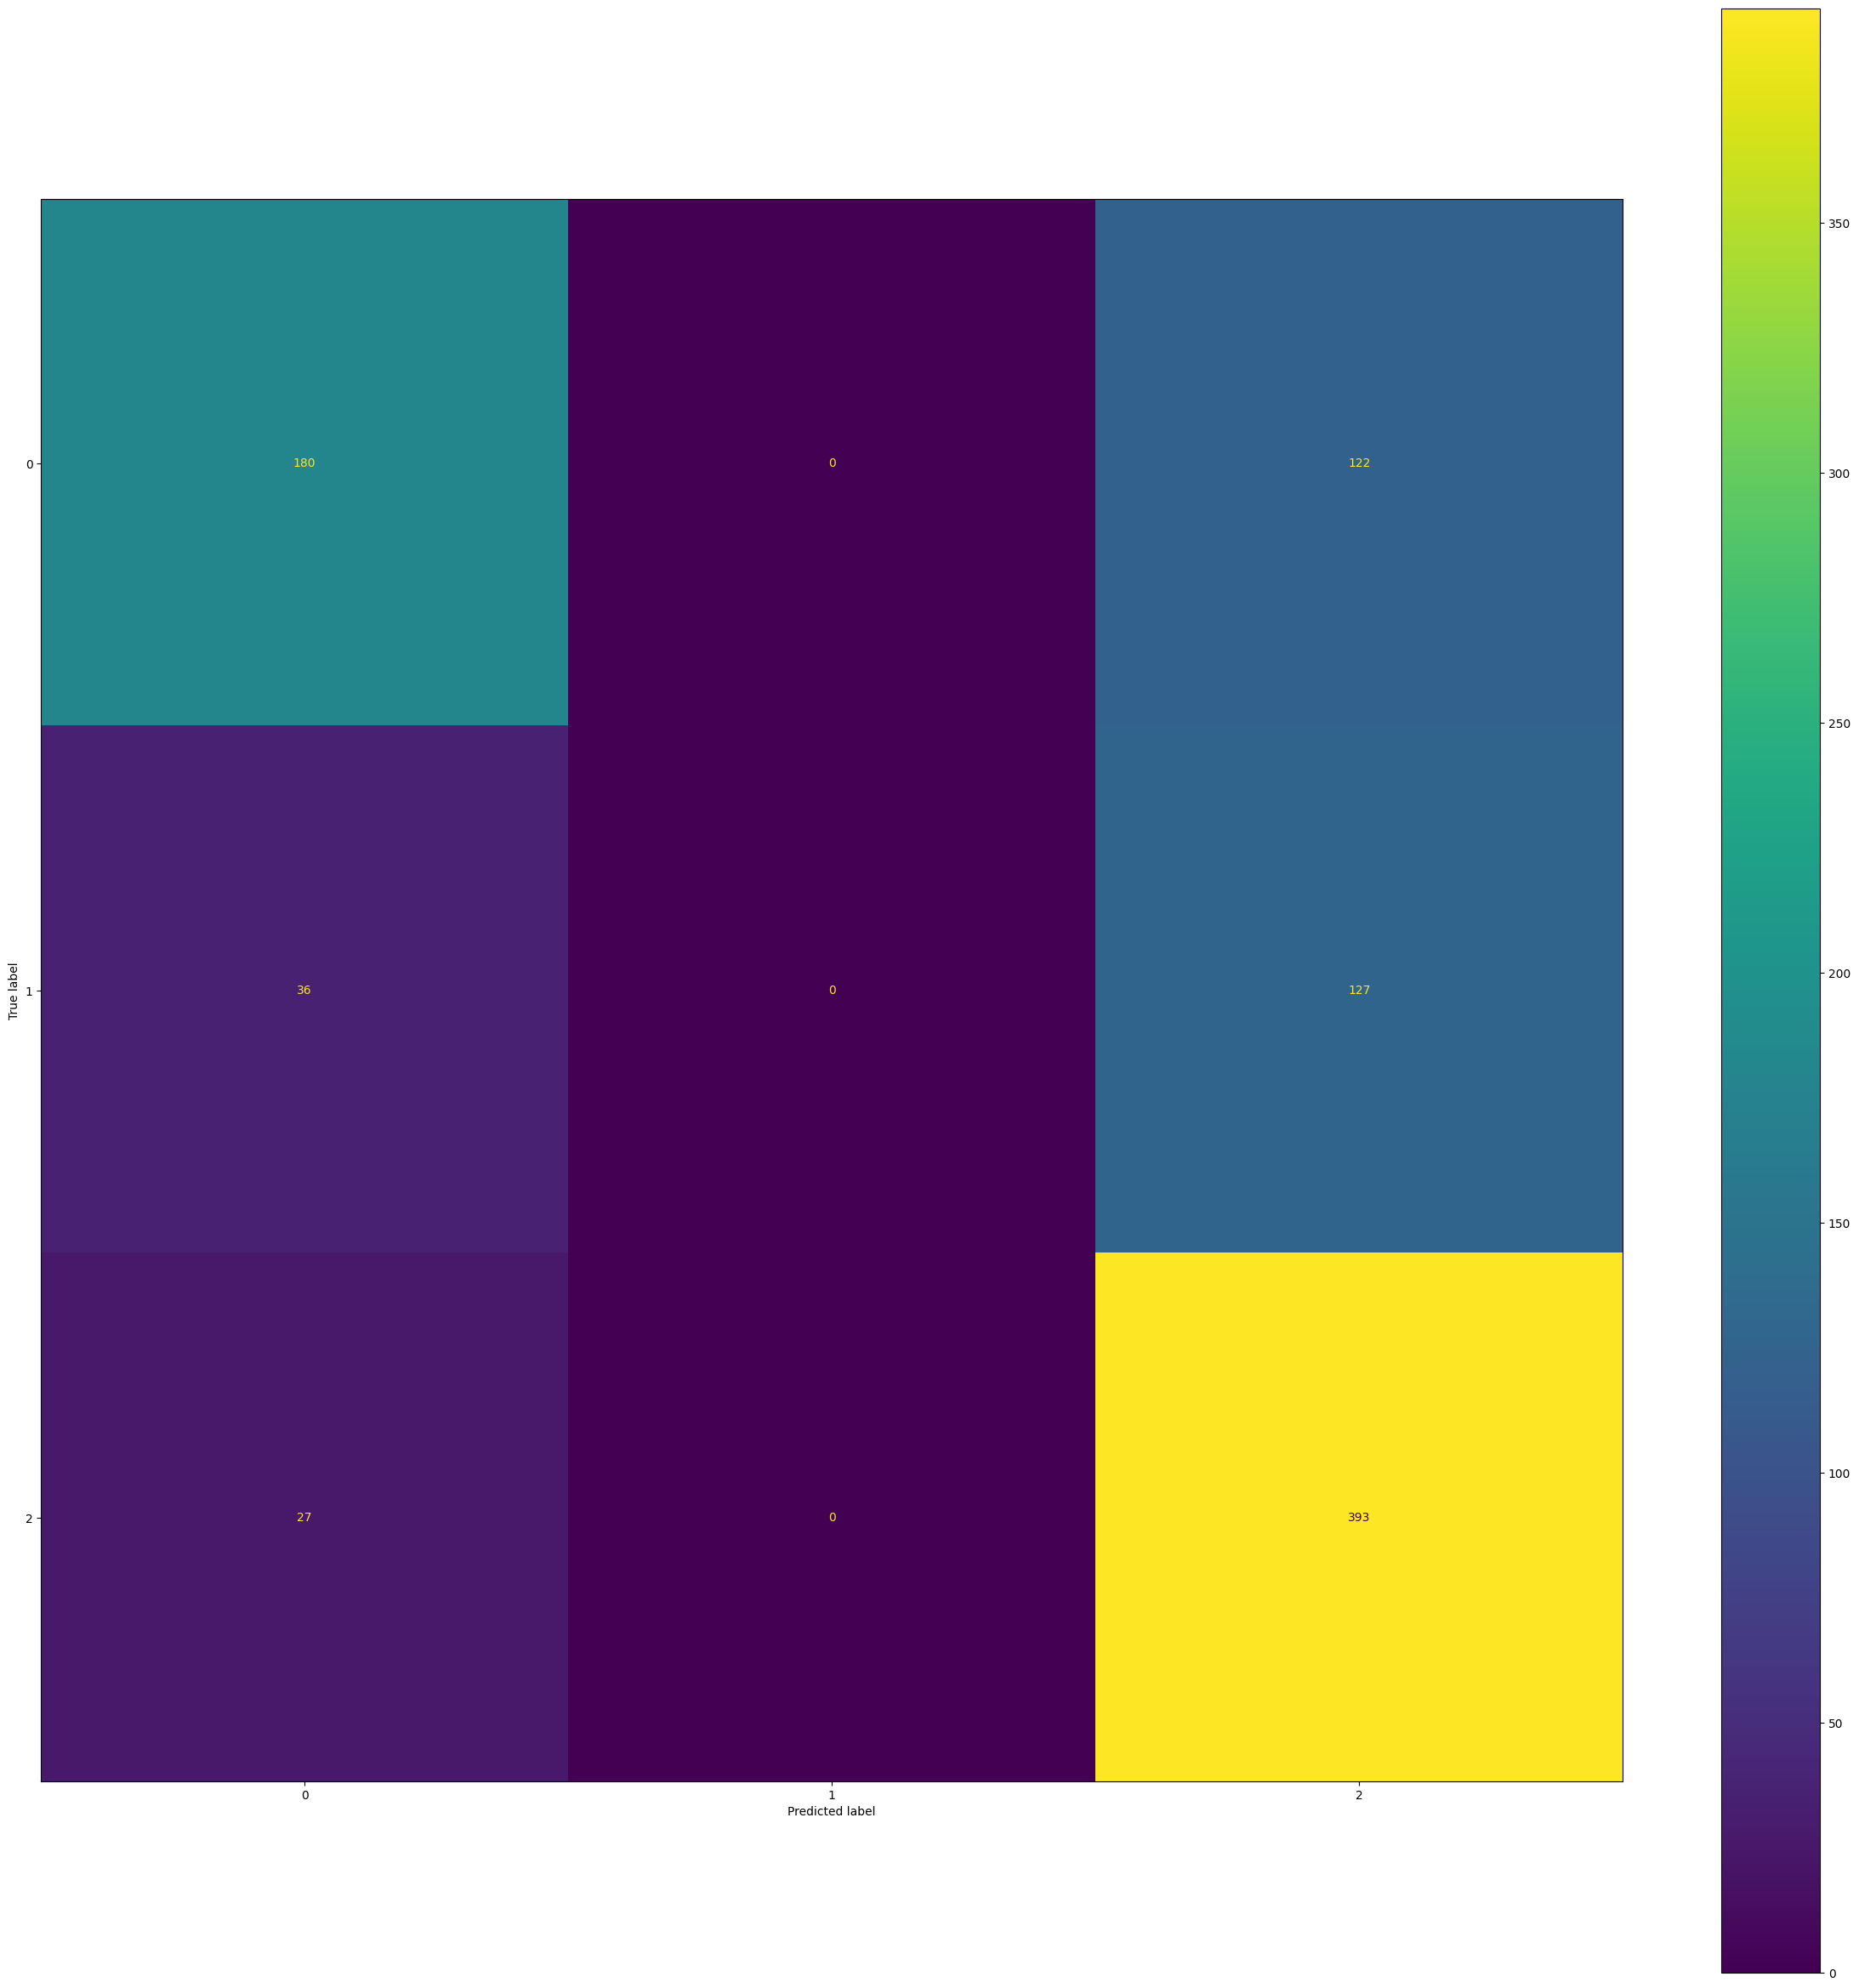

In [142]:
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=naive_bayes_classifier.classes_)
disp.plot()
plt.show()



### Datos con balanceo Smote



In [143]:
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_balancedSmote, y_train_balancedSmote)
predictionsS = naive_bayes_classifier.predict(X_test_scaled)

In [144]:
print('Accuracy score: ', accuracy_score(y_test, predictionsS))
print('Precision score: ', precision_score(y_test, predictionsS, average='macro'))
print('Recall score: ', recall_score(y_test, predictionsS, average='macro'))
print('F1 Score: ', f1_score(y_test, predictionsS, average='macro'))
print(classification_report(y_test, predictionsS))

Accuracy score:  0.6451977401129944
Precision score:  0.6042163250172149
Recall score:  0.5915485364231962
F1 Score:  0.5941636505570932
              precision    recall  f1-score   support

           0       0.77      0.64      0.70       302
           1       0.31      0.39      0.34       163
           2       0.73      0.75      0.74       420

    accuracy                           0.65       885
   macro avg       0.60      0.59      0.59       885
weighted avg       0.67      0.65      0.65       885



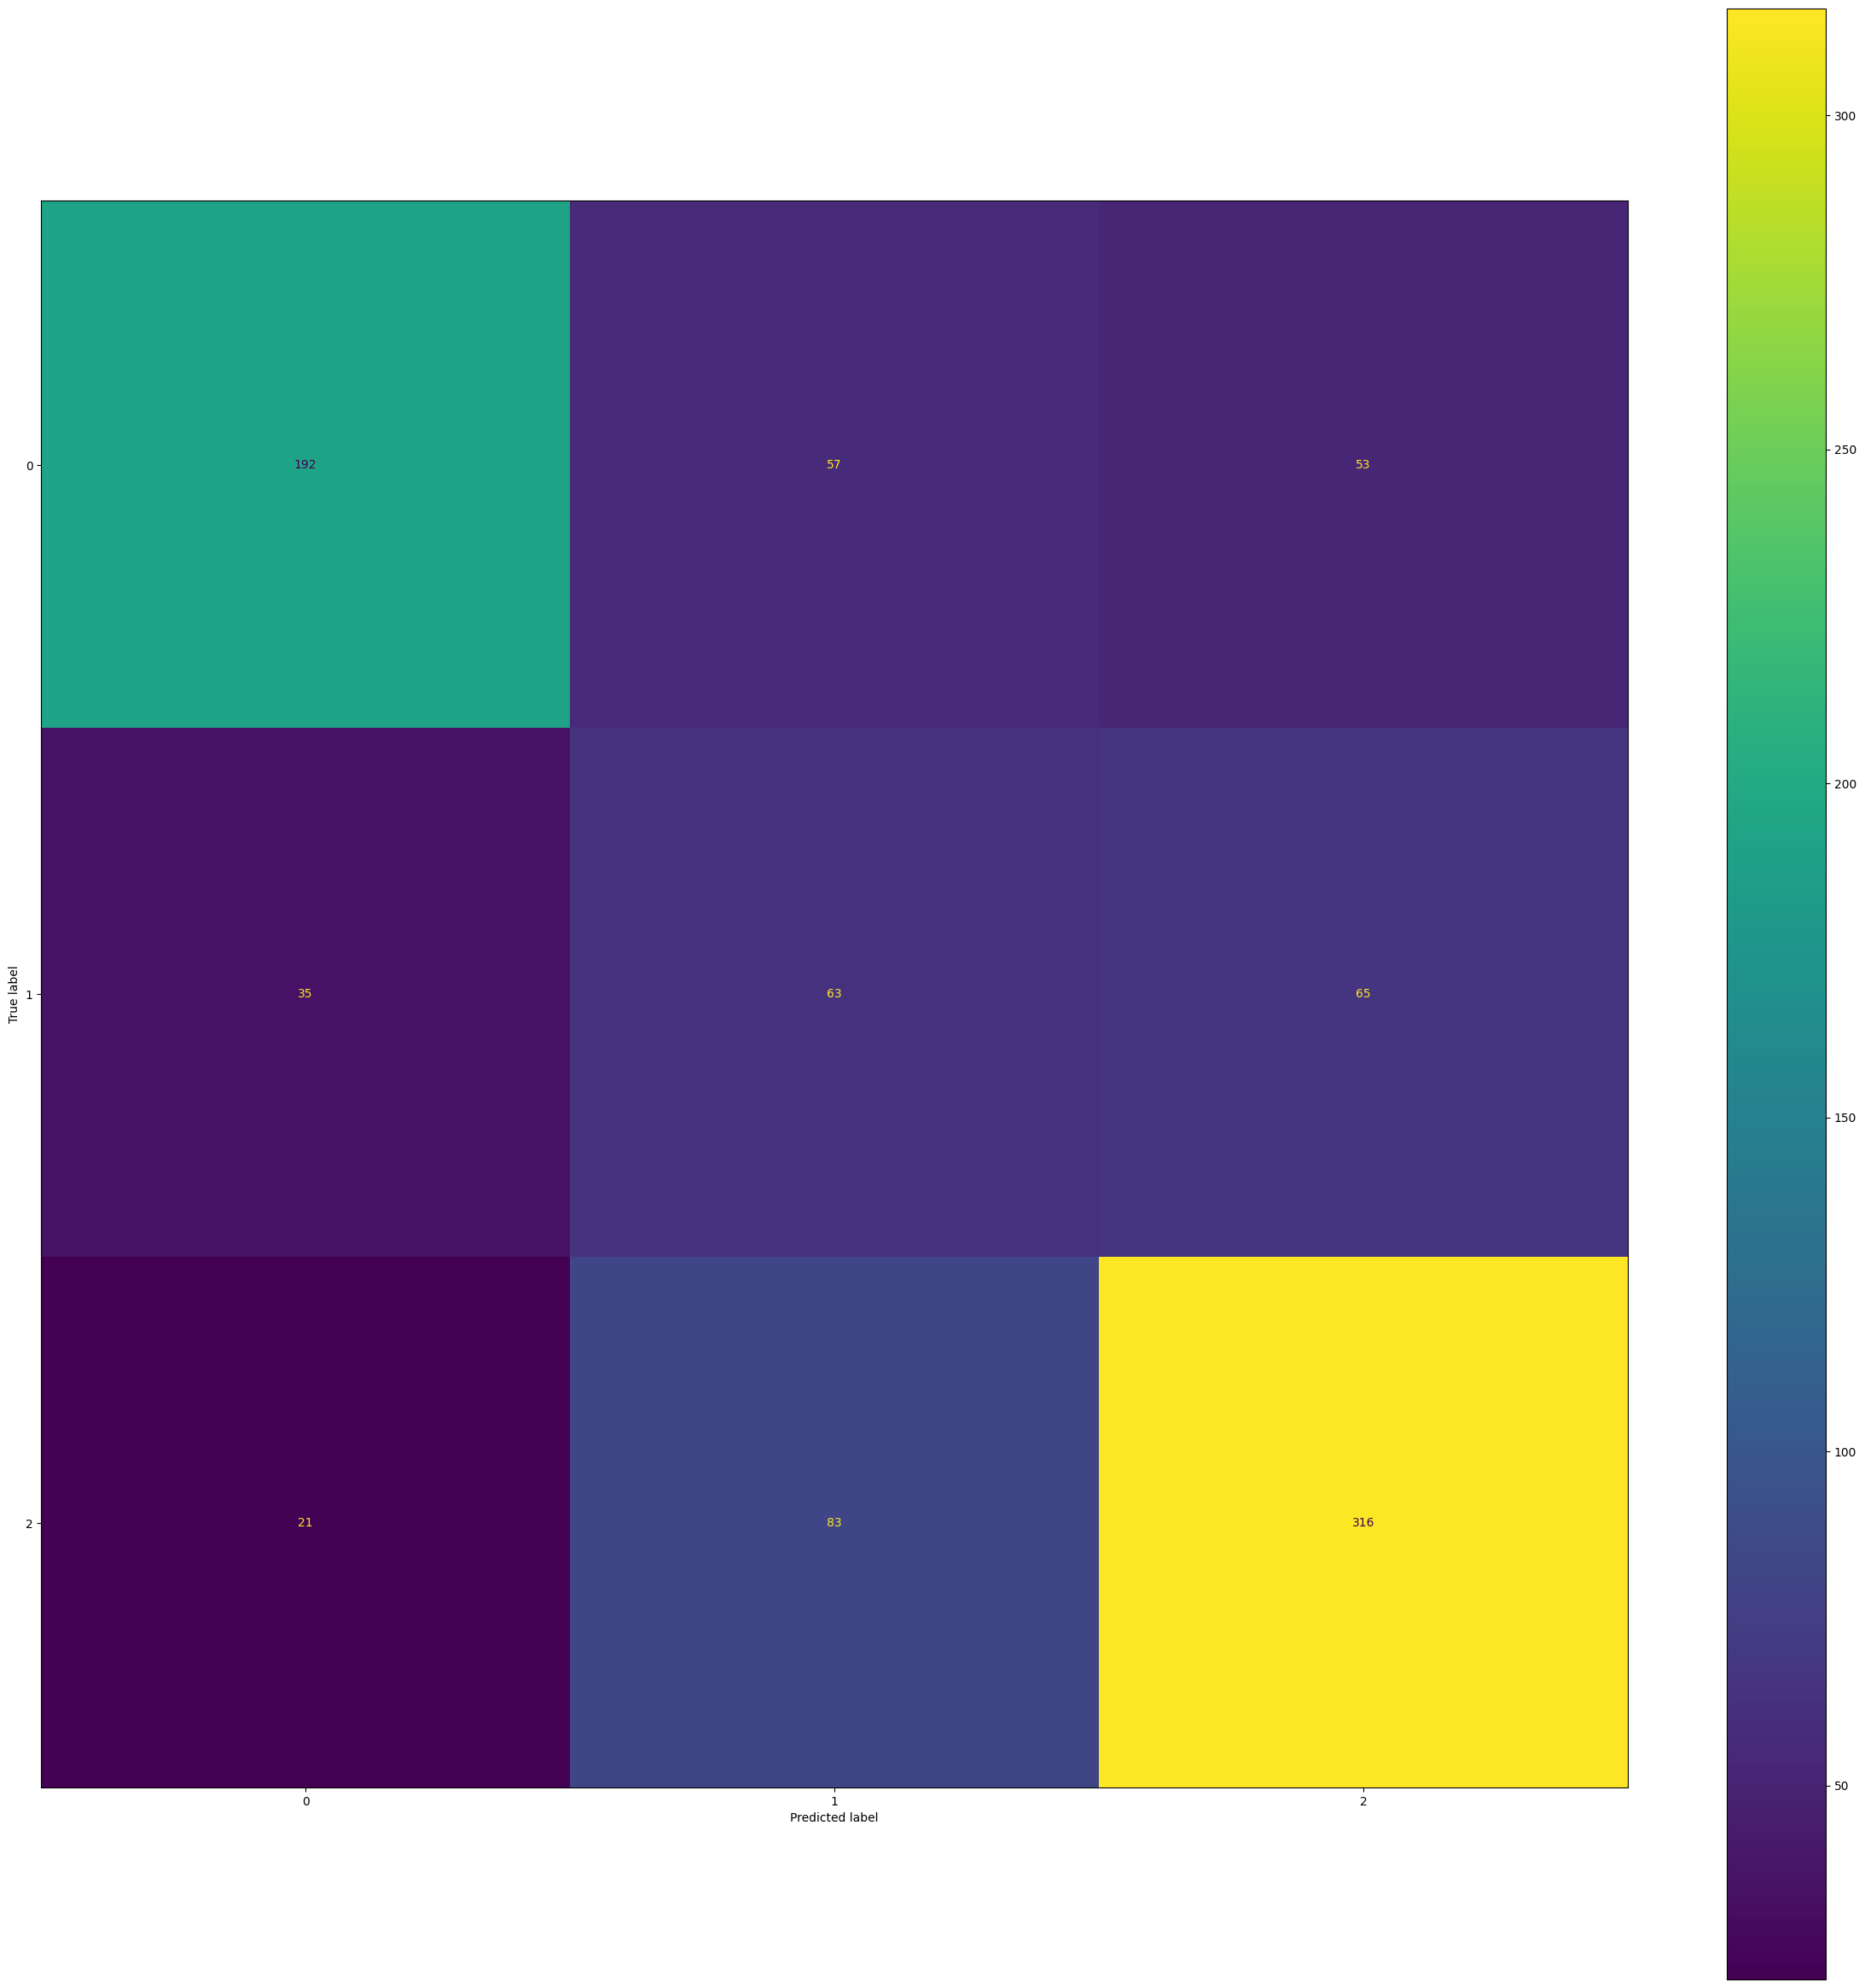

In [145]:
cm = confusion_matrix(y_test, predictionsS)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=naive_bayes_classifier.classes_)
disp.plot()
plt.show()



### Datos con balanceo Tomek



In [146]:
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_balancedTomek, y_train_balancedTomek)
predictionsT = naive_bayes_classifier.predict(X_test_scaled)

In [147]:
print('Accuracy score: ', accuracy_score(y_test, predictionsT))
print('Precision score: ', precision_score(y_test, predictionsT, average='macro'))
print('Recall score: ', recall_score(y_test, predictionsT, average='macro'))
print('F1 Score: ', f1_score(y_test, predictionsT, average='macro'))
print(classification_report(y_test, predictionsT))

Accuracy score:  0.6418079096045197
Precision score:  0.6085552297426672
Recall score:  0.5926114990207138
F1 Score:  0.5950478306552651
              precision    recall  f1-score   support

           0       0.79      0.63      0.70       302
           1       0.30      0.40      0.35       163
           2       0.73      0.74      0.74       420

    accuracy                           0.64       885
   macro avg       0.61      0.59      0.60       885
weighted avg       0.67      0.64      0.65       885



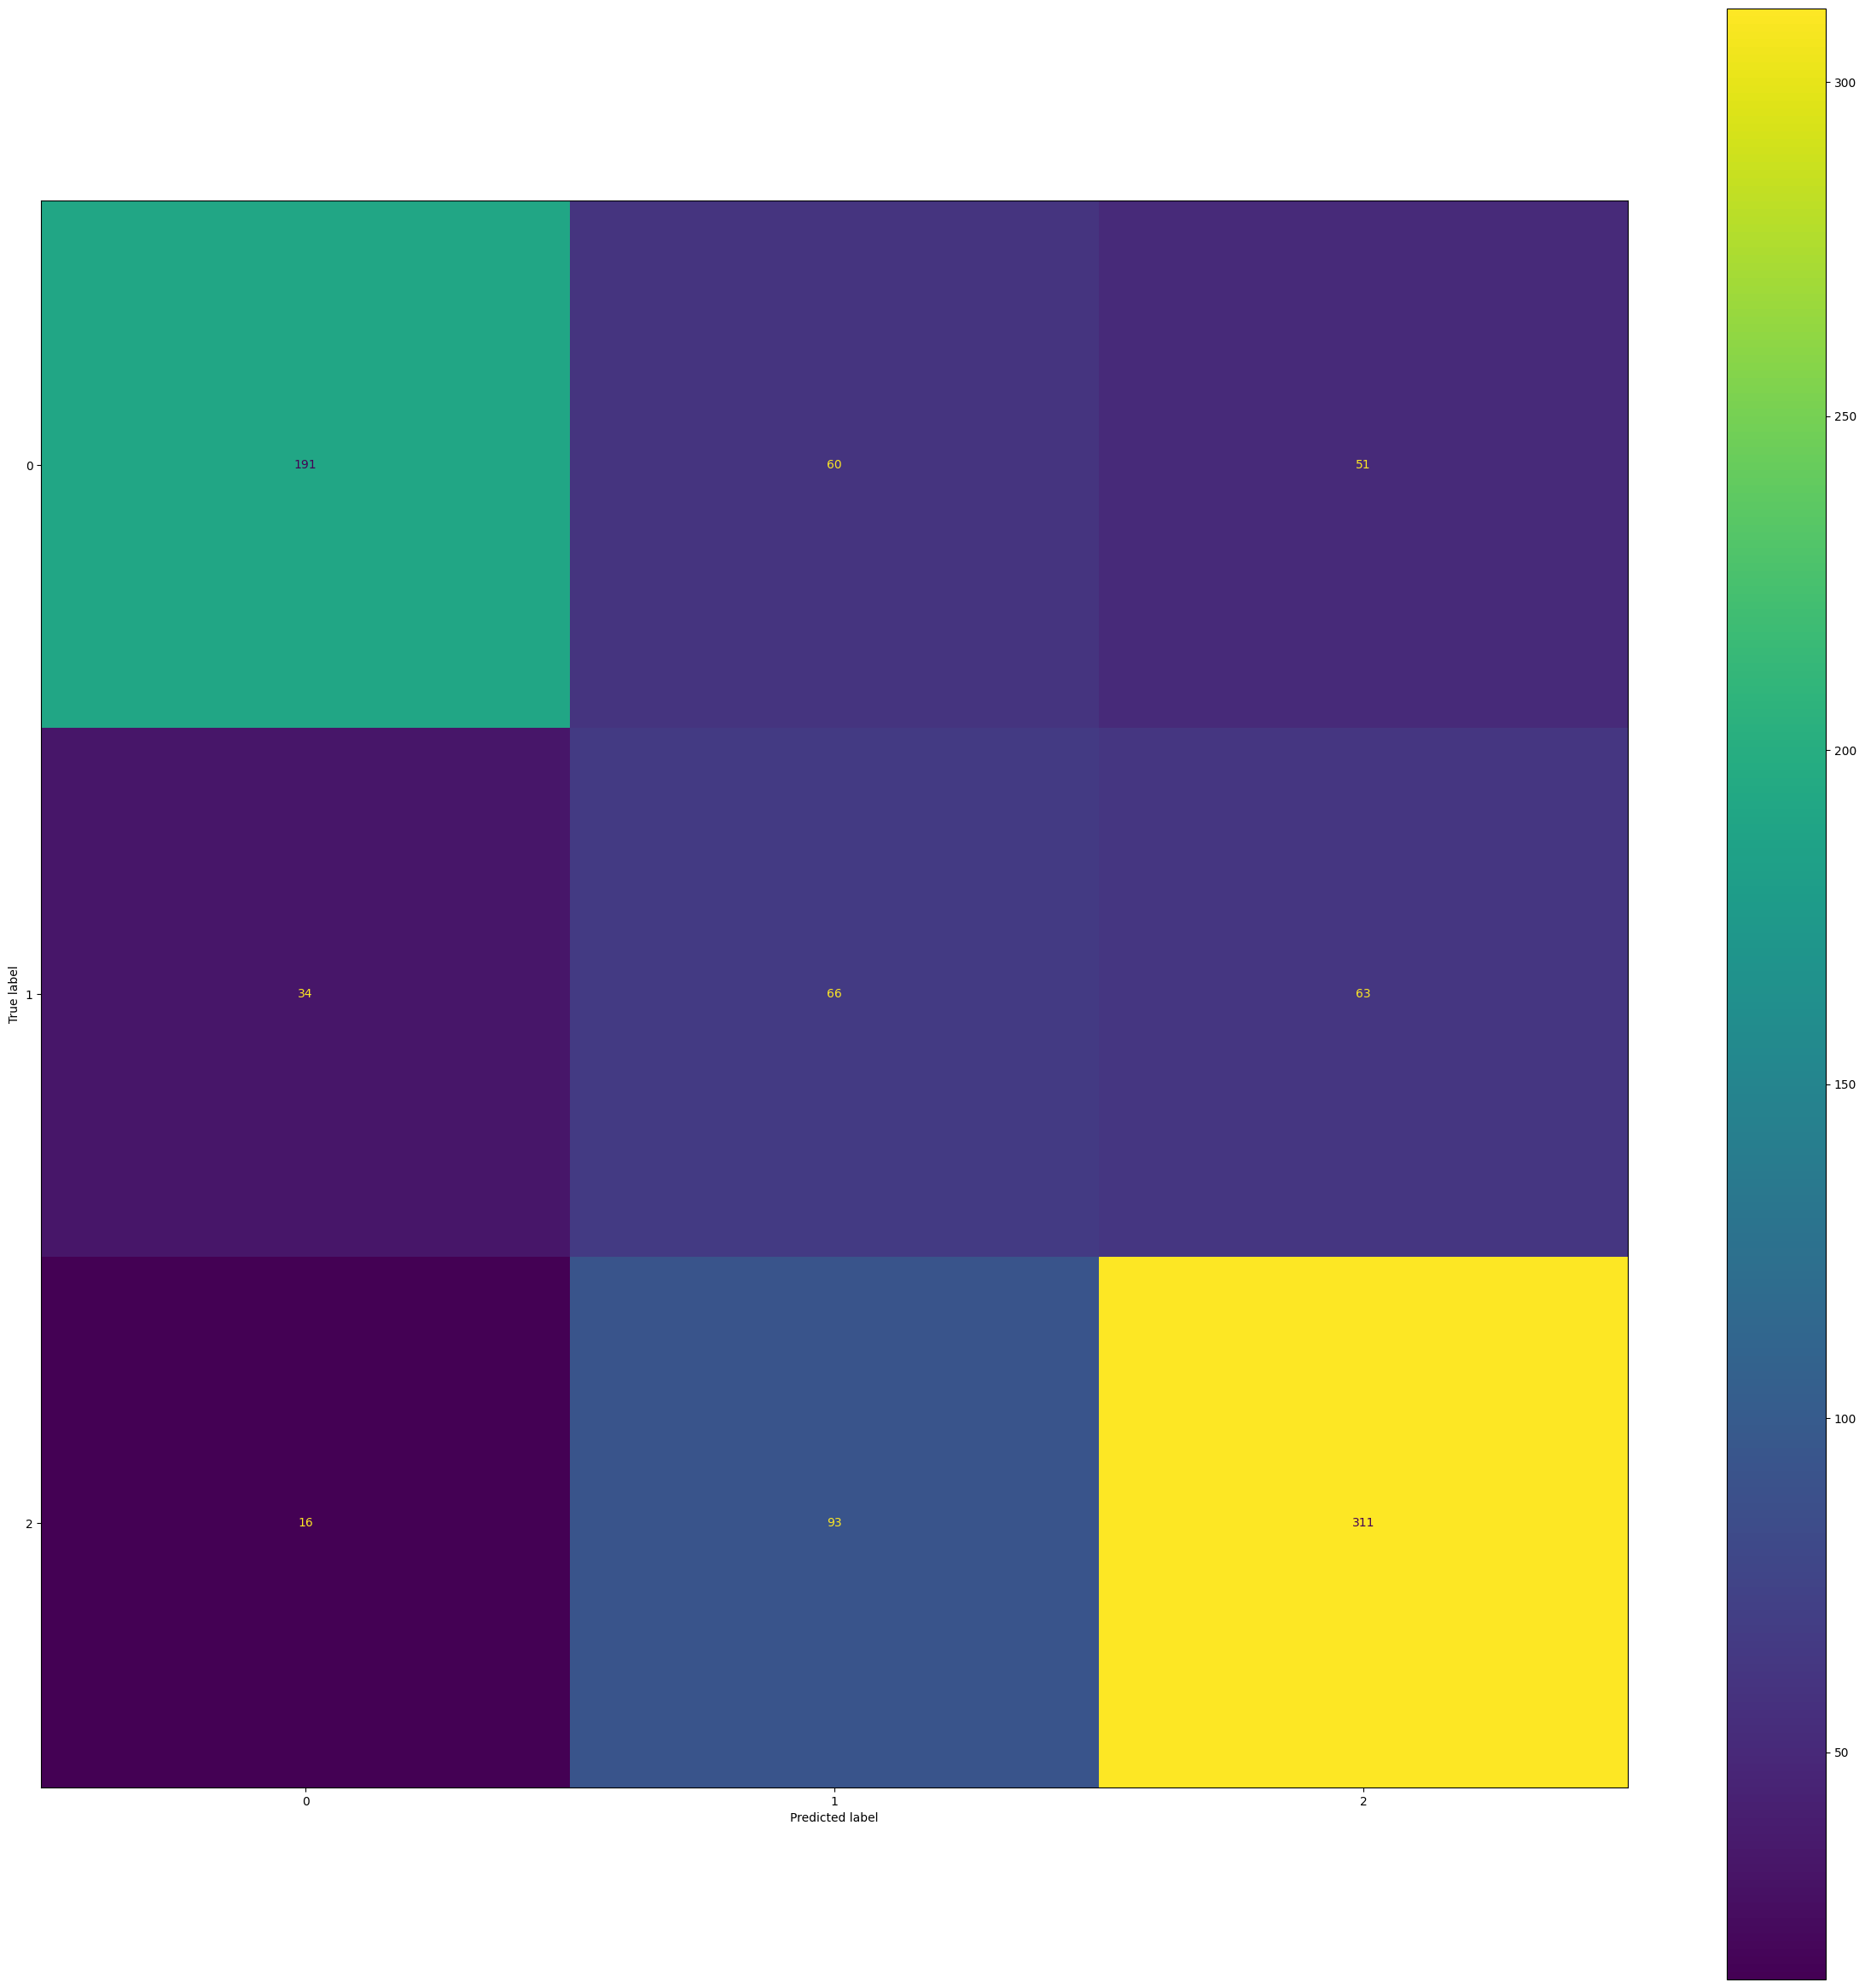

In [148]:
cm = confusion_matrix(y_test, predictionsT)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=naive_bayes_classifier.classes_)
disp.plot()
plt.show()



### Datos con balanceo Random Under Sampler



In [149]:
naive_bayes_classifier.fit(X_train_balance_Random, y_train_balance_Random)
predictionsR = naive_bayes_classifier.predict(X_test_scaled)

In [150]:
print('Accuracy score: ', accuracy_score(y_test, predictionsR))
print('Precision score: ', precision_score(y_test, predictionsR, average='macro'))
print('Recall score: ', recall_score(y_test, predictionsR, average='macro'))
print('F1 Score: ', f1_score(y_test, predictionsR, average='macro'))
print(classification_report(y_test, predictionsR))

Accuracy score:  0.6474576271186441
Precision score:  0.6108321598310157
Recall score:  0.5959595490575054
F1 Score:  0.5984452698996446
              precision    recall  f1-score   support

           0       0.79      0.63      0.70       302
           1       0.32      0.40      0.36       163
           2       0.73      0.76      0.74       420

    accuracy                           0.65       885
   macro avg       0.61      0.60      0.60       885
weighted avg       0.67      0.65      0.66       885



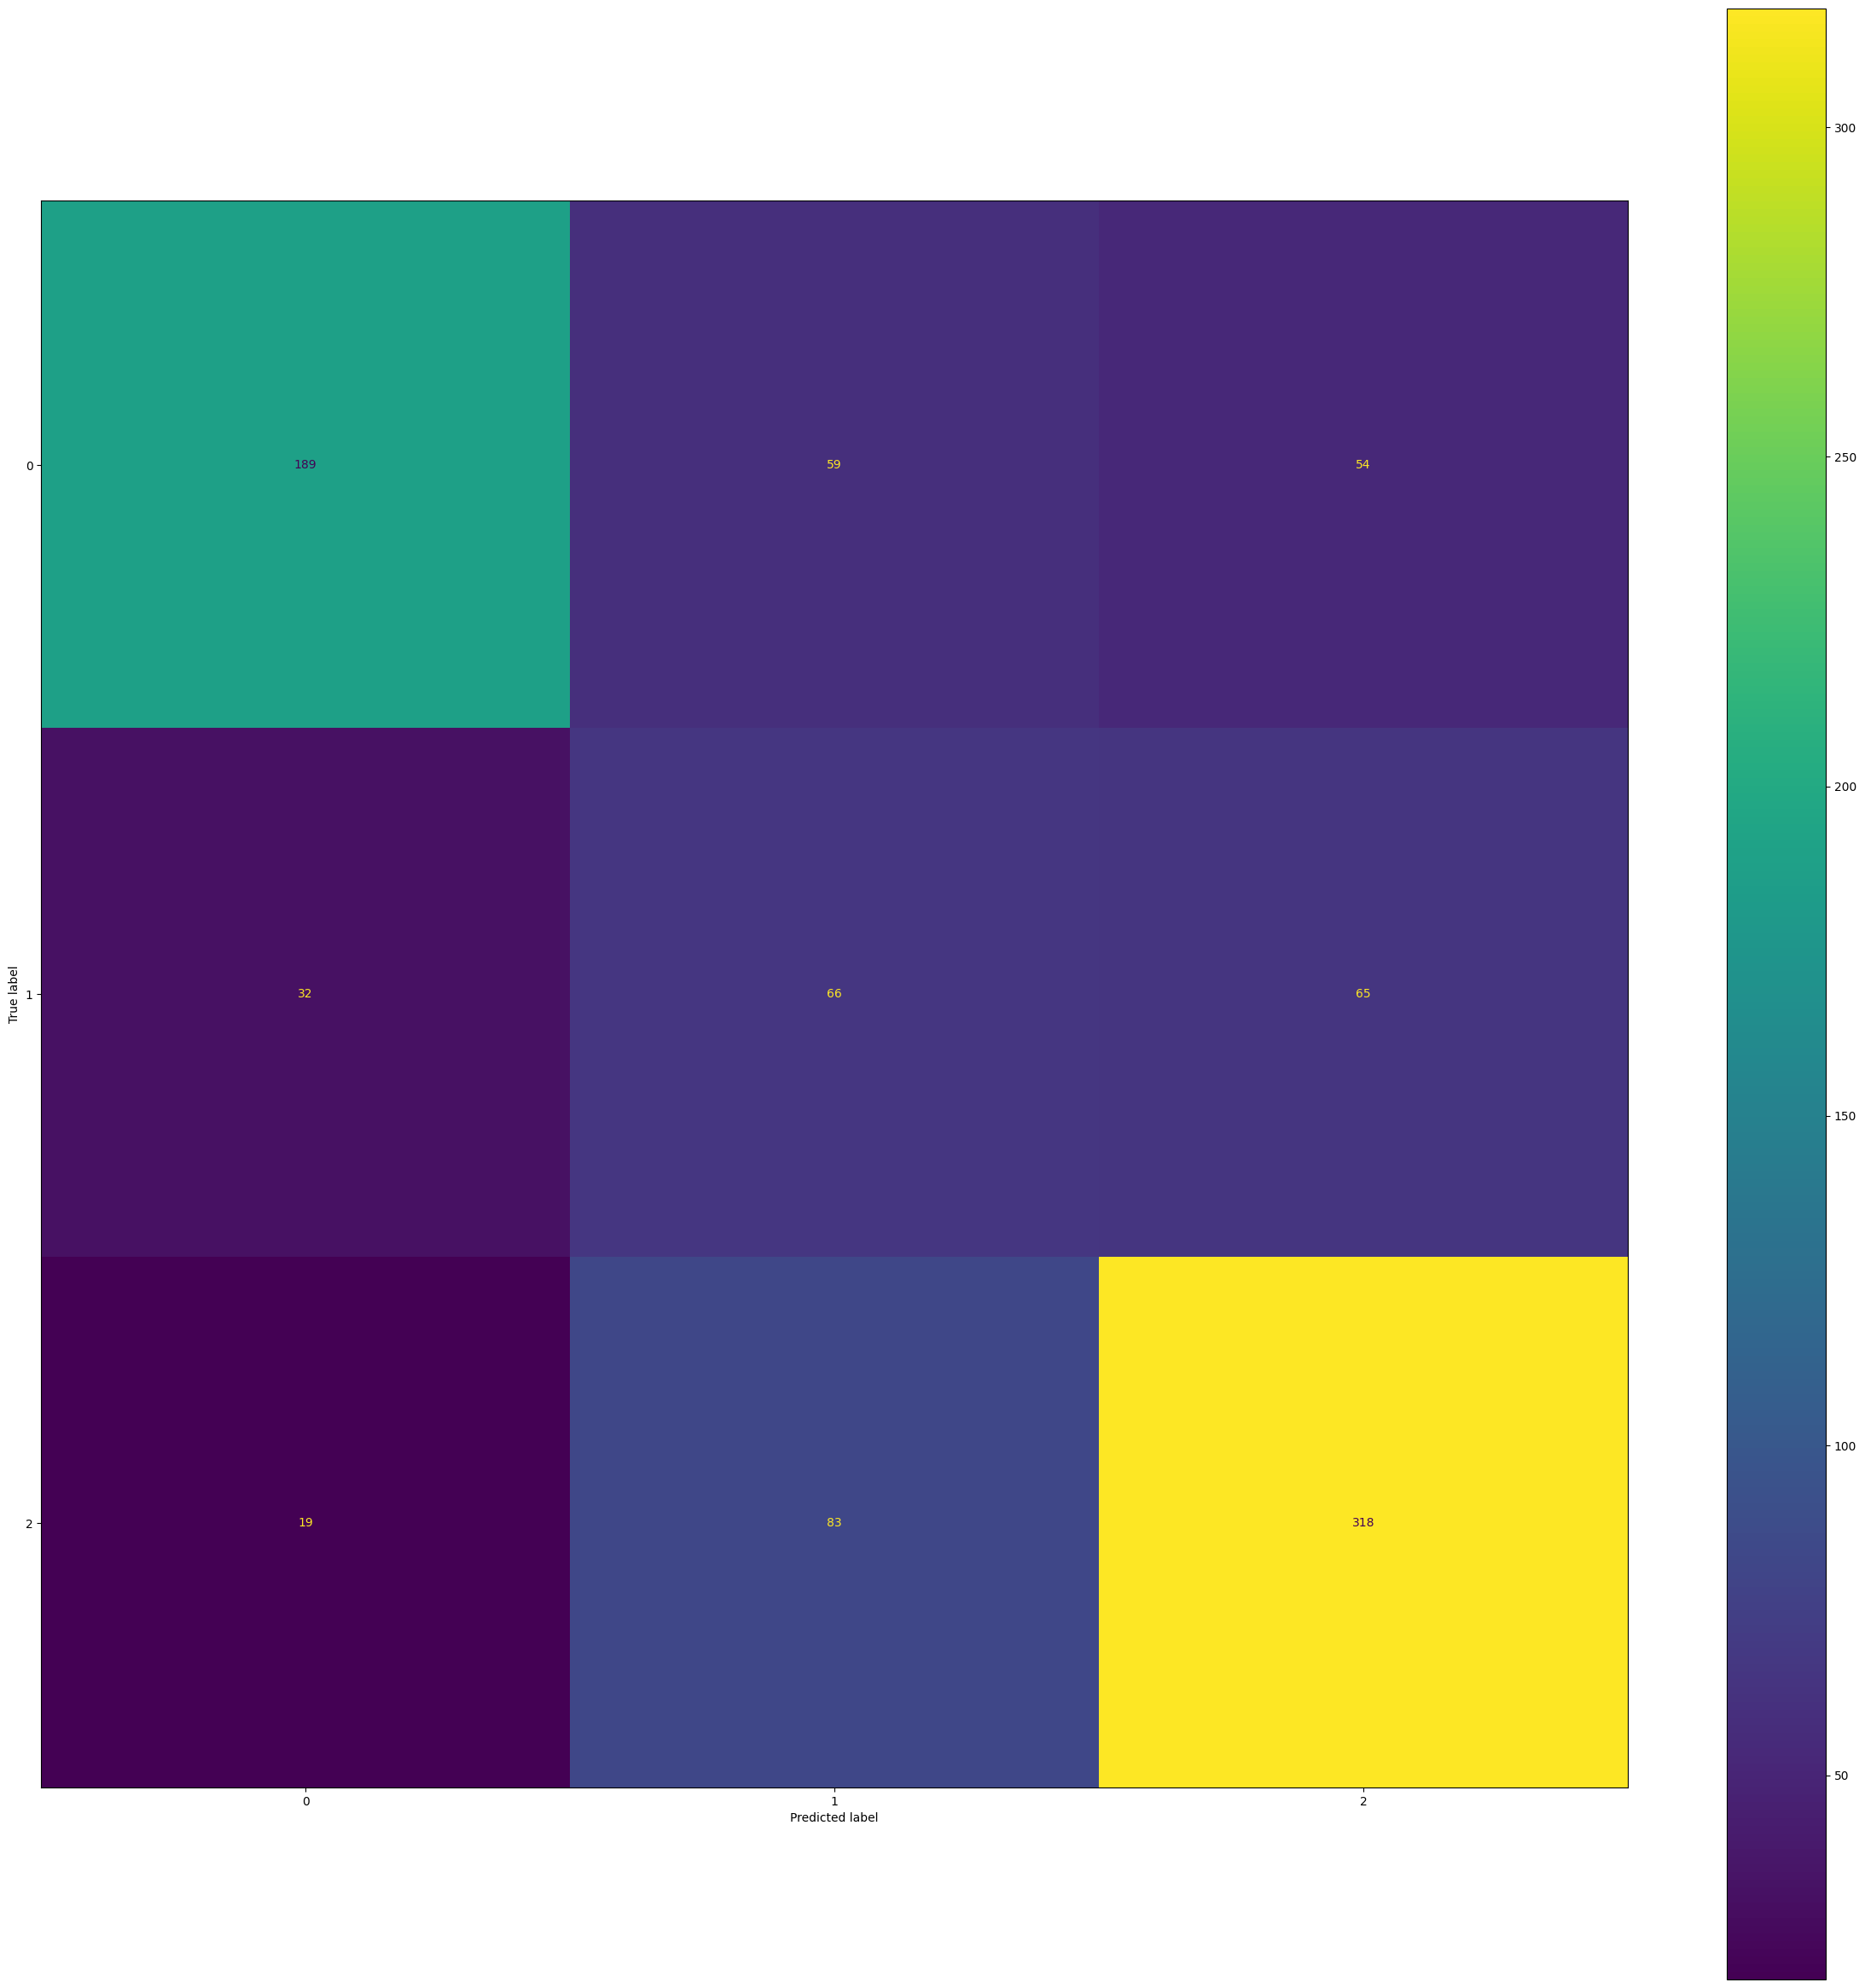

In [151]:
cm = confusion_matrix(y_test, predictionsR)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=naive_bayes_classifier.classes_)
disp.plot()
plt.show()



## Entrenamiento con Random Forest



### Datos desbalanceados

In [152]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print("Accuracy score:", accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='macro'))
print('Recall score: ', recall_score(y_test, y_pred, average='macro'))
print('F1 Score: ', f1_score(y_test, y_pred, average='macro'))

print(classification_report(y_test, y_pred))

Accuracy score: 0.7559322033898305
Precision score:  0.7054783299502555
Recall score:  0.6623510352962269
F1 Score:  0.6691549775387681
              precision    recall  f1-score   support

           0       0.82      0.75      0.78       302
           1       0.54      0.30      0.39       163
           2       0.76      0.94      0.84       420

    accuracy                           0.76       885
   macro avg       0.71      0.66      0.67       885
weighted avg       0.74      0.76      0.74       885



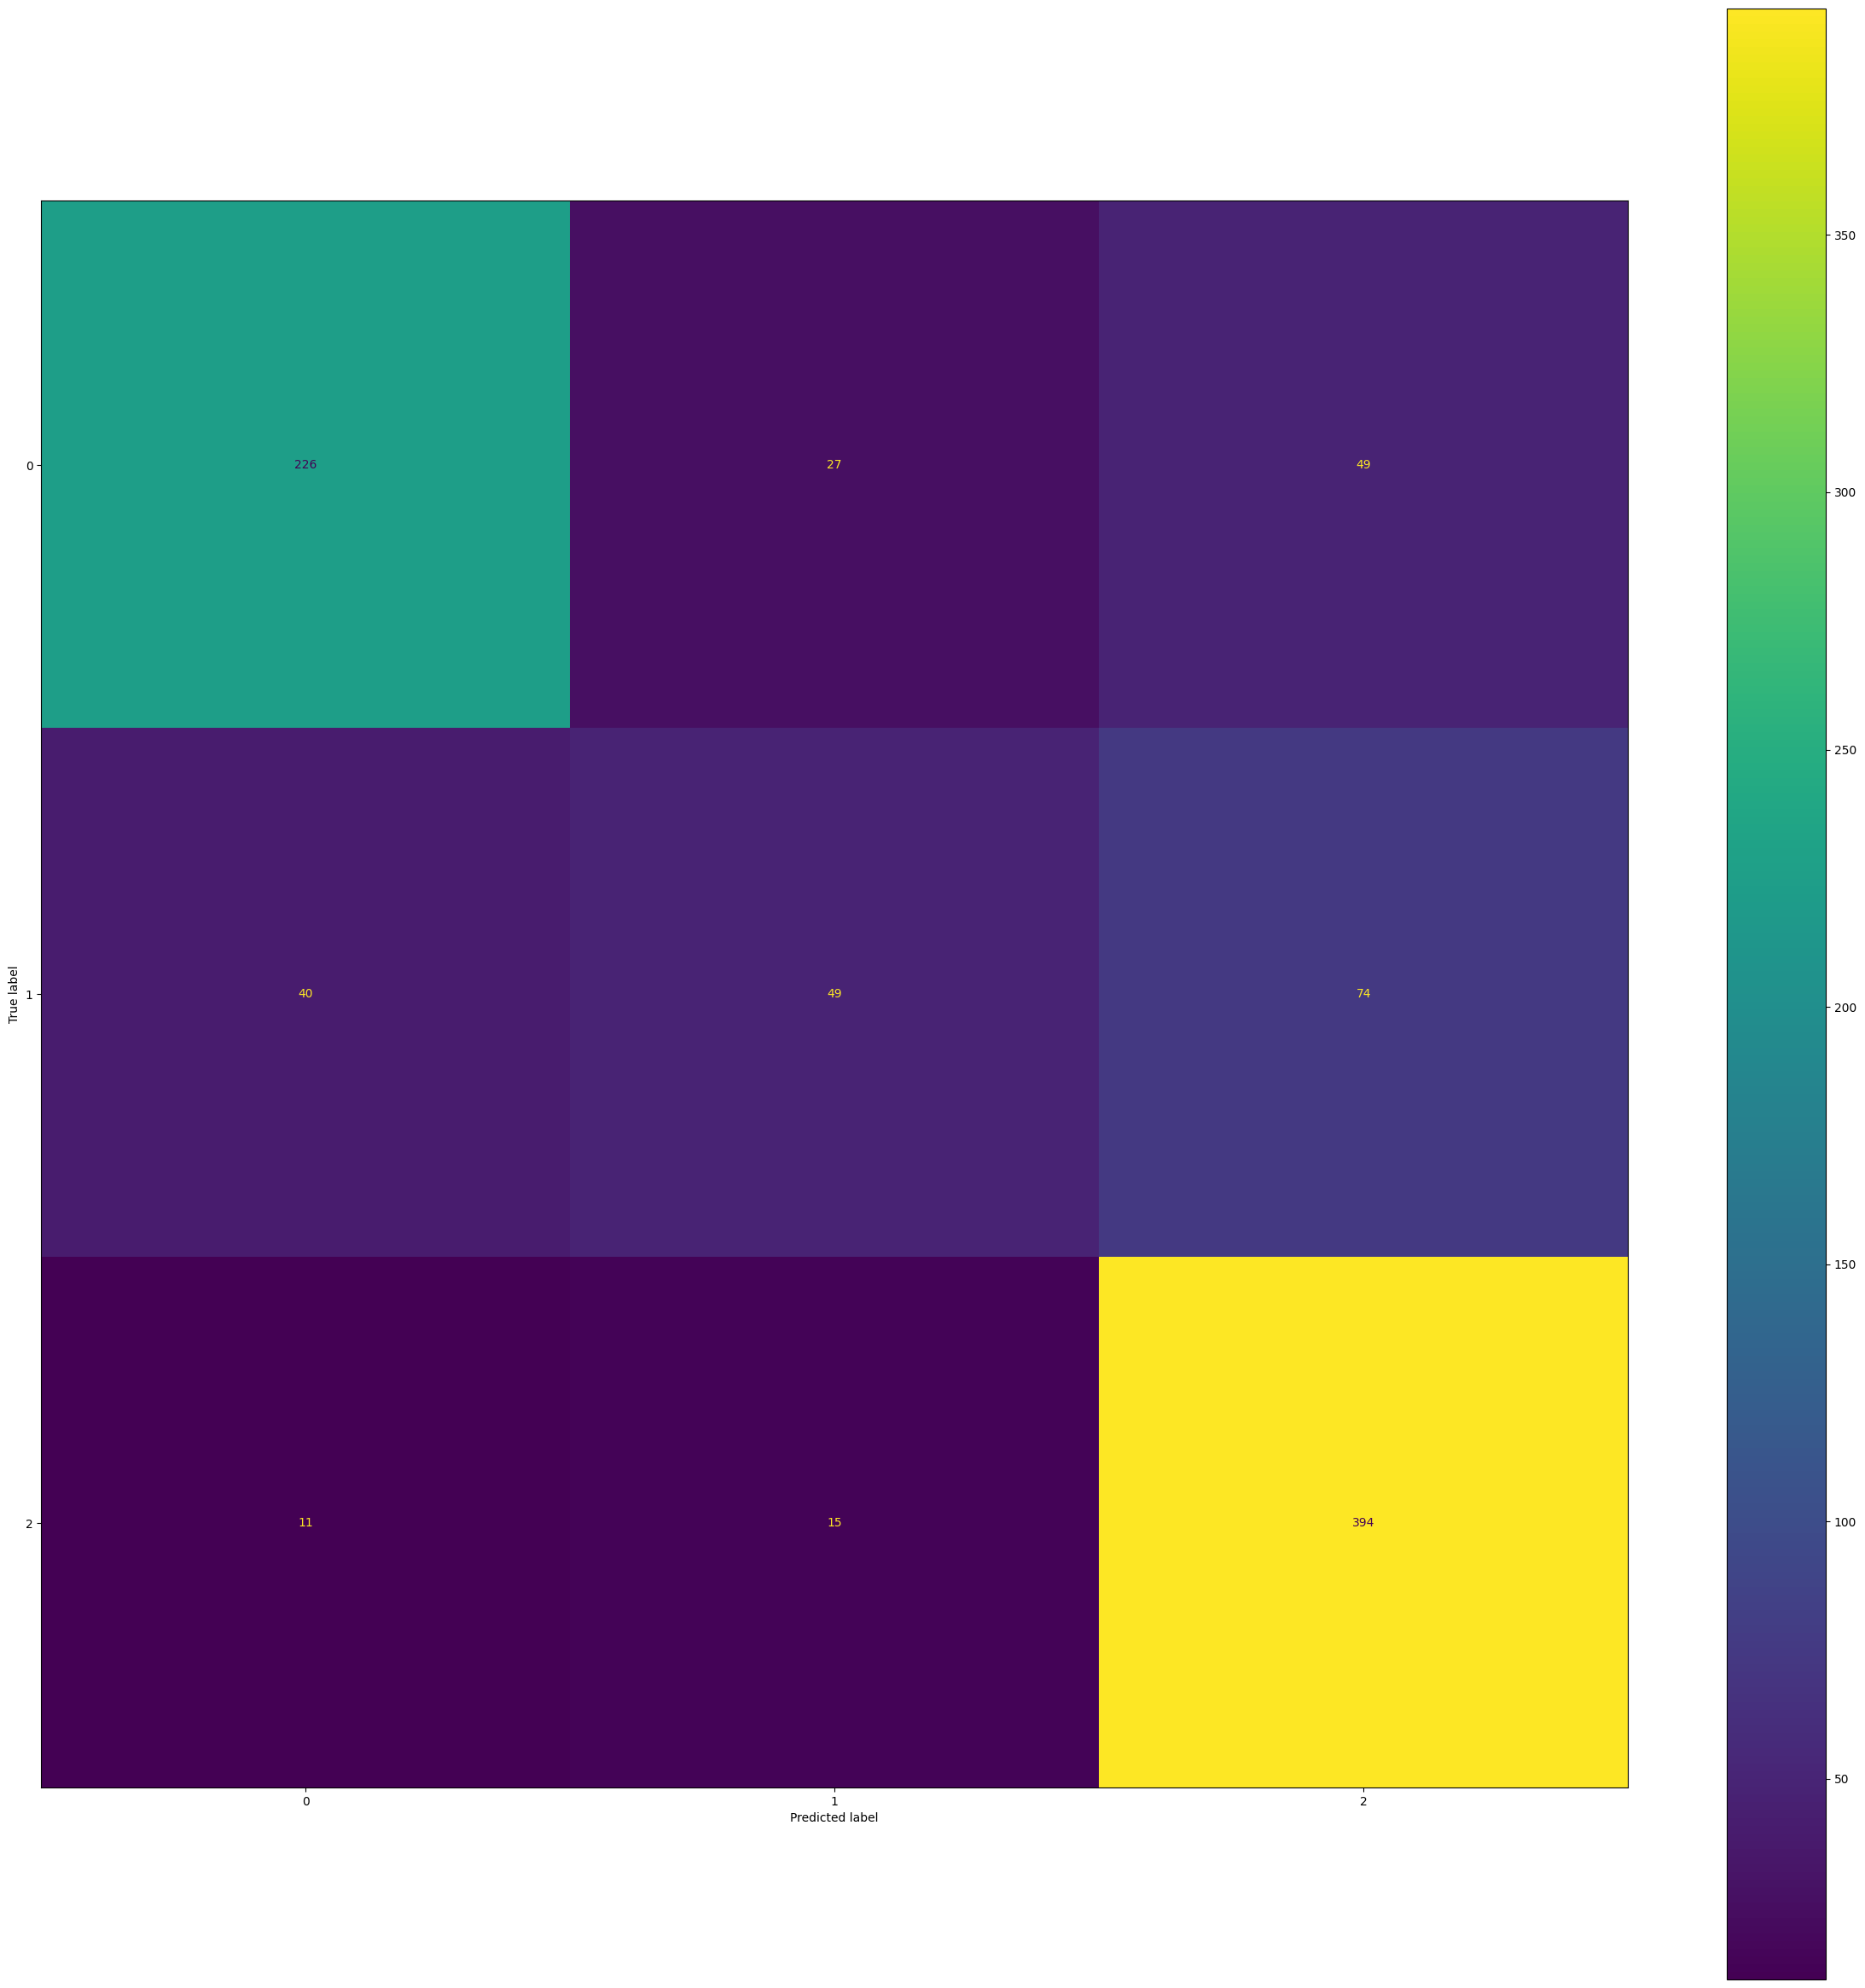

In [153]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

### Datos con balanceado Smoote

In [154]:
modelSmoote = RandomForestClassifier(random_state=42)
modelSmoote.fit(X_train_balancedSmote, y_train_balancedSmote)
y_predS = modelSmoote.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_predS))
print('Precision score: ', precision_score(y_test, y_predS, average='macro'))
print('Recall score: ', recall_score(y_test, y_predS, average='macro'))
print('F1 Score: ', f1_score(y_test, y_predS, average='macro'))

print(classification_report(y_test, y_predS))

Accuracy: 0.7638418079096045
Precision score:  0.7221808993929254
Recall score:  0.6973294535924041
F1 Score:  0.7056875226414118
              precision    recall  f1-score   support

           0       0.82      0.73      0.77       302
           1       0.56      0.45      0.50       163
           2       0.79      0.91      0.85       420

    accuracy                           0.76       885
   macro avg       0.72      0.70      0.71       885
weighted avg       0.76      0.76      0.76       885



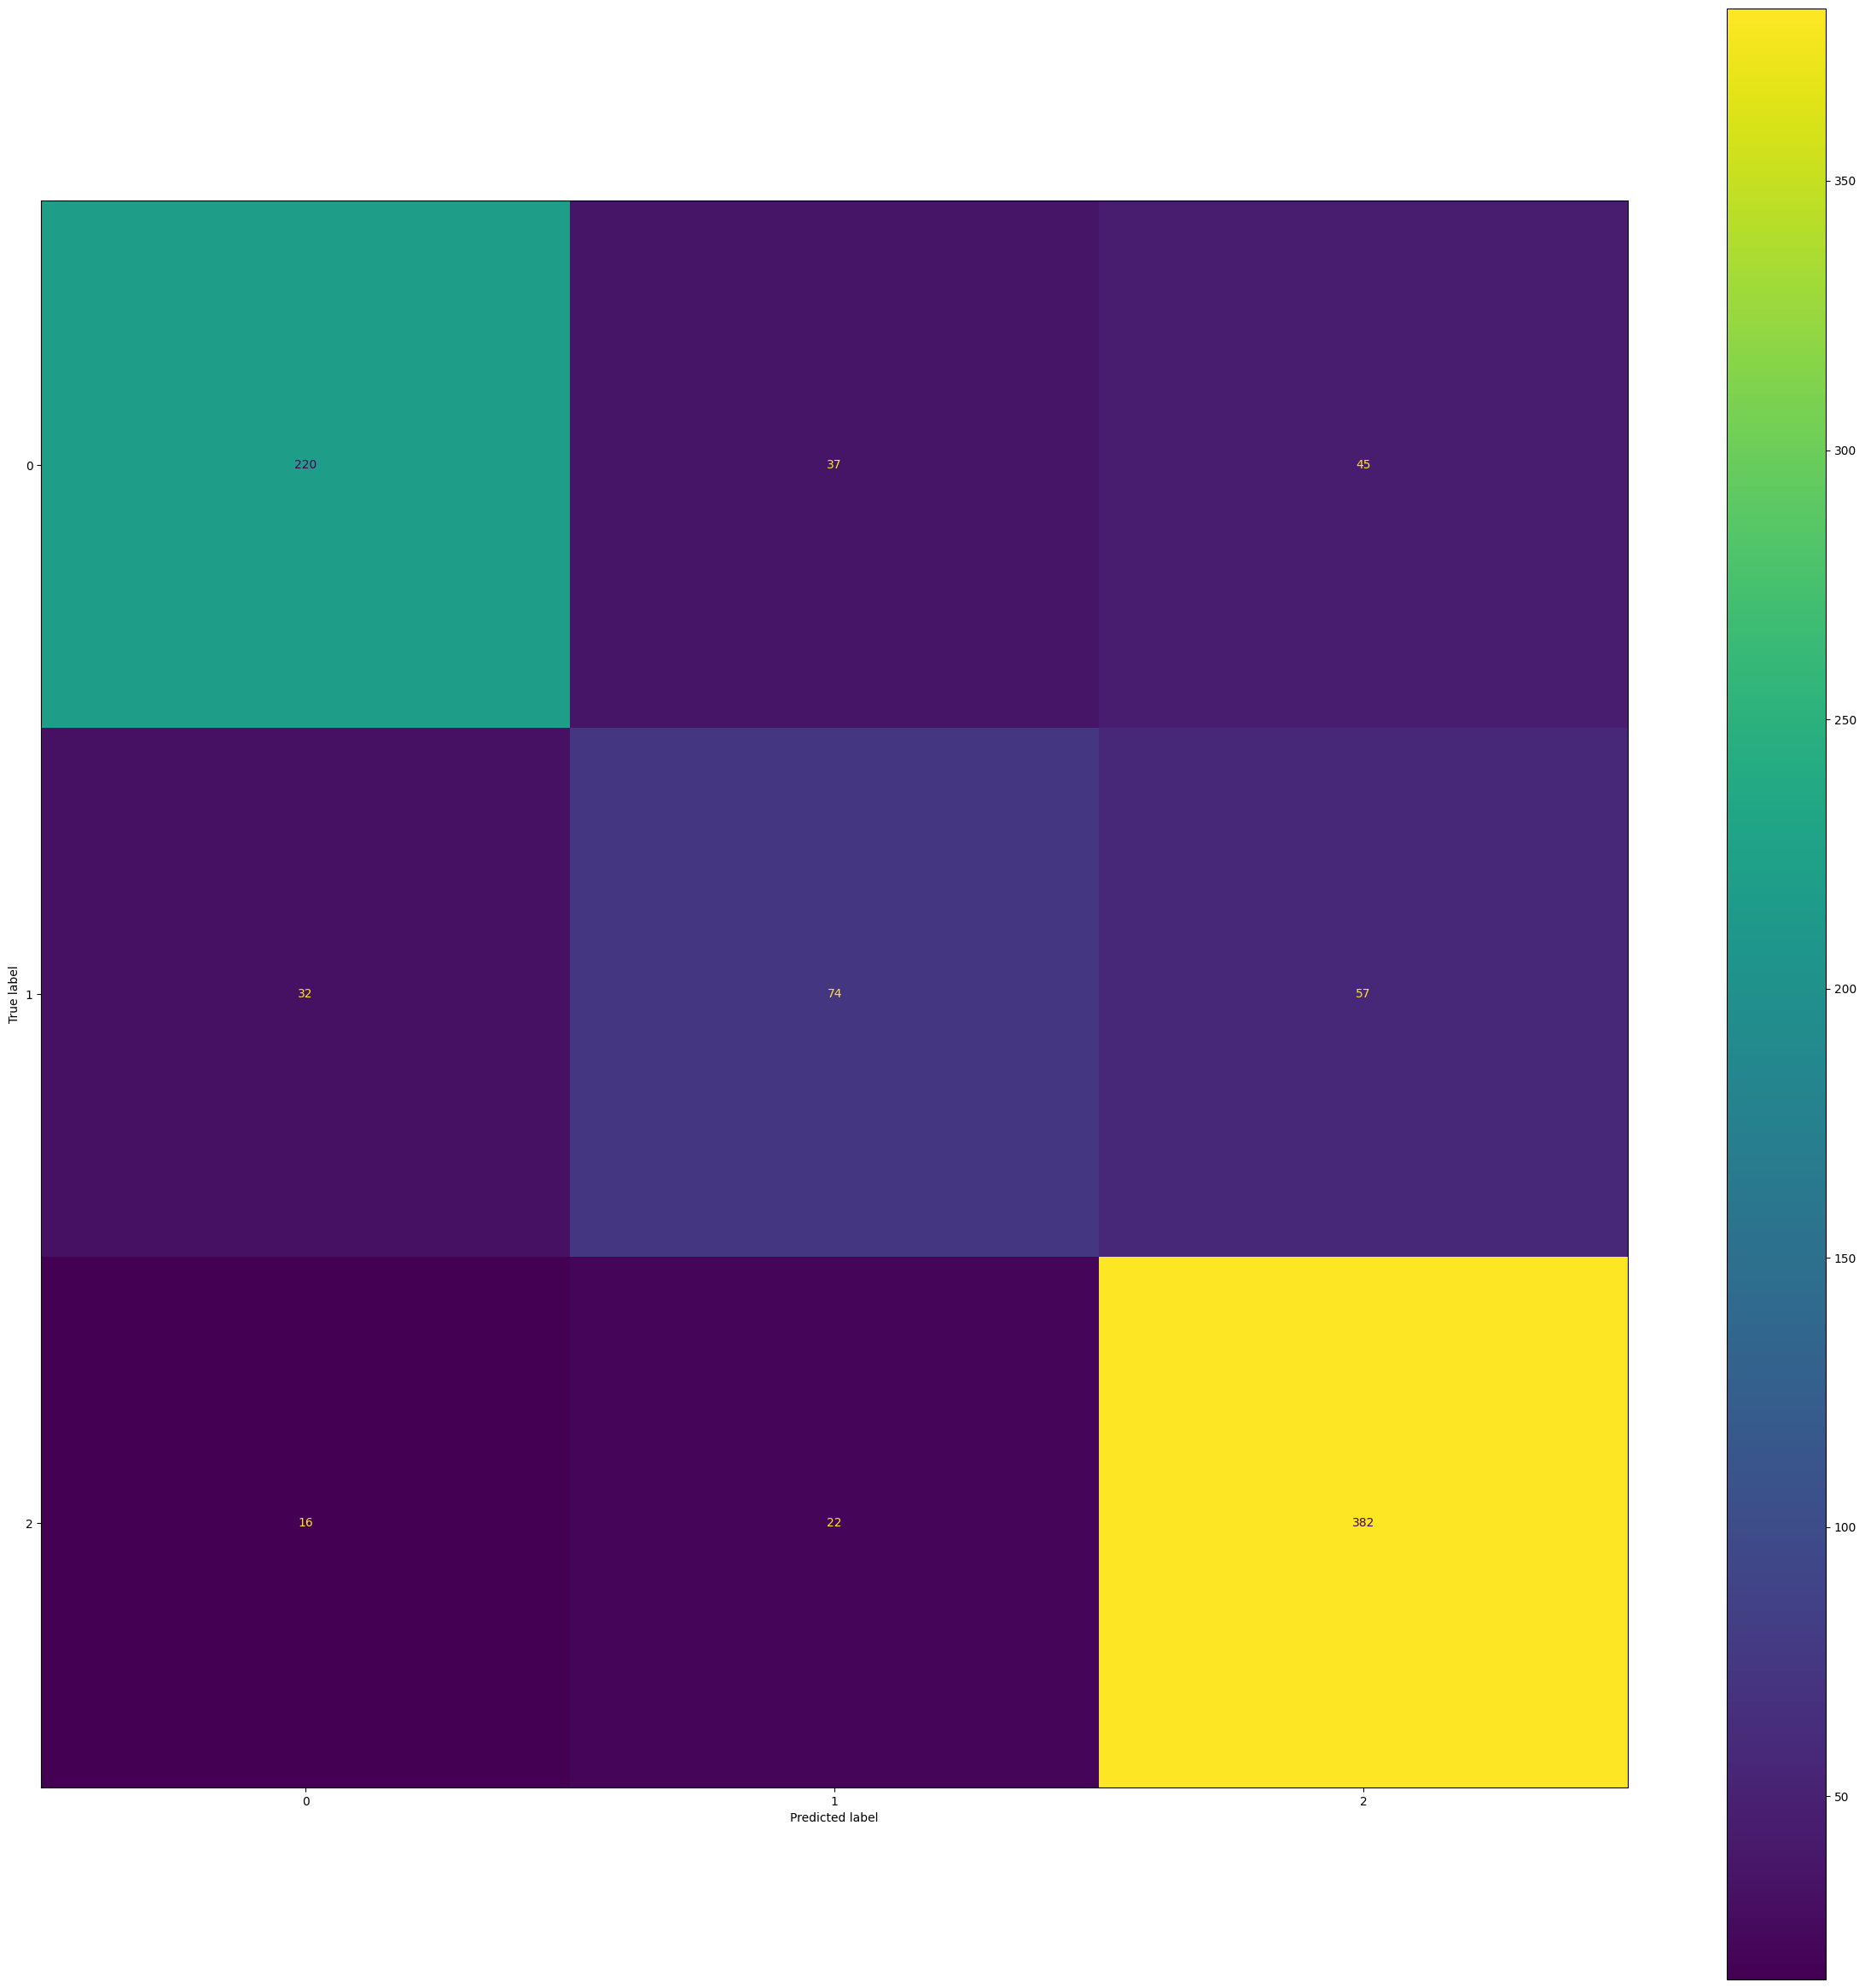

In [155]:
cm = confusion_matrix(y_test, y_predS)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelSmoote.classes_)
disp.plot()
plt.show()

### Datos con balanceado Tomek

In [156]:
modelTomek = RandomForestClassifier(random_state=42)
modelTomek.fit(X_train_balancedTomek, y_train_balancedTomek)
y_predT = modelTomek.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_predT))
print('Precision score: ', precision_score(y_test, y_predT, average='macro'))
print('Recall score: ', recall_score(y_test, y_predT, average='macro'))
print('F1 Score: ', f1_score(y_test, y_predT, average='macro'))

print(classification_report(y_test, y_predT))

Accuracy: 0.7706214689265537
Precision score:  0.7286431032970871
Recall score:  0.703021664251502
F1 Score:  0.7116007476566711
              precision    recall  f1-score   support

           0       0.84      0.74      0.79       302
           1       0.55      0.45      0.50       163
           2       0.79      0.92      0.85       420

    accuracy                           0.77       885
   macro avg       0.73      0.70      0.71       885
weighted avg       0.76      0.77      0.76       885



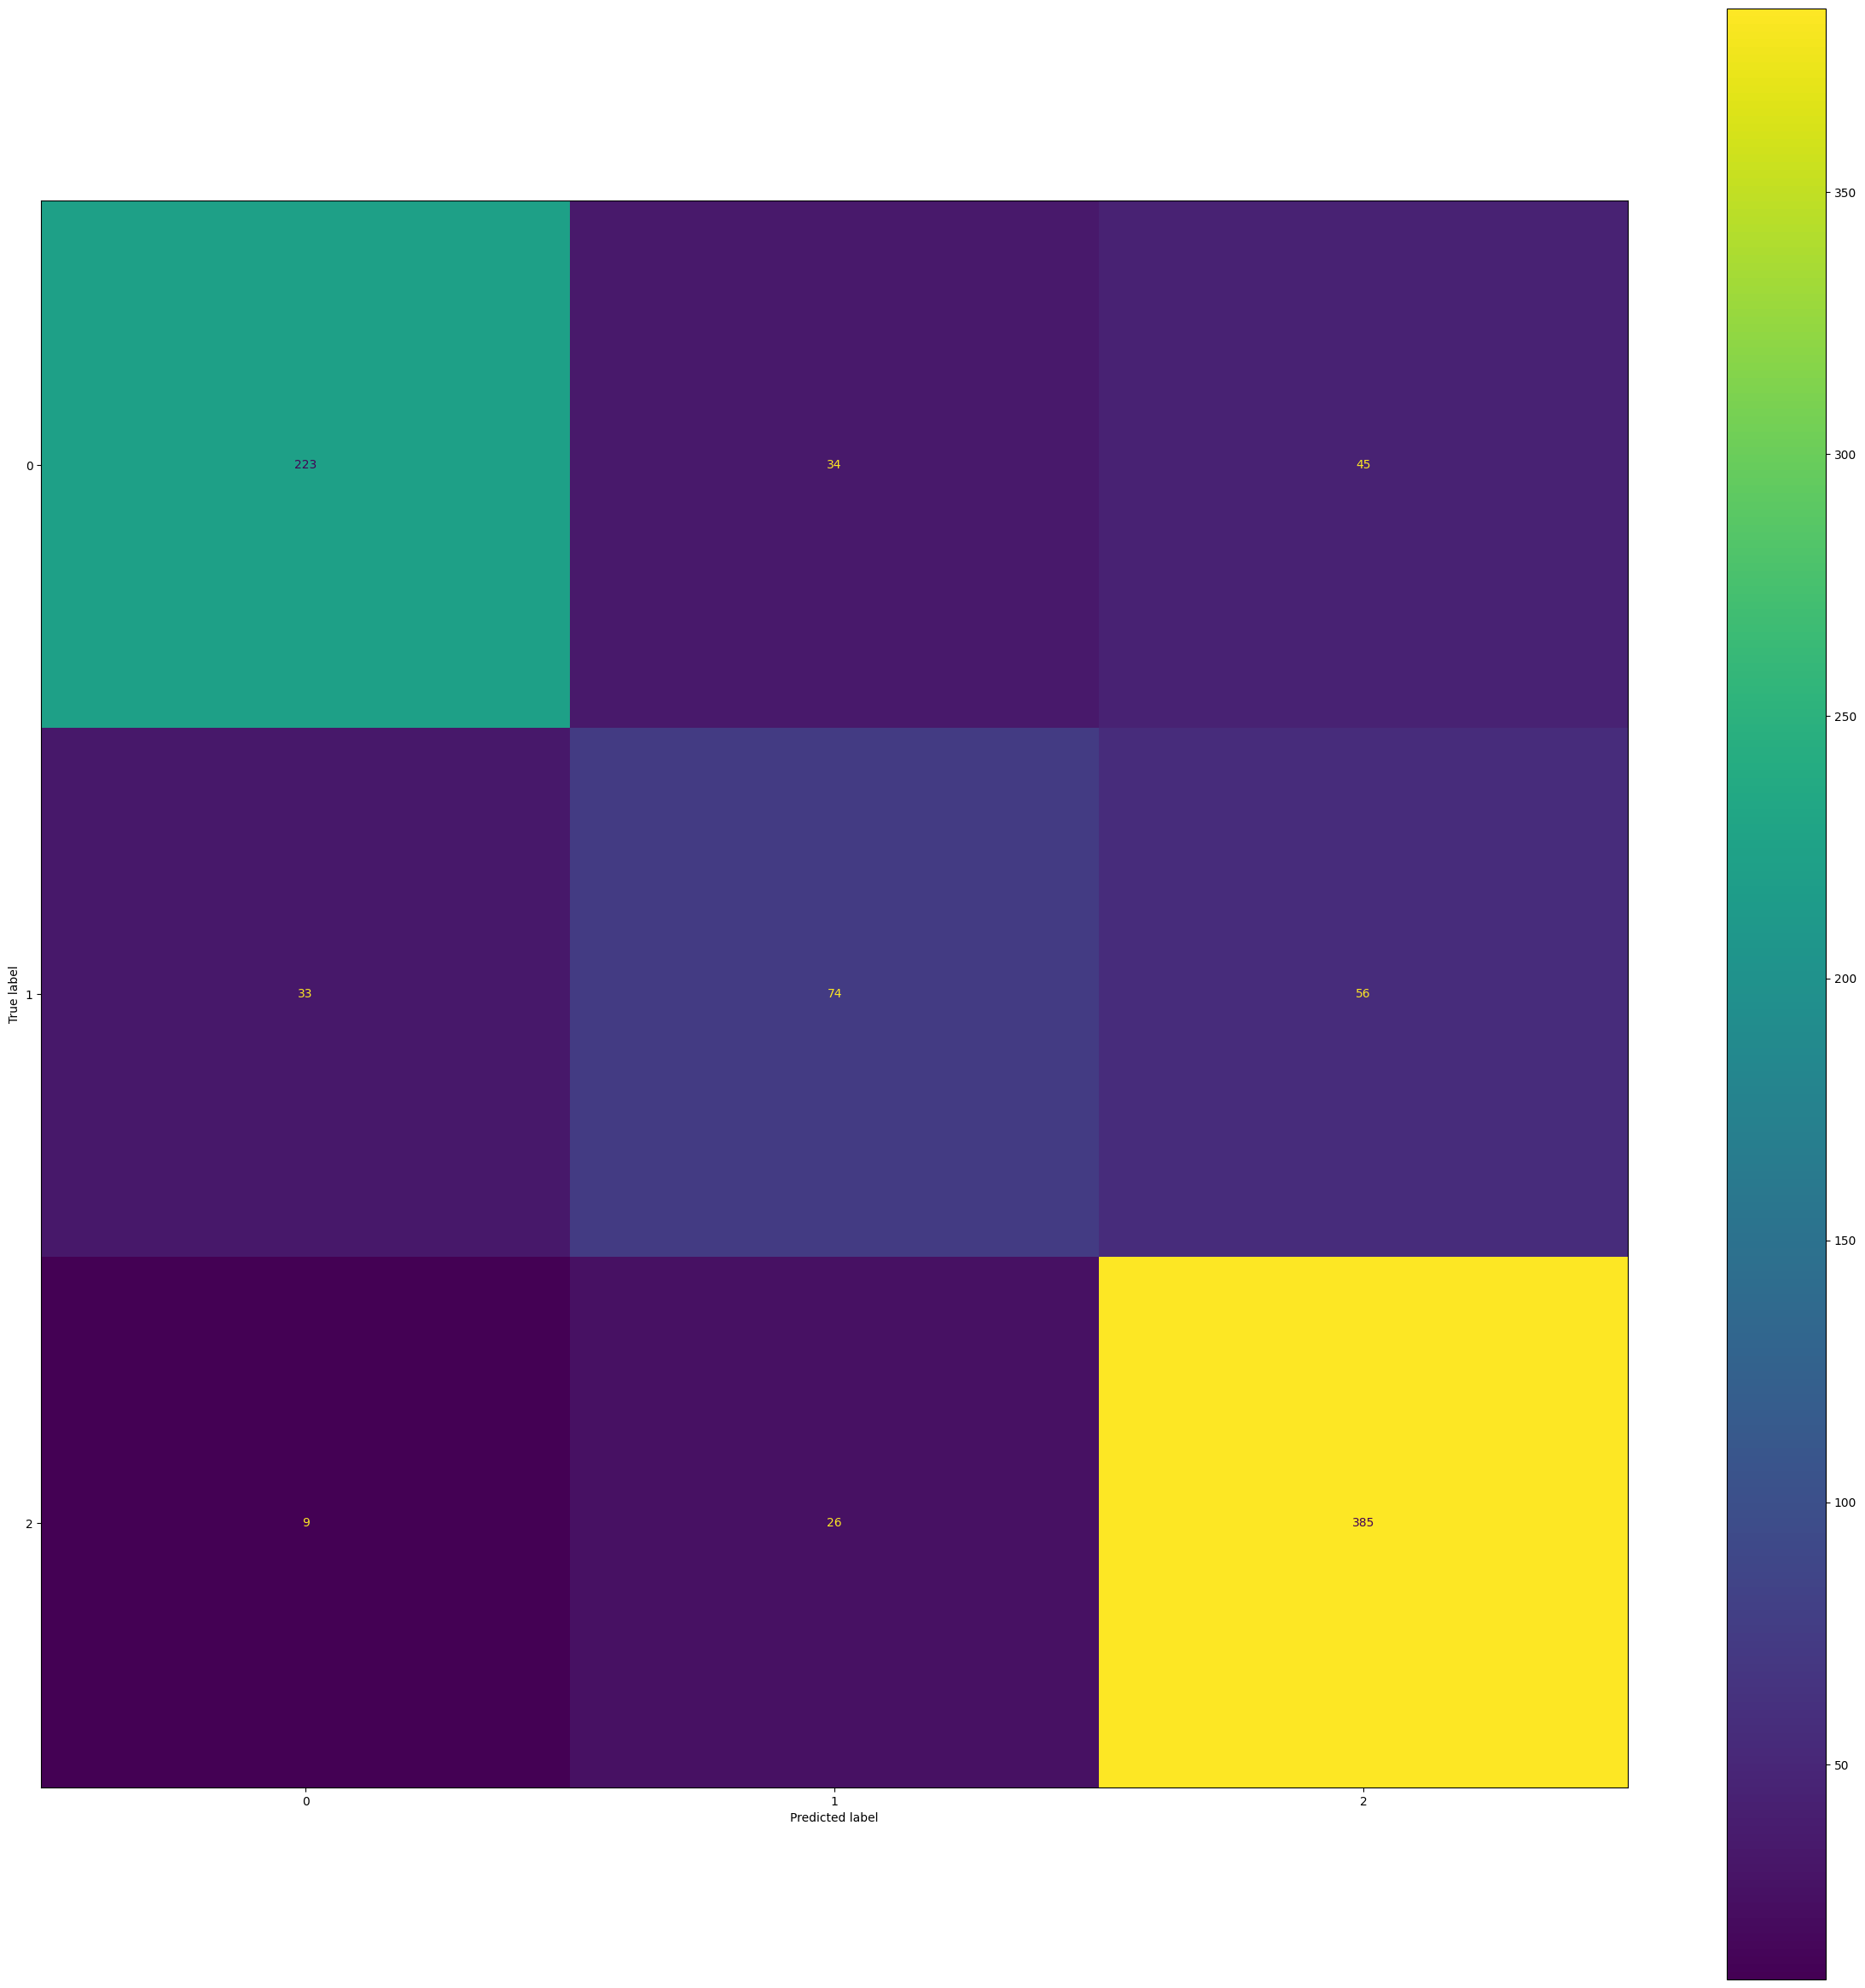

In [157]:
cm = confusion_matrix(y_test, y_predT)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelTomek.classes_)
disp.plot()
plt.show()

### Datos con balanceo Random Under Sampler

In [158]:
modelUnder = RandomForestClassifier(random_state=42)
modelUnder.fit(X_train_balance_Random, y_train_balance_Random)
y_predR = modelUnder.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_predR))
print('Precision score: ', precision_score(y_test, y_predR, average='macro'))
print('Recall score: ', recall_score(y_test, y_predR, average='macro'))
print('F1 Score: ', f1_score(y_test, y_predR, average='macro'))

print(classification_report(y_test, y_predR))

Accuracy: 0.7378531073446327
Precision score:  0.7174135604262646
Recall score:  0.7179216493542256
F1 Score:  0.705385836947305
              precision    recall  f1-score   support

           0       0.86      0.66      0.75       302
           1       0.45      0.67      0.54       163
           2       0.84      0.82      0.83       420

    accuracy                           0.74       885
   macro avg       0.72      0.72      0.71       885
weighted avg       0.78      0.74      0.75       885



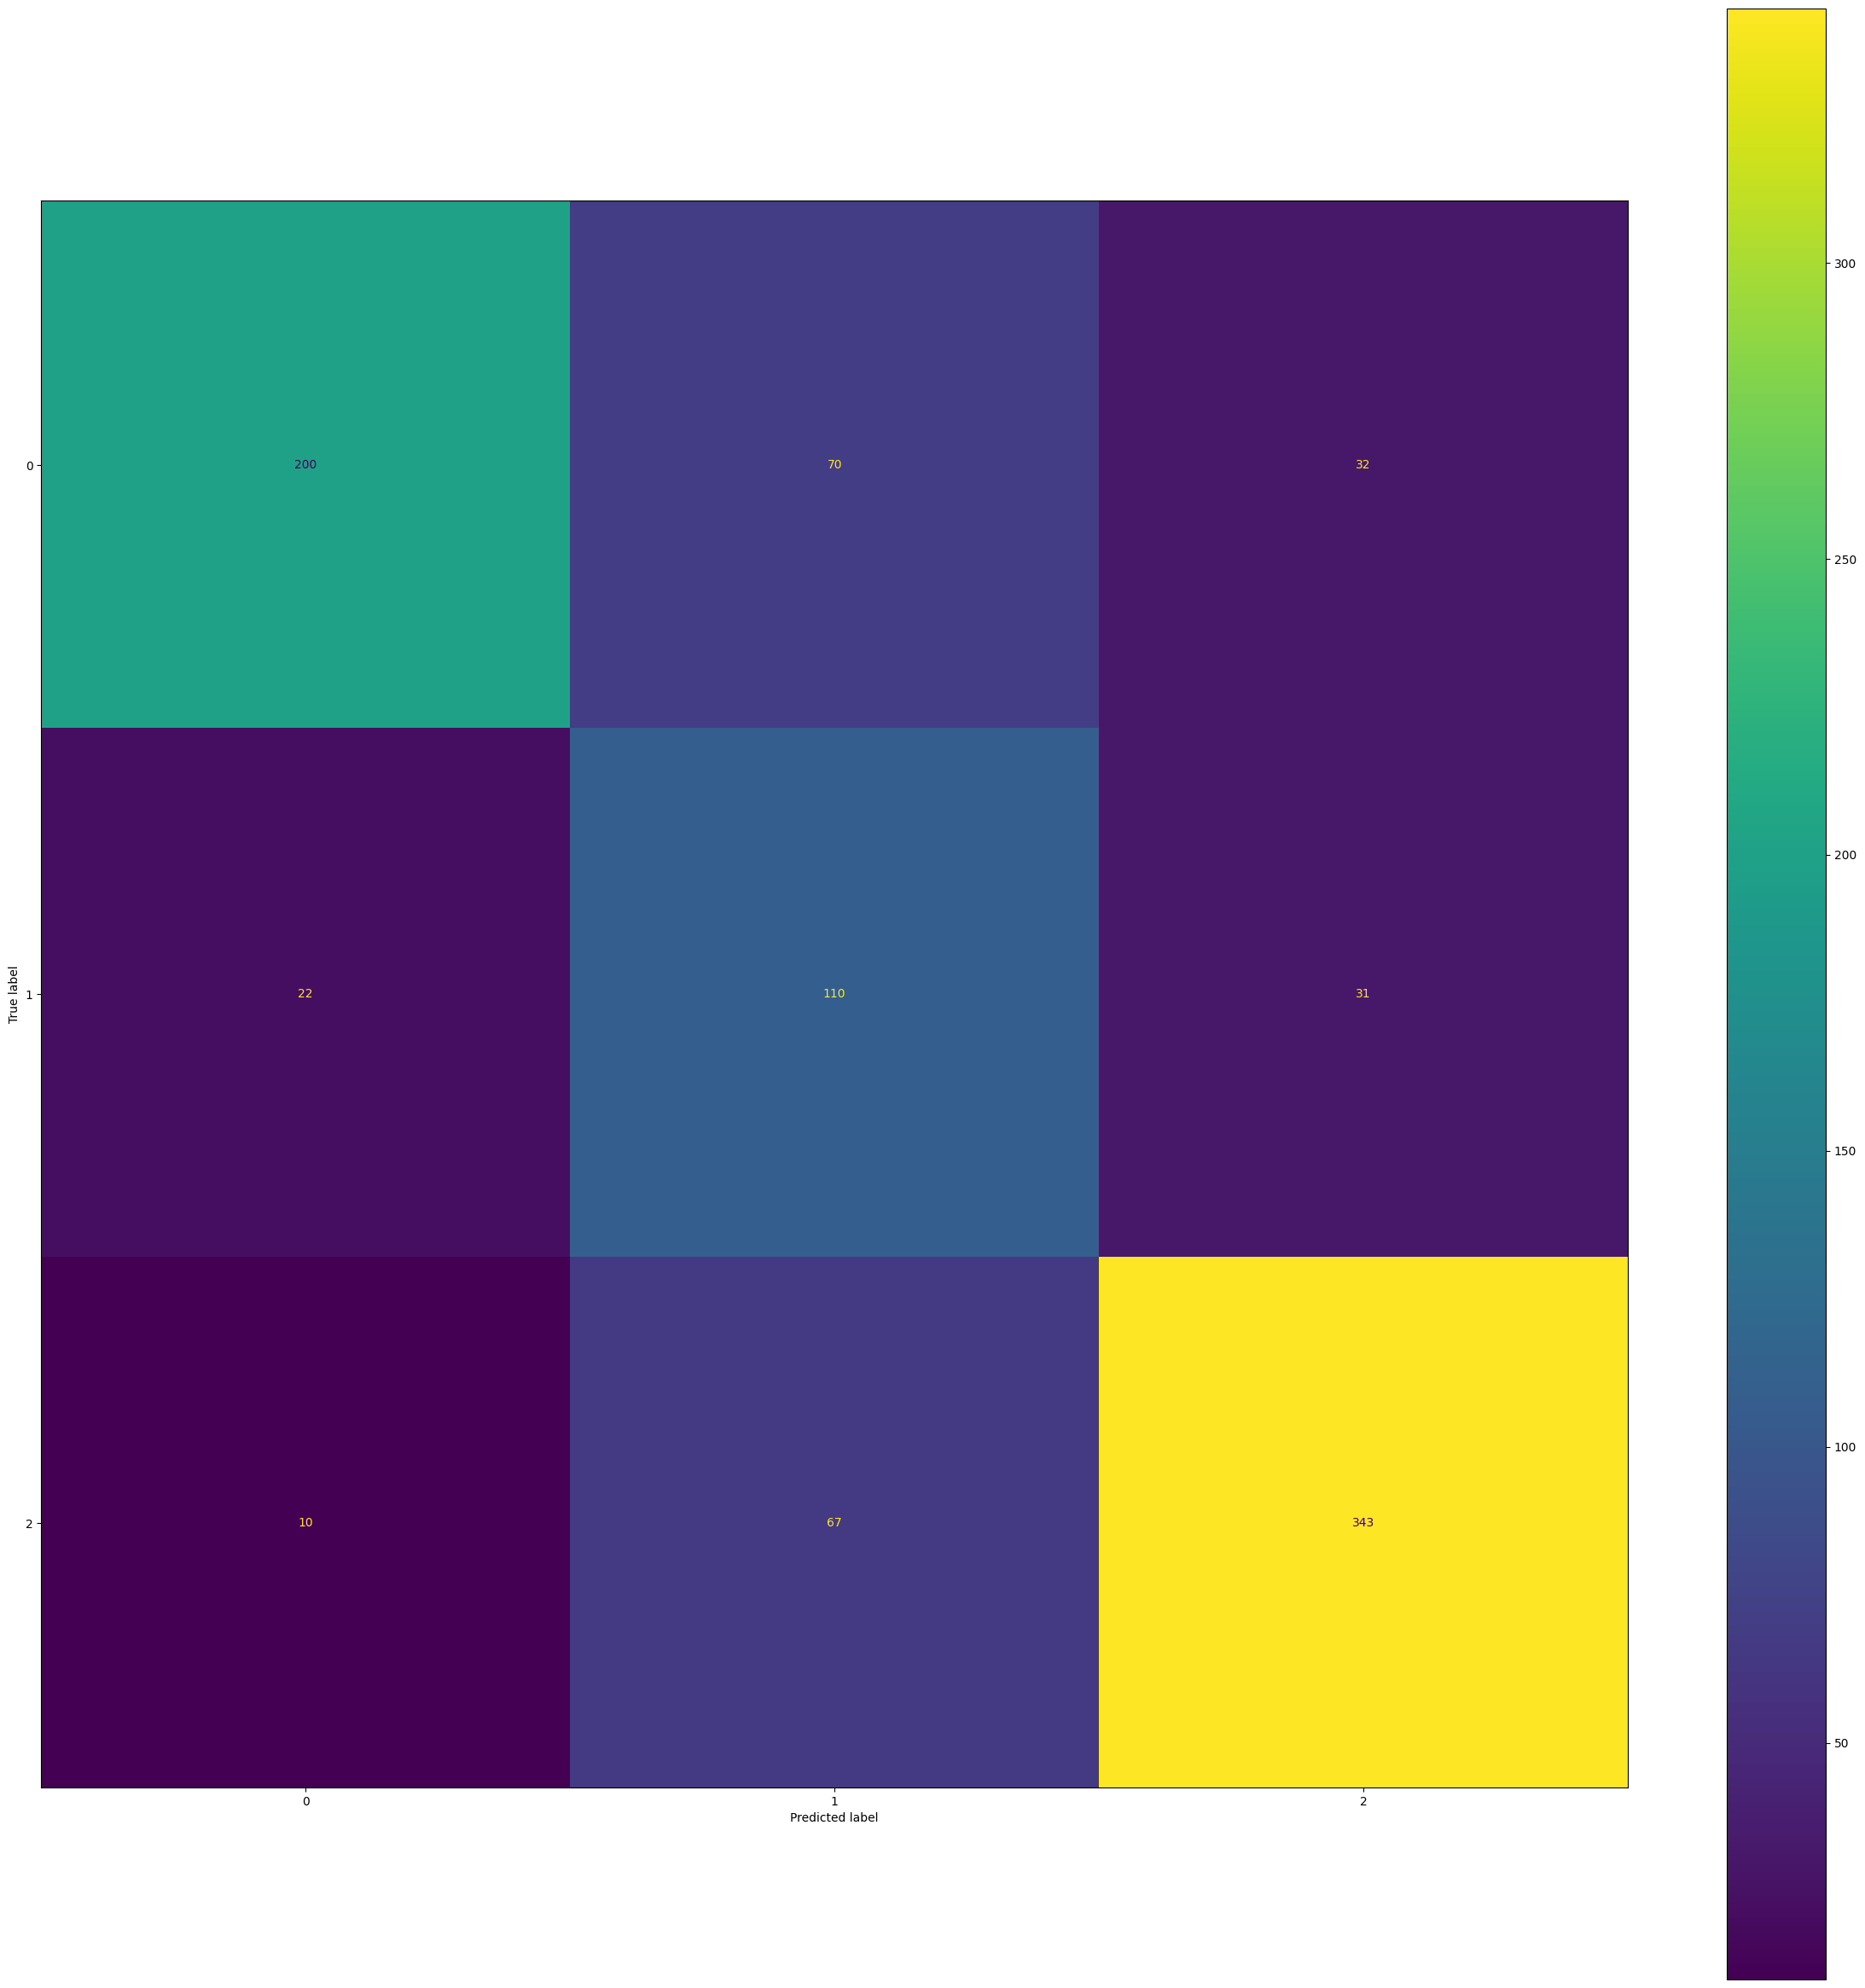

In [159]:
cm = confusion_matrix(y_test, y_predR)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelUnder.classes_)
disp.plot()
plt.show()

## Entrenamiento con XGBoost

### Datos desbalanceados

In [160]:
import xgboost as xgb
modelXGB = xgb.XGBClassifier(
    objective='multi:softprob',
    eval_metric='mlogloss',
    use_label_encoder=False,
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

In [161]:
modelXGB.fit(X_train, y_train)
y_pred = modelXGB.predict(X_test_scaled)

print("Accuracy score:", accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='macro'))
print('Recall score: ', recall_score(y_test, y_pred, average='macro'))
print('F1 Score: ', f1_score(y_test, y_pred, average='macro'))

print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:57:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy score: 0.5875706214689266
Precision score:  0.47483660130718947
Recall score:  0.44556922106590985
F1 Score:  0.40036794848721174
              precision    recall  f1-score   support

           0       0.88      0.35      0.50       302
           1       0.00      0.00      0.00       163
           2       0.54      0.99      0.70       420

    accuracy                           0.59       885
   macro avg       0.47      0.45      0.40       885
weighted avg       0.56      0.59      0.50       885



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

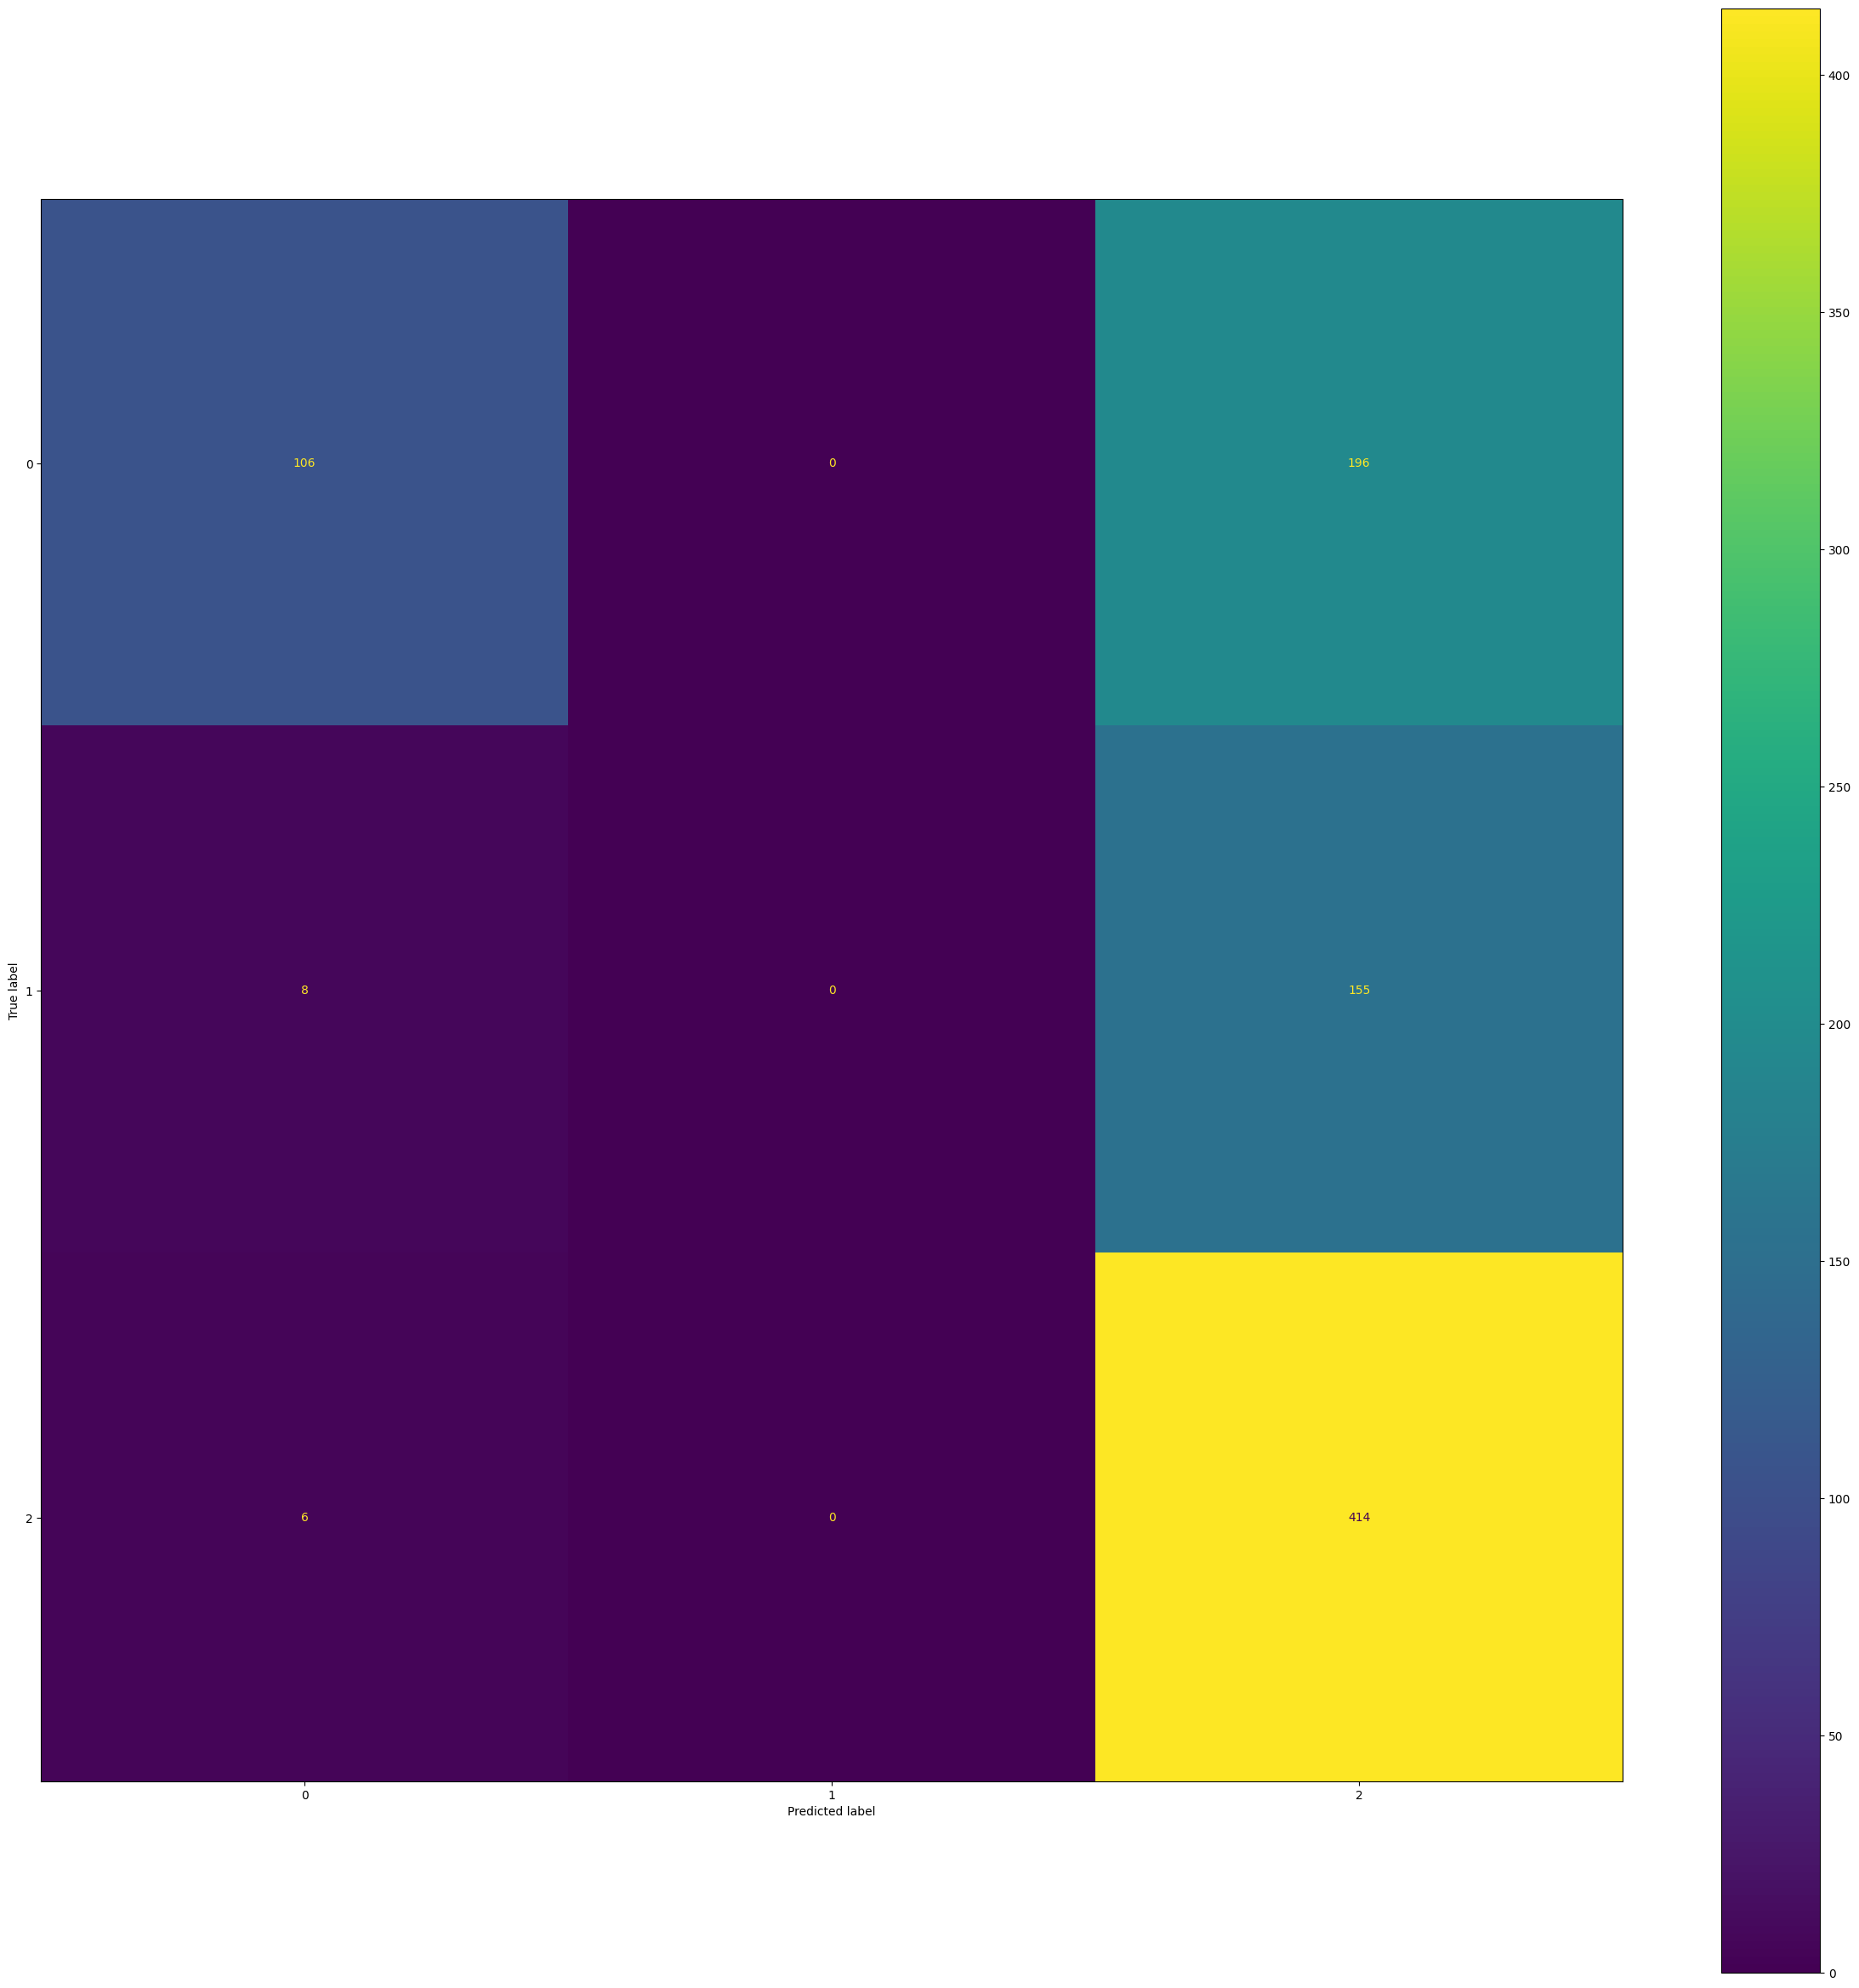

In [162]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelXGB.classes_)
disp.plot()
plt.show()

### Datos balanceados con Smoote

In [163]:
modelXGB.fit(X_train_balancedSmote, y_train_balancedSmote)
y_predS = modelXGB.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_predS))
print('Precision score: ', precision_score(y_test, y_predS, average='macro'))
print('Recall score: ', recall_score(y_test, y_predS, average='macro'))
print('F1 Score: ', f1_score(y_test, y_predS, average='macro'))

print(classification_report(y_test, y_predS))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:57:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.7638418079096045
Precision score:  0.7216771687742082
Recall score:  0.7039071815836128
F1 Score:  0.7098123377593972
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       302
           1       0.52      0.49      0.50       163
           2       0.80      0.90      0.85       420

    accuracy                           0.76       885
   macro avg       0.72      0.70      0.71       885
weighted avg       0.76      0.76      0.76       885



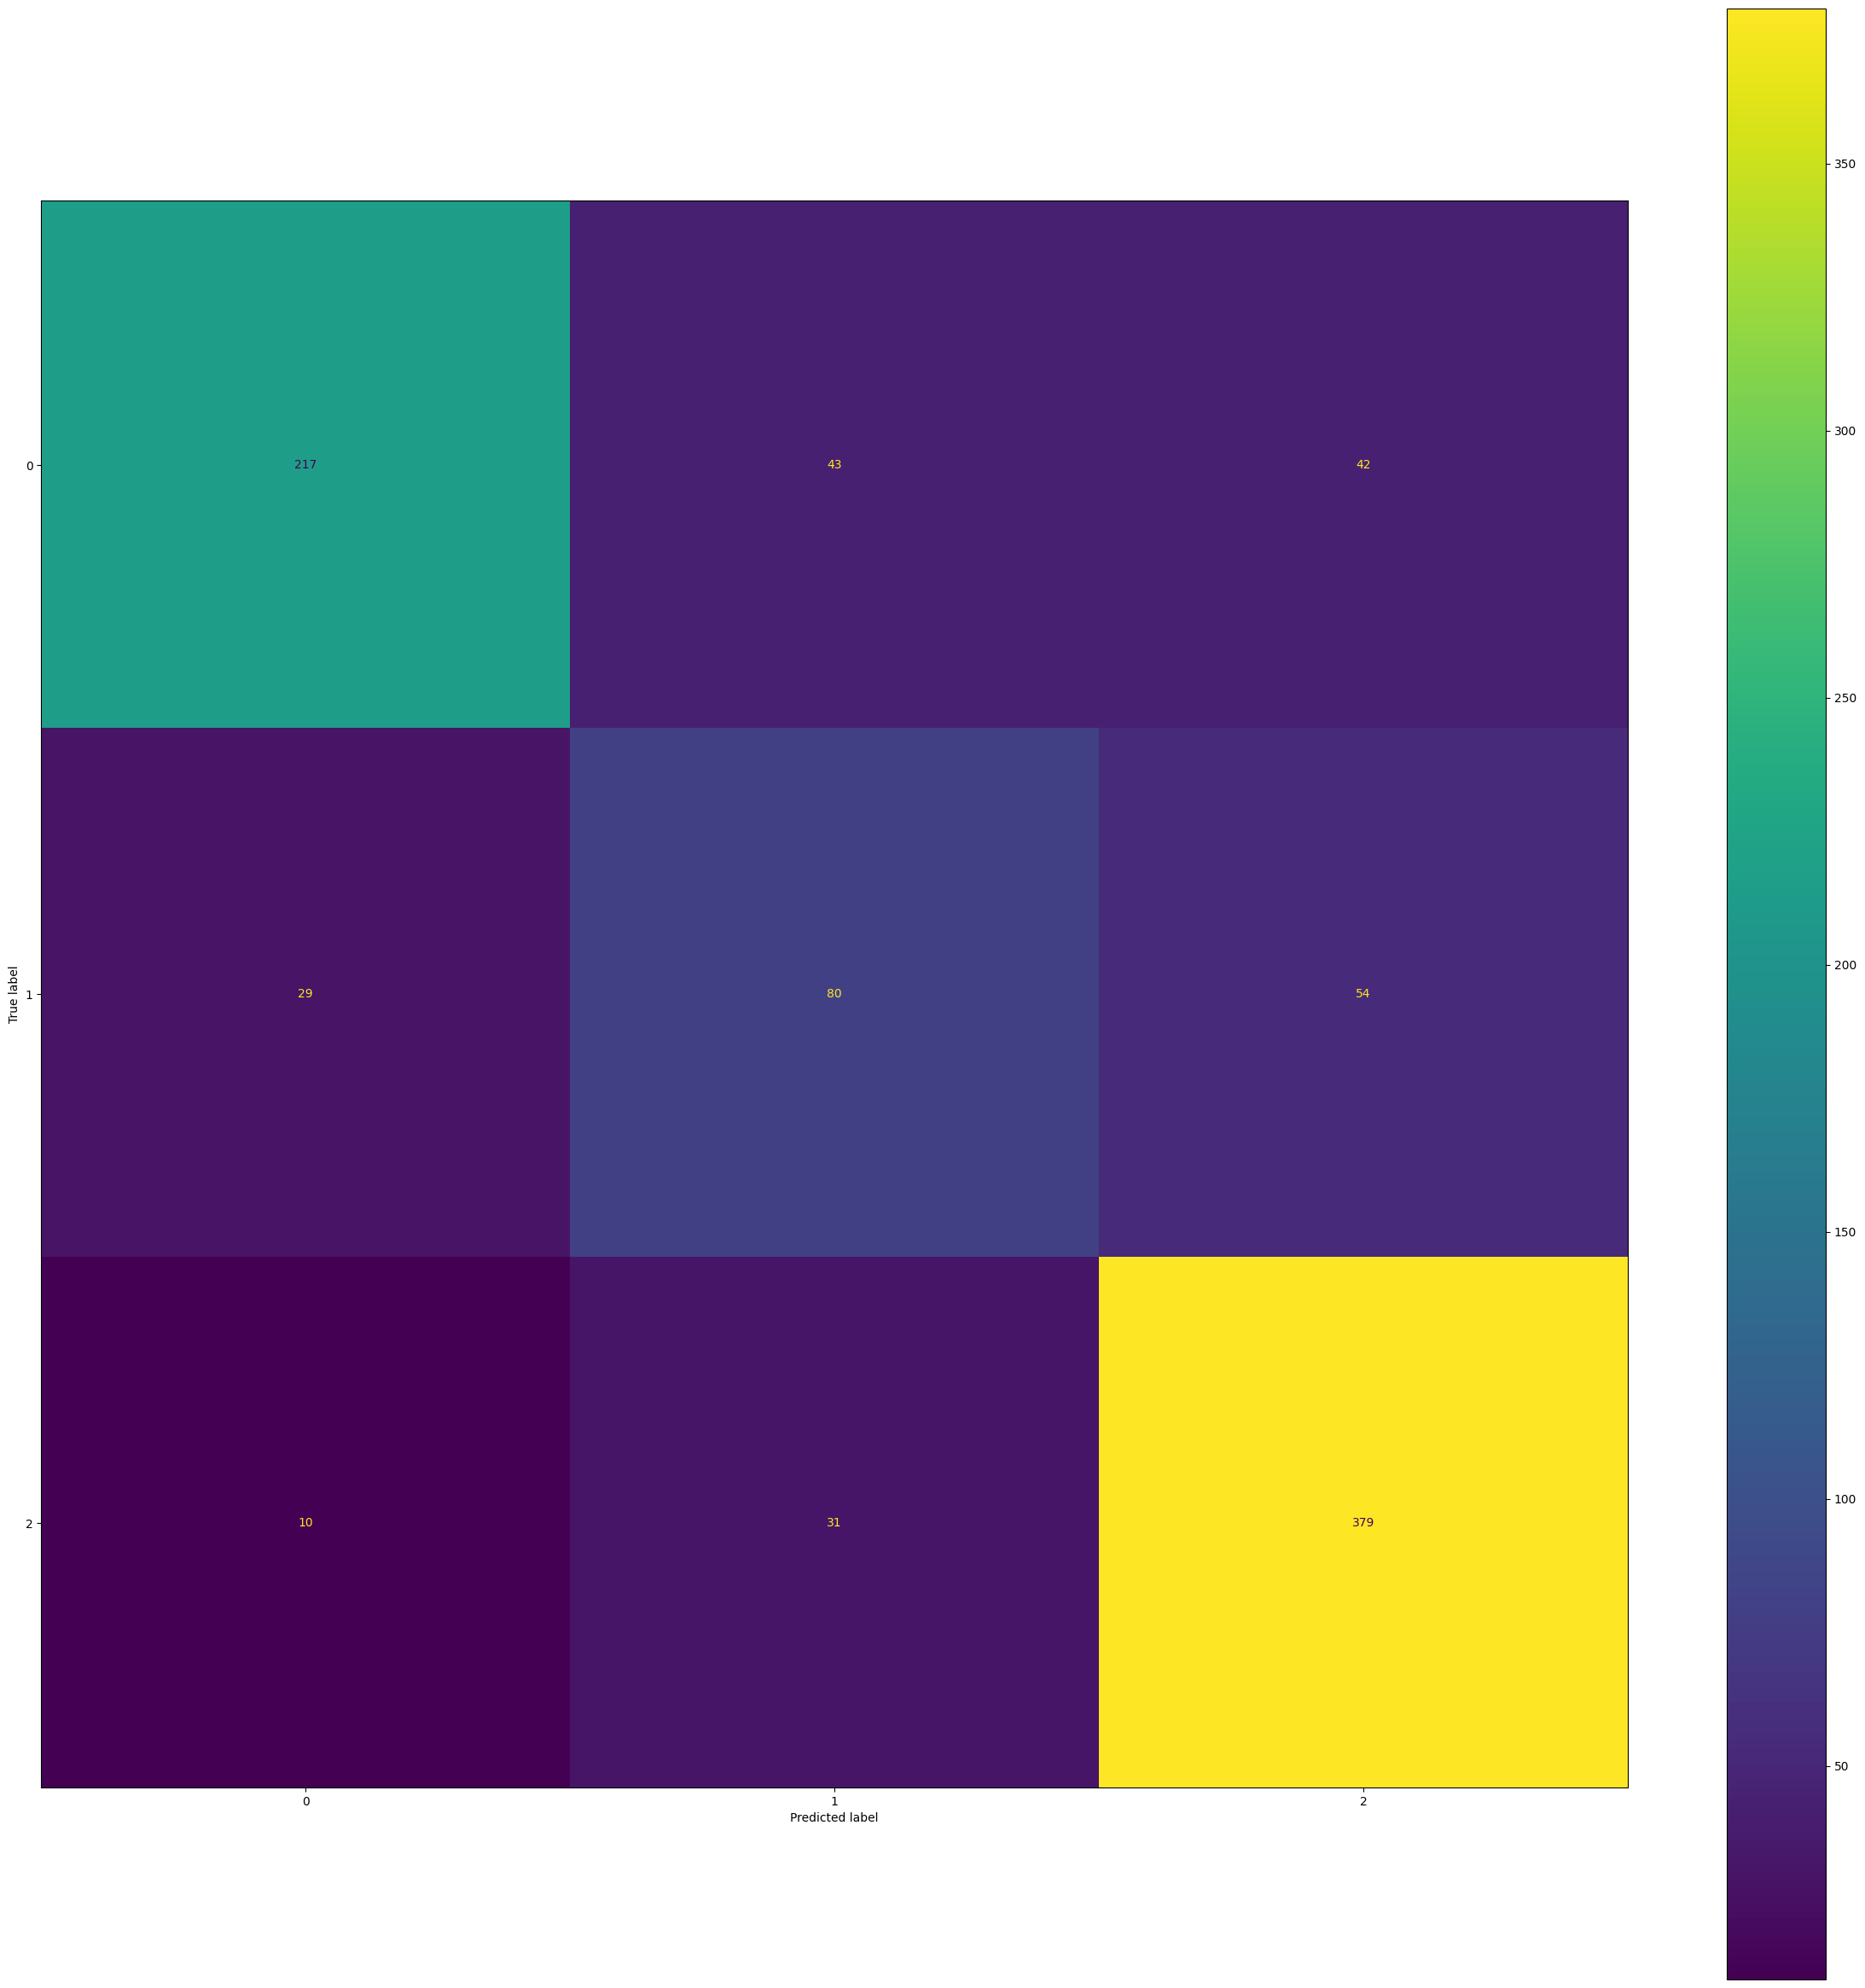

In [164]:
cm = confusion_matrix(y_test, y_predS)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelXGB.classes_)
disp.plot()
plt.show()

### Datos con balanceado Tomek

In [165]:
modelXGB.fit(X_train_balancedTomek, y_train_balancedTomek)
y_predT = modelXGB.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_predT))
print('Precision score: ', precision_score(y_test, y_predT, average='macro'))
print('Recall score: ', recall_score(y_test, y_predT, average='macro'))
print('F1 Score: ', f1_score(y_test, y_predT, average='macro'))

print(classification_report(y_test, y_predT))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:57:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.7581920903954802
Precision score:  0.7130266835416337
Recall score:  0.693372130742626
F1 Score:  0.6999146612049838
              precision    recall  f1-score   support

           0       0.84      0.72      0.77       302
           1       0.51      0.46      0.48       163
           2       0.79      0.90      0.84       420

    accuracy                           0.76       885
   macro avg       0.71      0.69      0.70       885
weighted avg       0.76      0.76      0.75       885



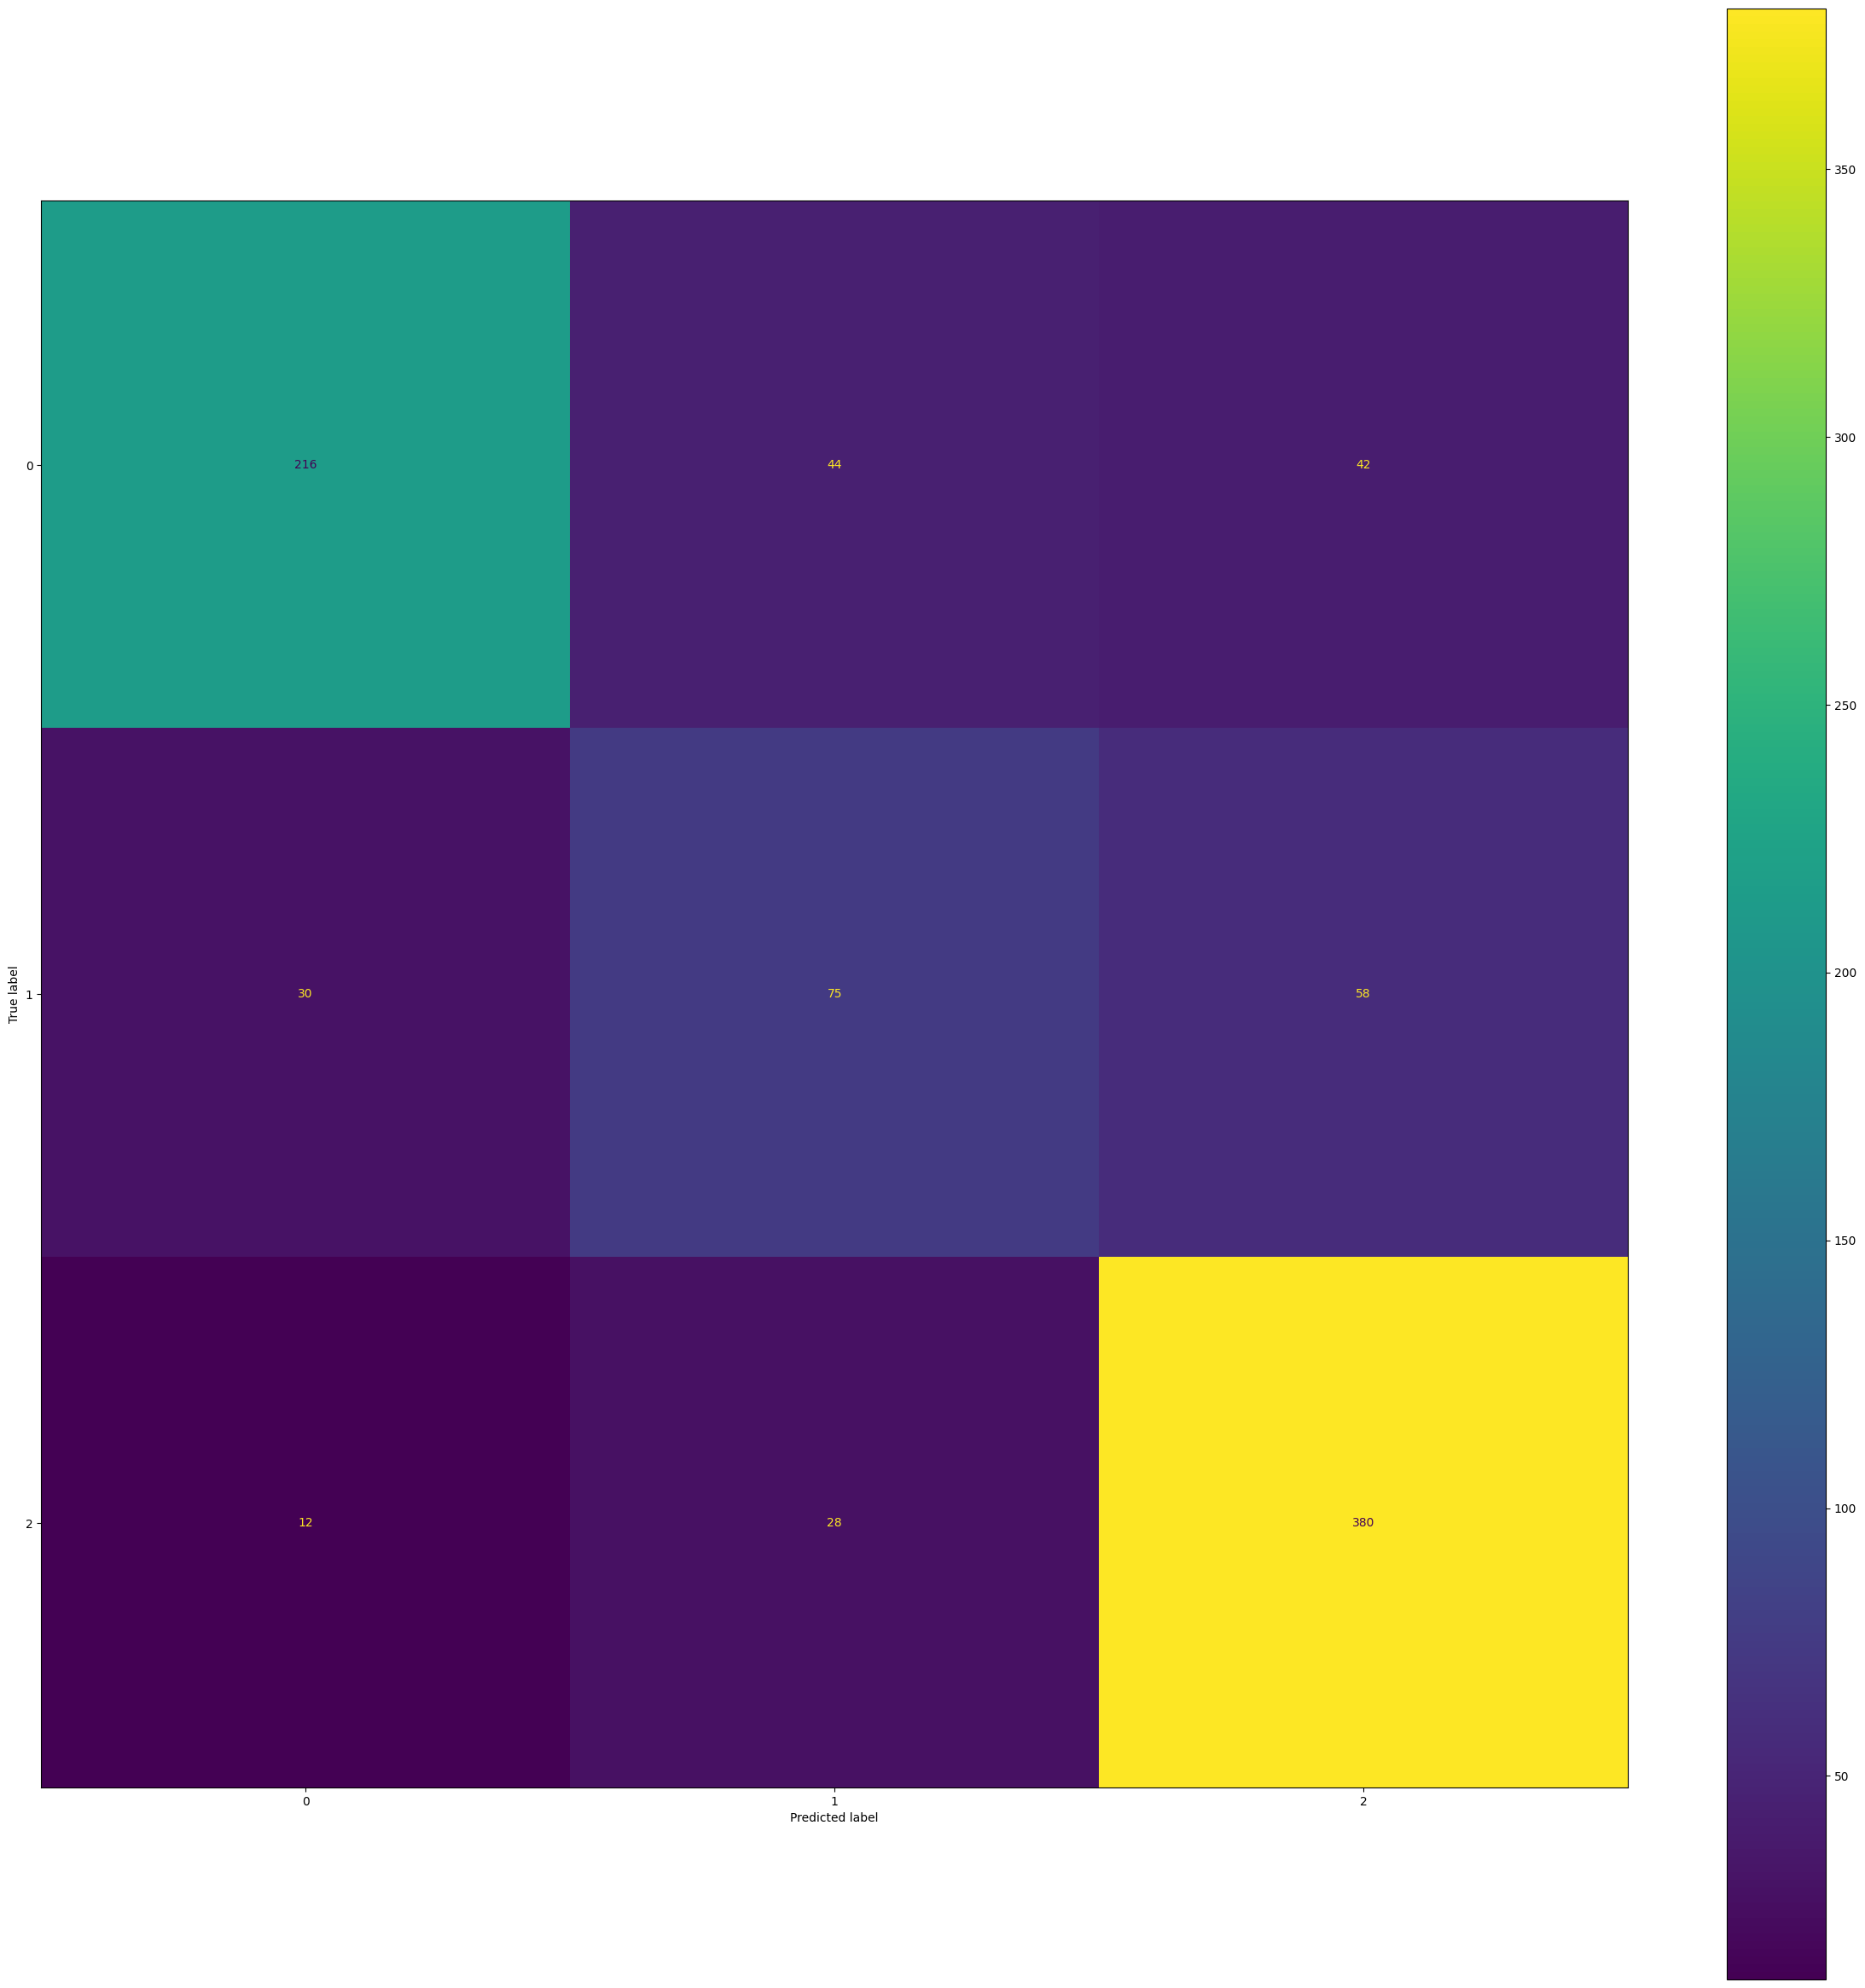

In [166]:
cm = confusion_matrix(y_test, y_predT)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelXGB.classes_)
disp.plot()
plt.show()

### Datos con balanceo Random Under Sampler

In [167]:
modelXGB.fit(X_train_balance_Random, y_train_balance_Random)
y_predR = modelXGB.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_predR))
print('Precision score: ', precision_score(y_test, y_predR, average='macro'))
print('Recall score: ', recall_score(y_test, y_predR, average='macro'))
print('F1 Score: ', f1_score(y_test, y_predR, average='macro'))

print(classification_report(y_test, y_predR))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:57:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.7310734463276836
Precision score:  0.7104144276595656
Recall score:  0.7037801677910563
F1 Score:  0.6952255488078641
              precision    recall  f1-score   support

           0       0.88      0.66      0.75       302
           1       0.43      0.63      0.51       163
           2       0.83      0.82      0.83       420

    accuracy                           0.73       885
   macro avg       0.71      0.70      0.70       885
weighted avg       0.77      0.73      0.74       885



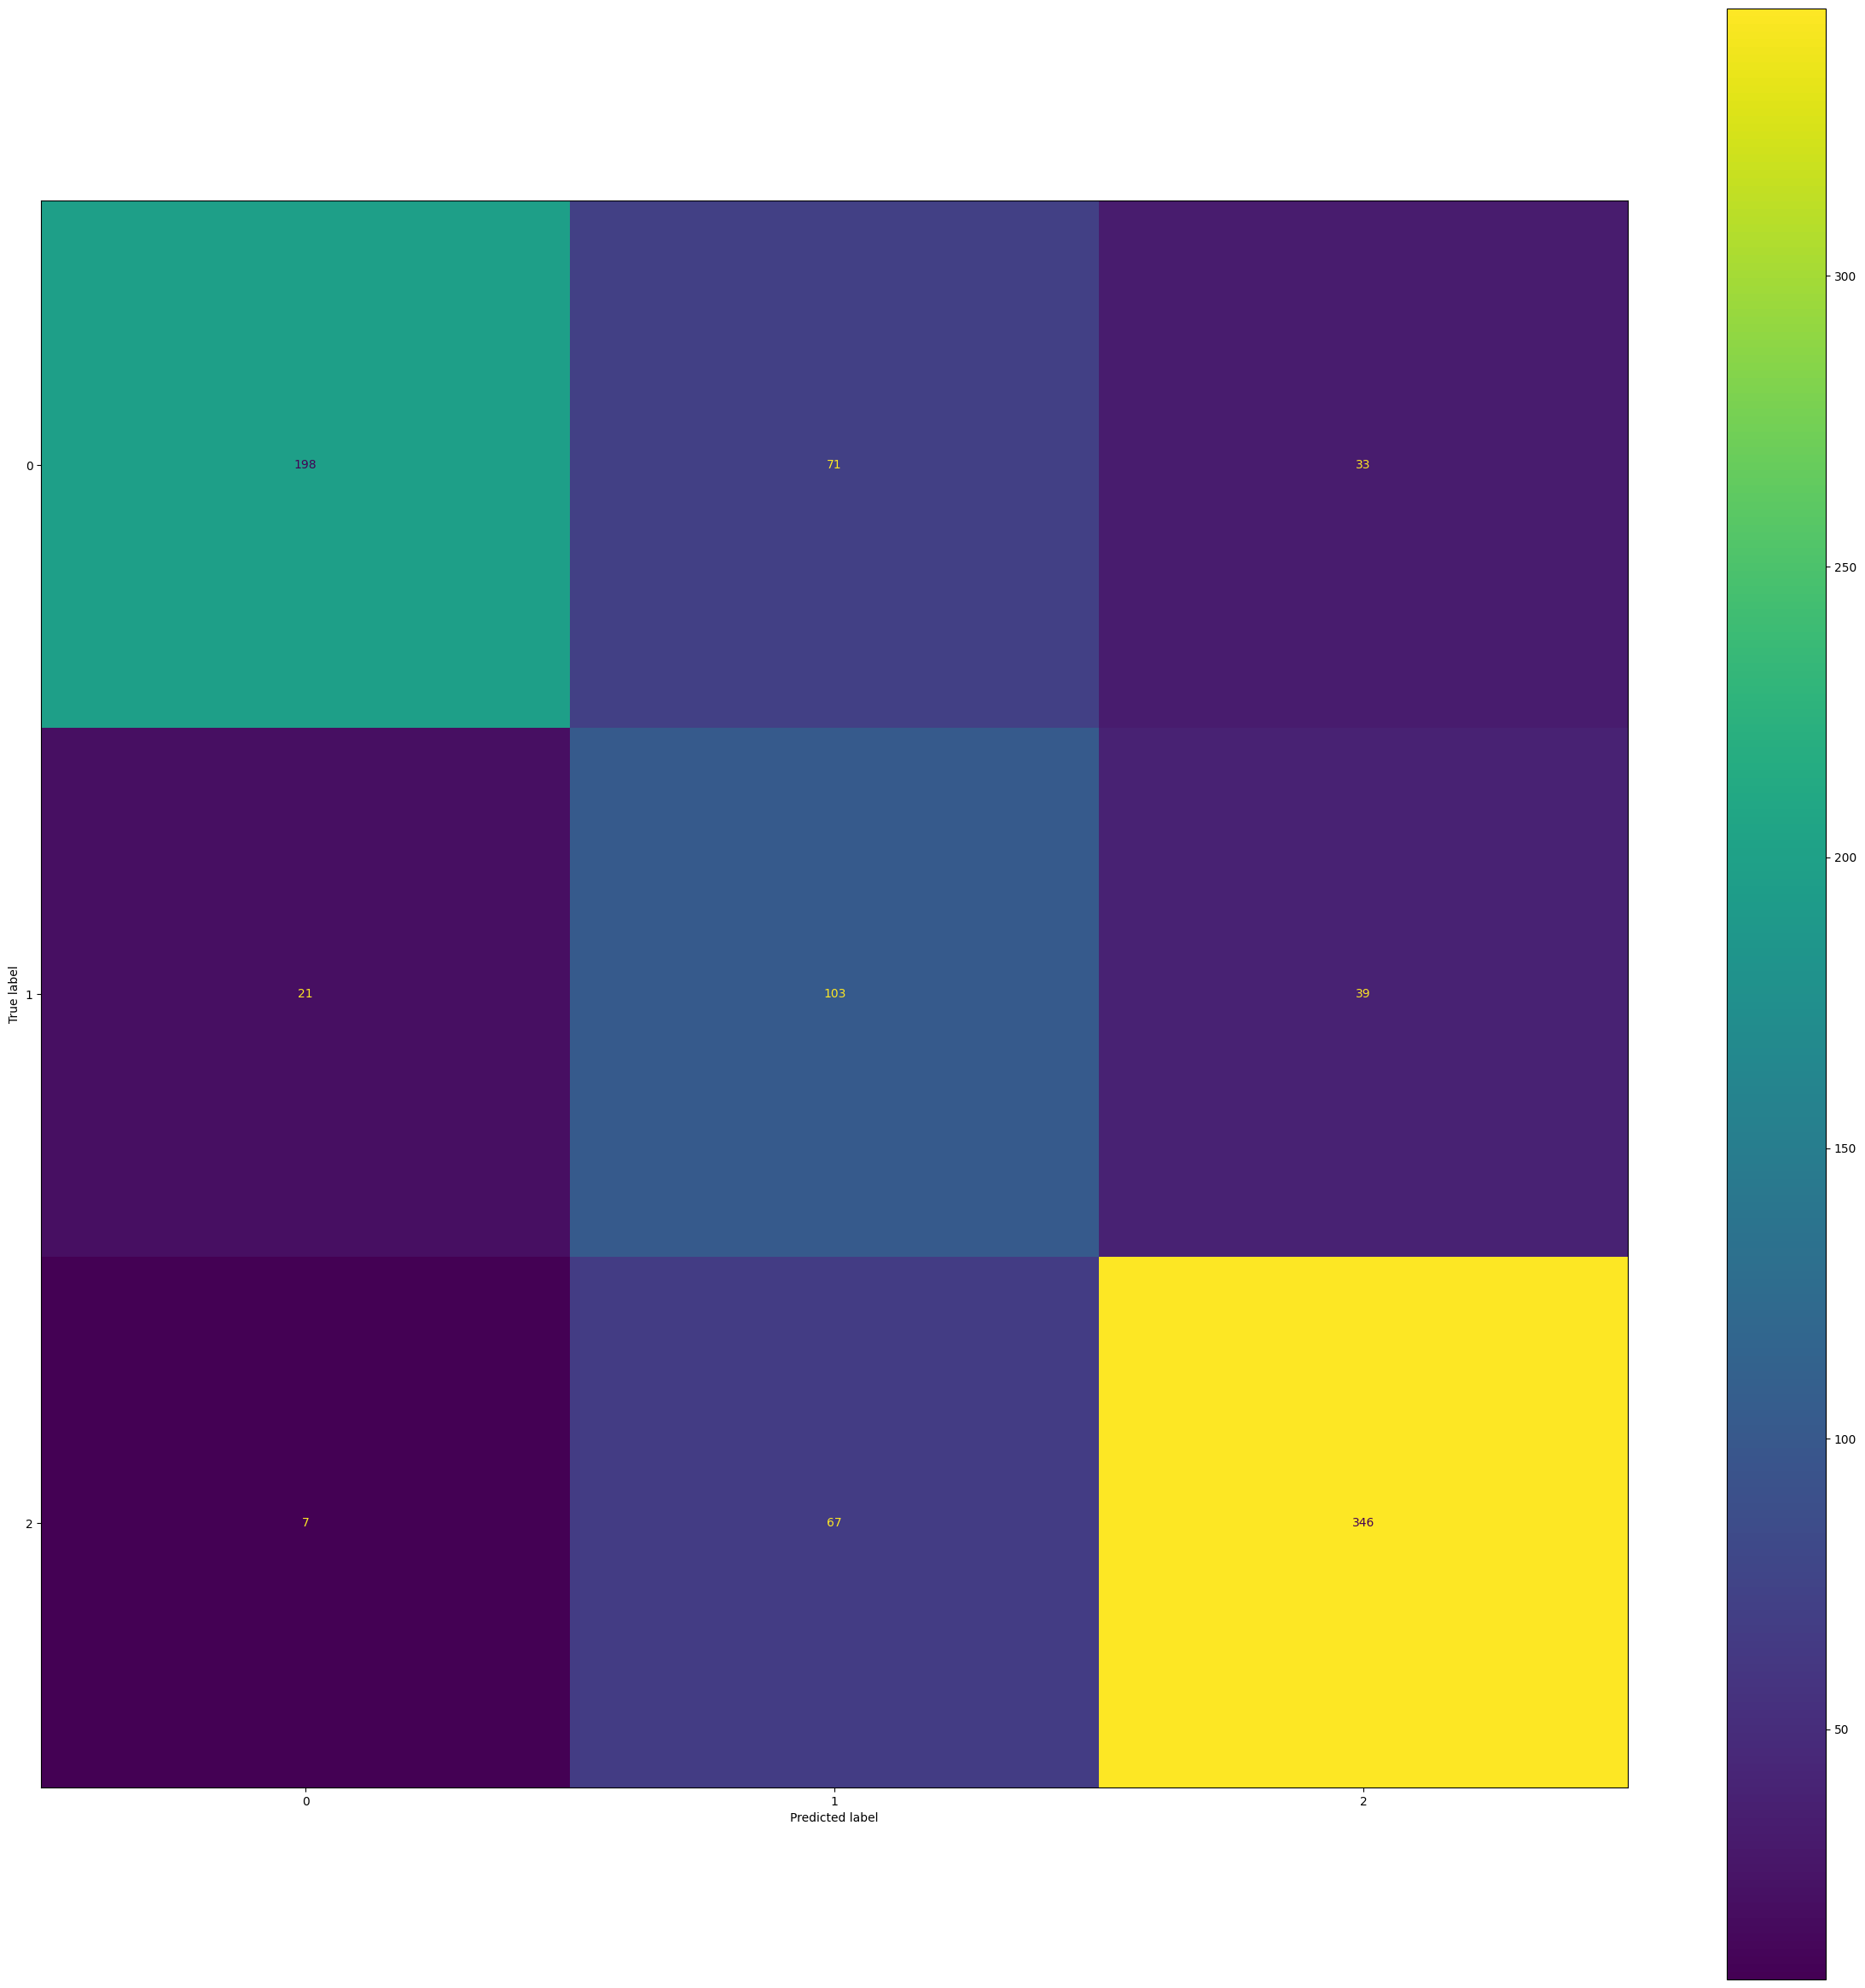

In [168]:
cm = confusion_matrix(y_test, y_predR)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelXGB.classes_)
disp.plot()
plt.show()